# PART 1: DATASET PREPARATION

In [1]:
# !pip install emoji

In [2]:
# standard
import numpy as np
import pandas as pd
import json

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff


# text analysis
from sklearn.feature_extraction.text import CountVectorizer
import re
import emoji
from wordcloud import WordCloud

# A) DATA PREPARATION

>### Import Data
source of data:
1. https://github.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia
2. https://github.com/indobenchmark/indonlu/tree/master/dataset/smsa_doc-sentiment-prosa

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# directory = '/content/drive/My Drive/Colab Notebooks/COURSE - PURWADHIKA - Data Science & Machine Learning/Modul_4_Final_Project/Data/'

# df_election = pd.read_csv(directory + "dataset_2014_presidential_election.csv", encoding='iso-8859-1')
# df_ecommerce = pd.read_csv(directory + 'dataset_ecommerce_review.csv', sep=',', names=['review', 'sentiment', 'nan1', 'nan2', 'nan3'])
# df_ig_comment = pd.read_csv(directory + "dataset_komentar_instagram_cyberbullying.csv", encoding='utf-8')
# df_tv_review = pd.read_csv(directory + "dataset_tweet_sentimen_tayangan_tv.csv", encoding='utf-8')
# df_cell_provider_review = pd.read_csv(directory + 'dataset_tweet_sentiment_cellular_service_provider.csv', encoding='utf-8')
# df_movie_review = pd.read_csv(directory + "dataset_tweet_sentiment_opini_film.csv", encoding='utf-8')
# df_dki_election = pd.read_csv(directory + "dataset_tweet_sentiment_pilkada_DKI_2017.csv", encoding='utf-8')
# df_emoji = pd.read_csv(directory + "dataset_master_emoji.csv", encoding='utf-8')
# df_positive_negative_words_1 = pd.read_csv(directory + "data_positive_negative_words_1.csv", encoding='utf-8')
# df_positive_negative_words_2 = pd.read_csv(directory + "data_positive_negative_words_2.csv", encoding='utf-8')
# df_indonlu_train = pd.read_csv(directory + "dataset_indonlu_train_preprocess.tsv", sep='\t', names=['text', 'sentiment'])
# df_indonlu_valid = pd.read_csv(directory + "dataset_indonlu_valid_preprocess.tsv", sep='\t', names=['text', 'sentiment'])

df_election = pd.read_csv("Data/dataset_2014_presidential_election.csv", encoding='iso-8859-1')
df_ecommerce = pd.read_csv('Data/dataset_ecommerce_review.csv', sep=',', names=['review', 'sentiment', 'nan1', 'nan2', 'nan3'])
df_ig_comment = pd.read_csv("Data/dataset_komentar_instagram_cyberbullying.csv", encoding='utf-8')
df_tv_review = pd.read_csv("Data/dataset_tweet_sentimen_tayangan_tv.csv", encoding='utf-8')
df_cell_provider_review = pd.read_csv('Data/dataset_tweet_sentiment_cellular_service_provider.csv', encoding='utf-8')
df_movie_review = pd.read_csv("Data/dataset_tweet_sentiment_opini_film.csv", encoding='utf-8')
df_dki_election = pd.read_csv("Data/dataset_tweet_sentiment_pilkada_DKI_2017.csv", encoding='utf-8')
df_emoji = pd.read_csv("Data/dataset_master_emoji.csv", encoding='utf-8')
df_positive_negative_words_1 = pd.read_csv("Data/dataset_positive_negative_words_1.csv", encoding='utf-8')
df_positive_negative_words_2 = pd.read_csv("Data/dataset_positive_negative_words_2.csv", encoding='utf-8')
df_indonlu_train = pd.read_csv("Data/dataset_indonlu_train_preprocess.tsv", sep='\t', names=['text', 'sentiment'])
df_indonlu_valid = pd.read_csv("Data/dataset_indonlu_valid_preprocess.tsv", sep='\t', names=['text', 'sentiment'])

>#### Data Sample of Each Dataset

In [5]:
# df_election
print('df_election')
display(df_election.head())

print('\ndf_ecommerce')
display(df_ecommerce.head())

print('\ndf_ig_comment')
display(df_ig_comment.head())

print('\ndf_tv_review')
display(df_tv_review.head())

print('\ndf_cell_provider_review')
display(df_cell_provider_review.head())

print('\ndf_movie_review')
display(df_movie_review.head())

print('\ndf_dki_election')
display(df_dki_election.head())

print('\ndf_emoji')
display(df_emoji.head())

print('\ndf_positive_negative_words_1')
display(df_positive_negative_words_1.head())

print('\ndf_positive_negative_words_2')
display(df_positive_negative_words_2.head())

print('\ndf_indonlu_train')
display(df_indonlu_train.head())

print('\ndf_indonlu_valid')
display(df_indonlu_valid.head())

df_election


,ID,Tweet_ID,Isi_Tweet,Tanggal_Tweet,Kandidat,Aplikasi,Lokasi User,Sentimen
0,133343972,patih_patria,@FahrelStv Gak setuju Jokowi jadi Cawapres.. C...,8/1/2013 0:33,Jokowi,web,BLITAR - INDONESIA,1
1,921720487,RintisBautista,"capres jokowi,wacapres abraham samad. gubernur...",8/1/2013 4:11,Jokowi,"<a href=""http://janetter.net/"" rel=""nofollow"">...",Didalam hatinya recha :love,1
2,-2120434840,JokowiPres,"RT @RintisBautista: capres jokowi,wacapres abr...",8/1/2013 4:32,Jokowi,"<a href=""http://roundteam.co"" rel=""nofollow"">R...",NaN,1
3,-116006035,Franliiiii,capres ( Prabowo ) and cawapres ( jokowi ) and...,8/1/2013 7:33,Prabowo,web,Manado,1
4,-906300614,JokowiPres,RT @Franliiiii: capres ( Prabowo ) and cawapre...,8/1/2013 7:36,Prabowo,"<a href=""http://roundteam.co"" rel=""nofollow"">R...",NaN,1



df_ecommerce


,review,sentiment,nan1,nan2,nan3
0,@firstlogistics_ @bliblidotcom @bliblicare @yl...,-1,NaN,NaN,NaN
1,@bliblidotcom @bliblicare tidak ada link yg pa...,-1,NaN,NaN,NaN
2,"@bliblidotcom min ga relavan twittnya, sekaran...",-1,NaN,NaN,NaN
3,@bcaklikpay @ferdian08 @bliblidotcom jawaban p...,-1,NaN,NaN,NaN
4,waah harus hati2 nih.. kl yg ga teliti bs ke p...,-1,NaN,NaN,NaN



df_ig_comment


,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."



df_tv_review


,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7



df_cell_provider_review


,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>



df_movie_review


,Id,Sentiment,Text Tweet
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...
1,2,negative,Film king Arthur ini film paling jelek dari se...
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...
3,4,negative,Ane ga suka fast and furious..menurutku kok je...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang..."



df_dki_election


,Id,Sentiment,Pasangan Calon,Text Tweet
0,1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...
1,2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...
2,3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...
3,4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...
4,5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...



df_emoji


,ID,Emoji,Sentiment,Makna Emoji,Special Tag
0,1,😛,negative,Face With Stuck-Out Tongue,<FACE WITH STUCK-OUT TOUNGES>
1,2,😠,negative,Angry Face,<Angry Face>
2,3,💣,negative,Bomb,<Bomb>
3,4,💔,negative,Broken Heart,<Broken Heart>
4,5,😕,negative,Confused Face,<Confused Face>



df_positive_negative_words_1


,xx,xx.1,Isi_Tweet,xx.2,xx.3,xx xx,Source,Topic,Sentimen,xx.4
0,NaN,NaN,inkonsisten,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
1,NaN,NaN,porno,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
2,NaN,NaN,teroris,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
3,NaN,NaN,sesat,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
4,NaN,NaN,tuntut,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN



df_positive_negative_words_2


,term,Sentimen
0,diakui,positif
1,penghargaan,positif
2,kecerdasan,positif
3,kekaguman,positif
4,mengagumi,positif



df_indonlu_train


,text,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative



df_indonlu_valid


,text,sentiment
0,"meski masa kampanye sudah selesai , bukan bera...",neutral
1,tidak enak,negative
2,restoran ini menawarkan makanan sunda . kami m...,positive
3,lokasi di alun alun masakan padang ini cukup t...,positive
4,betapa bejad kader gerindra yang anggota dprd ...,negative


>#### Sentiment Distribution Plot of Each Dataset

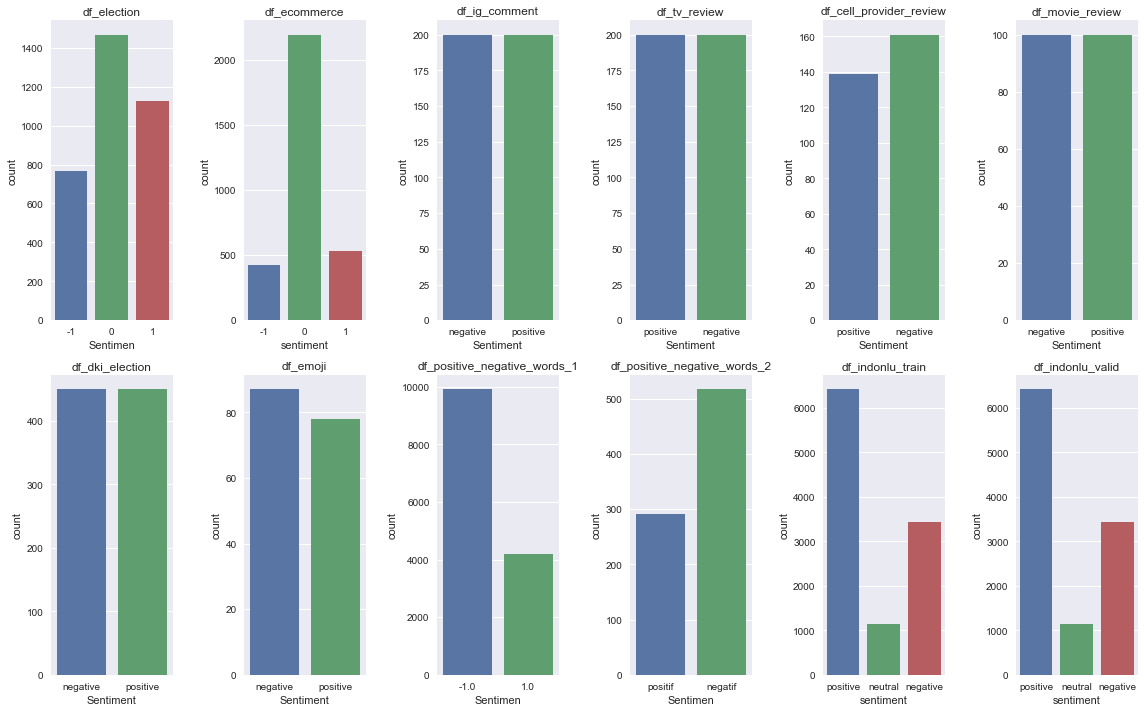

In [6]:
# 251 -> 2 rows, 5 columns, index n

plt.style.use('seaborn')
plt.figure(figsize=(16,10))
ax = plt.axes()

plt.subplot(261)
sns.countplot(x=df_election.Sentimen)
plt.title('df_election')

plt.subplot(262)
sns.countplot(x=df_ecommerce.sentiment)
plt.title('df_ecommerce')

plt.subplot(263)
sns.countplot(x=df_ig_comment.Sentiment)
plt.title('df_ig_comment')

plt.subplot(264)
sns.countplot(x=df_tv_review.Sentiment)
plt.title('df_tv_review')

plt.subplot(265)
sns.countplot(x=df_cell_provider_review.Sentiment)
plt.title('df_cell_provider_review')

plt.subplot(266)
sns.countplot(x=df_movie_review.Sentiment)
plt.title('df_movie_review')

plt.subplot(267)
sns.countplot(x=df_dki_election.Sentiment)
plt.title('df_dki_election')

plt.subplot(268)
sns.countplot(x=df_emoji.Sentiment)
plt.title('df_emoji')

plt.subplot(269)
sns.countplot(x=df_positive_negative_words_1.Sentimen)
plt.title('df_positive_negative_words_1')

plt.subplot(2,6,10)
sns.countplot(x=df_positive_negative_words_2.Sentimen)
plt.title('df_positive_negative_words_2')

plt.subplot(2,6,11)
sns.countplot(x=df_indonlu_train.sentiment)
plt.title('df_indonlu_train')

plt.subplot(2,6,12)
sns.countplot(x=df_indonlu_train.sentiment)
plt.title('df_indonlu_valid')

plt.tight_layout()
plt.show()

# B) Data Format Preparation

>#### Dataframe Modification
- drop unused features
- convert Sentiment Label in text into nominal category (1, 0, -1)
- shifting the column position 

In [7]:
df_election_m = df_election.drop(columns = ['ID', 'Tweet_ID', 'Tanggal_Tweet', 'Kandidat', 'Aplikasi', 'Lokasi User'])
df_ecommerce_m = df_ecommerce.drop(columns = ['nan1', 'nan2', 'nan3'])


# categorical label encoding & feature position shift
sentiment_label_conversion_Sentiment = {"Sentiment": {'positive': 1, 'neutral': 0, 'negative': -1}}
sentiment_label_conversion_sentiment = {"sentiment": {'positive': 1, 'neutral': 0, 'negative': -1}}
sentiment_label_conversion_Sentimen = {"Sentimen": {'positif': 1, 'netral': 0, 'negatif': -1}}
sentiment_label_conversion_float_to_integer = {"Sentimen": {1.0: 1, 0.0: 0, -1.0: -1}}


df_ig_comment_m = df_ig_comment.drop(columns='Id') # drop unused columns
df_ig_comment_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_ig_comment_m = df_ig_comment_m.reindex(columns=['Instagram Comment Text', 'Sentiment']) # reorder the columns

df_tv_review_m = df_tv_review.drop(columns=['Id', 'Acara TV', 'Jumlah Retweet']) # drop unused columns
df_tv_review_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_tv_review_m = df_tv_review_m.reindex(columns=['Text Tweet', 'Sentiment']) # reorder the columns

df_cell_provider_review_m = df_cell_provider_review.drop(columns='Id') # drop unused columns
df_cell_provider_review_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_cell_provider_review_m = df_cell_provider_review_m.reindex(columns=['Text Tweet', 'Sentiment']) # reorder the columns

df_movie_review_m = df_movie_review.drop(columns='Id') # drop unused columns
df_movie_review_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_movie_review_m = df_movie_review_m.reindex(columns=['Text Tweet', 'Sentiment']) # reorder the columns

df_dki_election_m = df_dki_election.drop(columns=['Id', 'Pasangan Calon']) # drop unused columns
df_dki_election_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_dki_election_m = df_dki_election_m.reindex(columns=['Text Tweet', 'Sentiment']) # reorder the columns

df_emoji_m = df_emoji.drop(columns=['ID', 'Emoji', 'Special Tag']) # drop unused columns
df_emoji_m.replace(sentiment_label_conversion_Sentiment, inplace=True) # convert categorical sentiment label to numeric label
df_emoji_m = df_emoji_m.reindex(columns=['Makna Emoji', 'Sentiment']) # reorder the columns

df_positive_negative_words_1_m = df_positive_negative_words_1.drop(columns=['xx', 'xx.1', 'xx.2', 'xx.3', 'xx xx', 'Source', 'Topic', 'xx.4']) # drop unused columns
df_positive_negative_words_1_m.replace(sentiment_label_conversion_float_to_integer) # convert categorical sentiment label to numeric label
df_positive_negative_words_1_m['Sentimen'] = df_positive_negative_words_1_m['Sentimen'].fillna(0.0).astype(int)

df_positive_negative_words_2_m = df_positive_negative_words_2.replace(sentiment_label_conversion_Sentimen) # convert categorical sentiment label to numeric label
# df_positive_negative_words_1.Sentimen.isna().value_counts()

df_indonlu_train_m = df_indonlu_train.copy()
df_indonlu_train_m.replace(sentiment_label_conversion_sentiment, inplace=True) # convert categorical sentiment label to numeric label

df_indonlu_valid_m = df_indonlu_valid.copy()
df_indonlu_valid_m.replace(sentiment_label_conversion_sentiment, inplace=True) # convert categorical sentiment label to numeric label


In [8]:
# df_election
print('df_election')
display(df_election.head())
display(df_election_m.head())

print('\ndf_ecommerce')
display(df_ecommerce.head())
display(df_ecommerce_m.head())

print('\ndf_ig_comment')
display(df_ig_comment.head())
display(df_ig_comment_m.head())

print('\ndf_tv_review')
display(df_tv_review.head())
display(df_tv_review_m.head())

print('\ndf_cell_provider_review')
display(df_cell_provider_review.head())
display(df_cell_provider_review_m.head())

print('\ndf_movie_review')
display(df_movie_review.head())
display(df_movie_review_m.head())

print('\ndf_dki_election')
display(df_dki_election.head())
display(df_dki_election_m.head())

print('\ndf_emoji')
display(df_emoji.head())
display(df_emoji_m.head())

print('\ndf_positive_negative_words_1')
display(df_positive_negative_words_1.head())
display(df_positive_negative_words_1_m.head())

print('\ndf_positive_negative_words_2')
display(df_positive_negative_words_2.head())
display(df_positive_negative_words_2_m.head())

df_election


,ID,Tweet_ID,Isi_Tweet,Tanggal_Tweet,Kandidat,Aplikasi,Lokasi User,Sentimen
0,133343972,patih_patria,@FahrelStv Gak setuju Jokowi jadi Cawapres.. C...,8/1/2013 0:33,Jokowi,web,BLITAR - INDONESIA,1
1,921720487,RintisBautista,"capres jokowi,wacapres abraham samad. gubernur...",8/1/2013 4:11,Jokowi,"<a href=""http://janetter.net/"" rel=""nofollow"">...",Didalam hatinya recha :love,1
2,-2120434840,JokowiPres,"RT @RintisBautista: capres jokowi,wacapres abr...",8/1/2013 4:32,Jokowi,"<a href=""http://roundteam.co"" rel=""nofollow"">R...",NaN,1
3,-116006035,Franliiiii,capres ( Prabowo ) and cawapres ( jokowi ) and...,8/1/2013 7:33,Prabowo,web,Manado,1
4,-906300614,JokowiPres,RT @Franliiiii: capres ( Prabowo ) and cawapre...,8/1/2013 7:36,Prabowo,"<a href=""http://roundteam.co"" rel=""nofollow"">R...",NaN,1


,Isi_Tweet,Sentimen
0,@FahrelStv Gak setuju Jokowi jadi Cawapres.. C...,1
1,"capres jokowi,wacapres abraham samad. gubernur...",1
2,"RT @RintisBautista: capres jokowi,wacapres abr...",1
3,capres ( Prabowo ) and cawapres ( jokowi ) and...,1
4,RT @Franliiiii: capres ( Prabowo ) and cawapre...,1



df_ecommerce


,review,sentiment,nan1,nan2,nan3
0,@firstlogistics_ @bliblidotcom @bliblicare @yl...,-1,NaN,NaN,NaN
1,@bliblidotcom @bliblicare tidak ada link yg pa...,-1,NaN,NaN,NaN
2,"@bliblidotcom min ga relavan twittnya, sekaran...",-1,NaN,NaN,NaN
3,@bcaklikpay @ferdian08 @bliblidotcom jawaban p...,-1,NaN,NaN,NaN
4,waah harus hati2 nih.. kl yg ga teliti bs ke p...,-1,NaN,NaN,NaN


,review,sentiment
0,@firstlogistics_ @bliblidotcom @bliblicare @yl...,-1
1,@bliblidotcom @bliblicare tidak ada link yg pa...,-1
2,"@bliblidotcom min ga relavan twittnya, sekaran...",-1
3,@bcaklikpay @ferdian08 @bliblidotcom jawaban p...,-1
4,waah harus hati2 nih.. kl yg ga teliti bs ke p...,-1



df_ig_comment


,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


,Instagram Comment Text,Sentiment
0,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,-1
1,Geblek lo tata...cowo bgt dibela2in balikan......,-1
2,Kmrn termewek2 skr lengket lg duhhh kok labil ...,-1
3,"Intinya kalau kesel dengan ATT nya, gausah ke ...",-1
4,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",-1



df_tv_review


,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7


,Text Tweet,Sentiment
0,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",1
1,Selamat berbuka puasa Semoga amal ibadah hari ...,1
2,"Ada nih di trans7 hitam putih, dia dpt penghar...",1
3,selamat ya mas @adietaufan masuk hitamputih,1
4,Asiknya nonton Hitam Putih Trans7,1



df_cell_provider_review


,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


,Text Tweet,Sentiment
0,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,1
1,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",1
2,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,-1
3,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,-1
4,Selamat malam PENDUSTA <PROVIDER_NAME>,-1



df_movie_review


,Id,Sentiment,Text Tweet
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...
1,2,negative,Film king Arthur ini film paling jelek dari se...
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...
3,4,negative,Ane ga suka fast and furious..menurutku kok je...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang..."


,Text Tweet,Sentiment
0,Jelek filmnya... apalagi si ernest gak mutu bg...,-1
1,Film king Arthur ini film paling jelek dari se...,-1
2,@beexkuanlin Sepanjang film gwa berkata kasar ...,-1
3,Ane ga suka fast and furious..menurutku kok je...,-1
4,"@baekhyun36 kan gua ga tau film nya, lu bilang...",-1



df_dki_election


,Id,Sentiment,Pasangan Calon,Text Tweet
0,1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...
1,2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...
2,3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...
3,4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...
4,5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...


,Text Tweet,Sentiment
0,Banyak akun kloning seolah2 pendukung #agussil...,-1
1,#agussilvy bicara apa kasihan yaa...lap itu ai...,-1
2,Kalau aku sih gak nunggu hasil akhir QC tp lag...,-1
3,Kasian oh kasian dengan peluru 1milyar untuk t...,-1
4,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...,-1



df_emoji


,ID,Emoji,Sentiment,Makna Emoji,Special Tag
0,1,😛,negative,Face With Stuck-Out Tongue,<FACE WITH STUCK-OUT TOUNGES>
1,2,😠,negative,Angry Face,<Angry Face>
2,3,💣,negative,Bomb,<Bomb>
3,4,💔,negative,Broken Heart,<Broken Heart>
4,5,😕,negative,Confused Face,<Confused Face>


,Makna Emoji,Sentiment
0,Face With Stuck-Out Tongue,-1
1,Angry Face,-1
2,Bomb,-1
3,Broken Heart,-1
4,Confused Face,-1



df_positive_negative_words_1


,xx,xx.1,Isi_Tweet,xx.2,xx.3,xx xx,Source,Topic,Sentimen,xx.4
0,NaN,NaN,inkonsisten,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
1,NaN,NaN,porno,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
2,NaN,NaN,teroris,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
3,NaN,NaN,sesat,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN
4,NaN,NaN,tuntut,NaN,NaN,NaN,dictionary,vocabulary,-1.0,NaN


,Isi_Tweet,Sentimen
0,inkonsisten,-1
1,porno,-1
2,teroris,-1
3,sesat,-1
4,tuntut,-1



df_positive_negative_words_2


,term,Sentimen
0,diakui,positif
1,penghargaan,positif
2,kecerdasan,positif
3,kekaguman,positif
4,mengagumi,positif


,term,Sentimen
0,diakui,1
1,penghargaan,1
2,kecerdasan,1
3,kekaguman,1
4,mengagumi,1


>#### Combining All Dataframe

LIST OF MODIFIED DFs before column name change

In [9]:
# df_election_m.head()
# df_ecommerce_m.head()
# df_ig_comment_m.head()
# df_tv_review_m.head()
# df_cell_provider_review_m.head()
# df_movie_review_m.head()
# df_dki_election_m.head()
# df_emoji_m.head()
# df_positive_negative_words_1_m.head()
# df_positive_negative_words_2_m.head()

dataframes = [df_election_m, df_ecommerce_m, df_ig_comment_m, df_tv_review_m, df_cell_provider_review_m, df_movie_review_m, df_dki_election_m, df_emoji_m, df_positive_negative_words_1_m, df_positive_negative_words_2_m]
for i in dataframes:
  print(i.columns)

Index(['Isi_Tweet', 'Sentimen'], dtype='object')
Index(['review', 'sentiment'], dtype='object')
Index(['Instagram Comment Text', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['Text Tweet', 'Sentiment'], dtype='object')
Index(['Makna Emoji', 'Sentiment'], dtype='object')
Index(['Isi_Tweet', 'Sentimen'], dtype='object')
Index(['term', 'Sentimen'], dtype='object')


In [10]:
# change the column names
dataframes = [df_indonlu_train_m, df_indonlu_valid_m, df_election_m, df_ecommerce_m, df_ig_comment_m, df_tv_review_m, df_cell_provider_review_m, df_movie_review_m, df_dki_election_m, df_emoji_m, df_positive_negative_words_1_m, df_positive_negative_words_2_m]
# len(dataframes)
for i in dataframes:
  i.columns = ['text', 'sentiment']

LIST OF MODIFIED DFs after column name change

In [11]:
for i in dataframes:
  print(i.columns)

Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')
Index(['text', 'sentiment'], dtype='object')


In [12]:
df = pd.concat(dataframes, ignore_index=True)

sample of data

In [13]:
print(len(df))
df.sample(10)

36034


,text,sentiment
14407,"RT @Akualesia88: Iya mas ""@agusairi: Amin, cap...",0
22627,kalah,-1
21945,dihadang,-1
21373,nihil,-1
25459,demoralisasi,-1
16650,[event] yuk ikutan tokopedia pingpong cup 2016...,0
29361,kelangkaan,-1
21897,didzalimi,-1
33371,komersial,1
34398,juara,1


In [14]:
df.sentiment.value_counts().iloc[:]

-1    16638
 1    14454
 0     4942
Name: sentiment, dtype: int64

# C) Final Dataset Preparation

>#### Sentiment Distribution

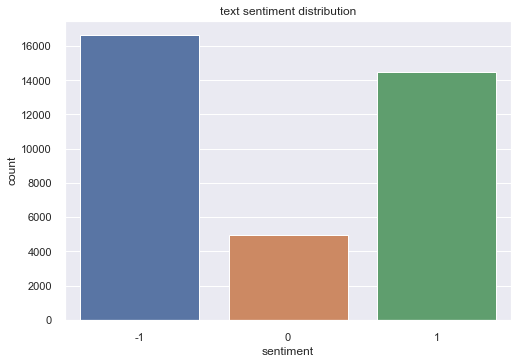

,sentiment,percentage
-1,16638,46.17
1,14454,40.11
0,4942,13.71


In [15]:
sns.set(style='darkgrid')
sns.countplot(x=df.sentiment)
plt.title('text sentiment distribution')
plt.show()

sentiment_distribution = pd.DataFrame(df.sentiment.value_counts())
sentiment_distribution['percentage'] = list(round(df.sentiment.value_counts(normalize=True) * 100, 2))
sentiment_distribution

>#### Final Dataframe Before Preprocessing

In [16]:
df

,text,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,1
1,mohon ulama lurus dan k212 mmbri hujjah partai...,0
2,lokasi strategis di jalan sumatera bandung . t...,1
3,betapa bahagia nya diri ini saat unboxing pake...,1
4,duh . jadi mahasiswa jangan sombong dong . kas...,-1
...,...,...
36029,duka,-1
36030,pencemas,-1
36031,luka,-1
36032,melukai,-1


# PART 2: TEXT PREPROCESSING

In [17]:
!pip install Sastrawi

In [18]:
# Standard Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Machine Learning Libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, plot_confusion_matrix, plot_roc_curve, roc_curve

# NLP Libraries
import nltk
import re
import emoji
from string import punctuation
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize, sent_tokenize

# NLP Libraries - Stemming Bahasa Indonesia - Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Save Model
import joblib

[nltk_data] Downloading package stopwords to C:\Users\Damianus
[nltk_data]     Deni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Damianus
[nltk_data]     Deni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Data Preparation
### Import Data

In [19]:
df.head()

,text,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,1
1,mohon ulama lurus dan k212 mmbri hujjah partai...,0
2,lokasi strategis di jalan sumatera bandung . t...,1
3,betapa bahagia nya diri ini saat unboxing pake...,1
4,duh . jadi mahasiswa jangan sombong dong . kas...,-1


### Checking Data
- check missing values

In [20]:
pd.DataFrame(df.isna().value_counts())

,,0
text,sentiment,
False,False,36032
True,False,2


- find 2 missing values

In [21]:
df[df.text.isna()]

,text,sentiment
23234,NaN,0
26911,NaN,0


### Drop Empty Data

In [22]:
df.dropna(inplace=True)

In [23]:
df[df.text.isna()]

,text,sentiment


### Words Information

In [24]:
def words_count(text):
    text_length = len(text.split(" "))
    return text_length

In [25]:
words_count_before_prepro = df['text'].apply(lambda x: words_count(x)).sum()
pd.DataFrame({"words count before preprocessing": [words_count_before_prepro]})

,words count before preprocessing
0,555024


## Text Preprocessing
>### Step 1
Method :
1. converting to lower case
1. remove or convert number into text
1. remove punctuation
1. remove white spaces
1. converting slang words to standard words
1. converting emoji to emoji description
1. remove stopwords and particular words 

#### stopwords

In [26]:
STOPWORDS = stopwords.words("indonesian") + stopwords.words("english") + ['yg', 'jd', 'nya', 'sih', 'url']
len(STOPWORDS)

942

In [27]:
# list of stopwords that are removed
removed_stopwords = ['bukan', 'bukankah', 'bukannya', 'bukanlah', 'tidak', 'tidakkah', 'tidaklah']

In [28]:
for i in STOPWORDS:
    if i in removed_stopwords:
        print(i)
        STOPWORDS.remove(i)
        print(i, 'is removed')
    else:
        pass
    
STOPWORDS.remove('bukankah')
STOPWORDS.remove('bukannya')
STOPWORDS.remove('tidakkah')

len(STOPWORDS)

bukan
bukan is removed
bukanlah
bukanlah is removed
tidak
tidak is removed
tidaklah
tidaklah is removed


935

#### stopwords, slang words, emoji list

In [148]:
# with open(directory + "data_slang_words_dictionary.txt", 'rb') as handle:
#     slang_data = json.load(handle)

# semua isinya sudah dikurasi
# - stopwords dikurangi negasinya
# - slang words sudah ditambahkan

STOPWORDS = ['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan', 'berkenaan', 'berlainan', 'berlalu', 'berlangsung', 'berlebihan', 'bermacam', 'bermacam-macam', 'bermaksud', 'bermula', 'bersama', 'bersama-sama', 'bersiap', 'bersiap-siap', 'bertanya', 'bertanya-tanya', 'berturut', 'berturut-turut', 'bertutur', 'berujar', 'berupa', 'besar', 'betul', 'betulkah', 'biasa', 'biasanya', 'bila', 'bilakah', 'bisa', 'bisakah', 'boleh', 'bolehkah', 'bolehlah', 'buat', 'bulan', 'bung', 'cara', 'caranya', 'cukup', 'cukupkah', 'cukuplah', 'cuma', 'dahulu', 'dalam', 'dan', 'dapat', 'dari', 'daripada', 'datang', 'dekat', 'demi', 'demikian', 'demikianlah', 'dengan', 'depan', 'di', 'dia', 'diakhiri', 'diakhirinya', 'dialah', 'diantara', 'diantaranya', 'diberi', 'diberikan', 'diberikannya', 'dibuat', 'dibuatnya', 'didapat', 'didatangkan', 'digunakan', 'diibaratkan', 'diibaratkannya', 'diingat', 'diingatkan', 'diinginkan', 'dijawab', 'dijelaskan', 'dijelaskannya', 'dikarenakan', 'dikatakan', 'dikatakannya', 'dikerjakan', 'diketahui', 'diketahuinya', 'dikira', 'dilakukan', 'dilalui', 'dilihat', 'dimaksud', 'dimaksudkan', 'dimaksudkannya', 'dimaksudnya', 'diminta', 'dimintai', 'dimisalkan', 'dimulai', 'dimulailah', 'dimulainya', 'dimungkinkan', 'dini', 'dipastikan', 'diperbuat', 'diperbuatnya', 'dipergunakan', 'diperkirakan', 'diperlihatkan', 'diperlukan', 'diperlukannya', 'dipersoalkan', 'dipertanyakan', 'dipunyai', 'diri', 'dirinya', 'disampaikan', 'disebut', 'disebutkan', 'disebutkannya', 'disini', 'disinilah', 'ditambahkan', 'ditandaskan', 'ditanya', 'ditanyai', 'ditanyakan', 'ditegaskan', 'ditujukan', 'ditunjuk', 'ditunjuki', 'ditunjukkan', 'ditunjukkannya', 'ditunjuknya', 'dituturkan', 'dituturkannya', 'diucapkan', 'diucapkannya', 'diungkapkan', 'dong', 'dua', 'dulu', 'empat', 'enggak', 'enggaknya', 'entah', 'entahlah', 'guna', 'gunakan', 'hal', 'hampir', 'hanya', 'hanyalah', 'hari', 'harus', 'haruslah', 'harusnya', 'hendak', 'hendaklah', 'hendaknya', 'hingga', 'ia', 'ialah', 'ibarat', 'ibaratkan', 'ibaratnya', 'ibu', 'ikut', 'ingat', 'ingat-ingat', 'ingin', 'inginkah', 'inginkan', 'ini', 'inikah', 'inilah', 'itu', 'itukah', 'itulah', 'jadi', 'jadilah', 'jadinya', 'jangan', 'jangankan', 'janganlah', 'jauh', 'jawab', 'jawaban', 'jawabnya', 'jelas', 'jelaskan', 'jelaslah', 'jelasnya', 'jika', 'jikalau', 'juga', 'jumlah', 'jumlahnya', 'justru', 'kala', 'kalau', 'kalaulah', 'kalaupun', 'kalian', 'kami', 'kamilah', 'kamu', 'kamulah', 'kan', 'kapan', 'kapankah', 'kapanpun', 'karena', 'karenanya', 'kasus', 'kata', 'katakan', 'katakanlah', 'katanya', 'ke', 'keadaan', 'kebetulan', 'kecil', 'kedua', 'keduanya', 'keinginan', 'kelamaan', 'kelihatan', 'kelihatannya', 'kelima', 'keluar', 'kembali', 'kemudian', 'kemungkinan', 'kemungkinannya', 'kenapa', 'kepada', 'kepadanya', 'kesampaian', 'keseluruhan', 'keseluruhannya', 'keterlaluan', 'ketika', 'khususnya', 'kini', 'kinilah', 'kira', 'kira-kira', 'kiranya', 'kita', 'kitalah', 'kok', 'kurang', 'lagi', 'lagian', 'lah', 'lain', 'lainnya', 'lalu', 'lama', 'lamanya', 'lanjut', 'lanjutnya', 'lebih', 'lewat', 'lima', 'luar', 'macam', 'maka', 'makanya', 'makin', 'malah', 'malahan', 'mampu', 'mampukah', 'mana', 'manakala', 'manalagi', 'masa', 'masalah', 'masalahnya', 'masih', 'masihkah', 'masing', 'masing-masing', 'mau', 'maupun', 'melainkan', 'melakukan', 'melalui', 'melihat', 'melihatnya', 'memang', 'memastikan', 'memberi', 'memberikan', 'membuat', 'memerlukan', 'memihak', 'meminta', 'memintakan', 'memisalkan', 'memperbuat', 'mempergunakan', 'memperkirakan', 'memperlihatkan', 'mempersiapkan', 'mempersoalkan', 'mempertanyakan', 'mempunyai', 'memulai', 'memungkinkan', 'menaiki', 'menambahkan', 'menandaskan', 'menanti', 'menanti-nanti', 'menantikan', 'menanya', 'menanyai', 'menanyakan', 'mendapat', 'mendapatkan', 'mendatang', 'mendatangi', 'mendatangkan', 'menegaskan', 'mengakhiri', 'mengapa', 'mengatakan', 'mengatakannya', 'mengenai', 'mengerjakan', 'mengetahui', 'menggunakan', 'menghendaki', 'mengibaratkan', 'mengibaratkannya', 'mengingat', 'mengingatkan', 'menginginkan', 'mengira', 'mengucapkan', 'mengucapkannya', 'mengungkapkan', 'menjadi', 'menjawab', 'menjelaskan', 'menuju', 'menunjuk', 'menunjuki', 'menunjukkan', 'menunjuknya', 'menurut', 'menuturkan', 'menyampaikan', 'menyangkut', 'menyatakan', 'menyebutkan', 'menyeluruh', 'menyiapkan', 'merasa', 'mereka', 'merekalah', 'merupakan', 'meski', 'meskipun', 'meyakini', 'meyakinkan', 'minta', 'mirip', 'misal', 'misalkan', 'misalnya', 'mula', 'mulai', 'mulailah', 'mulanya', 'mungkin', 'mungkinkah', 'nah', 'naik', 'namun', 'nanti', 'nantinya', 'nyaris', 'nyatanya', 'oleh', 'olehnya', 'pada', 'padahal', 'padanya', 'pak', 'paling', 'panjang', 'pantas', 'para', 'pasti', 'pastilah', 'penting', 'pentingnya', 'per', 'percuma', 'perlu', 'perlukah', 'perlunya', 'pernah', 'persoalan', 'pertama', 'pertama-tama', 'pertanyaan', 'pertanyakan', 'pihak', 'pihaknya', 'pukul', 'pula', 'pun', 'punya', 'rasa', 'rasanya', 'rata', 'rupanya', 'saat', 'saatnya', 'saja', 'sajalah', 'saling', 'sama', 'sama-sama', 'sambil', 'sampai', 'sampai-sampai', 'sampaikan', 'sana', 'sangat', 'sangatlah', 'satu', 'saya', 'sayalah', 'se', 'sebab', 'sebabnya', 'sebagai', 'sebagaimana', 'sebagainya', 'sebagian', 'sebaik', 'sebaik-baiknya', 'sebaiknya', 'sebaliknya', 'sebanyak', 'sebegini', 'sebegitu', 'sebelum', 'sebelumnya', 'sebenarnya', 'seberapa', 'sebesar', 'sebetulnya', 'sebisanya', 'sebuah', 'sebut', 'sebutlah', 'sebutnya', 'secara', 'secukupnya', 'sedang', 'sedangkan', 'sedemikian', 'sedikit', 'sedikitnya', 'seenaknya', 'segala', 'segalanya', 'segera', 'seharusnya', 'sehingga', 'seingat', 'sejak', 'sejauh', 'sejenak', 'sejumlah', 'sekadar', 'sekadarnya', 'sekali', 'sekali-kali', 'sekalian', 'sekaligus', 'sekalipun', 'sekarang', 'sekarang', 'sekecil', 'seketika', 'sekiranya', 'sekitar', 'sekitarnya', 'sekurang-kurangnya', 'sekurangnya', 'sela', 'selain', 'selaku', 'selalu', 'selama', 'selama-lamanya', 'selamanya', 'selanjutnya', 'seluruh', 'seluruhnya', 'semacam', 'semakin', 'semampu', 'semampunya', 'semasa', 'semasih', 'semata', 'semata-mata', 'semaunya', 'sementara', 'semisal', 'semisalnya', 'sempat', 'semua', 'semuanya', 'semula', 'sendiri', 'sendirian', 'sendirinya', 'seolah', 'seolah-olah', 'seorang', 'sepanjang', 'sepantasnya', 'sepantasnyalah', 'seperlunya', 'seperti', 'sepertinya', 'sepihak', 'sering', 'seringnya', 'serta', 'serupa', 'sesaat', 'sesama', 'sesampai', 'sesegera', 'sesekali', 'seseorang', 'sesuatu', 'sesuatunya', 'sesudah', 'sesudahnya', 'setelah', 'setempat', 'setengah', 'seterusnya', 'setiap', 'setiba', 'setibanya', 'setidak-tidaknya', 'setidaknya', 'setinggi', 'seusai', 'sewaktu', 'siap', 'siapa', 'siapakah', 'siapapun', 'sini', 'sinilah', 'soal', 'soalnya', 'suatu', 'sudah', 'sudahkah', 'sudahlah', 'supaya', 'tadi', 'tadinya', 'tahu', 'tahun', 'tak', 'tambah', 'tambahnya', 'tampak', 'tampaknya', 'tandas', 'tandasnya', 'tanpa', 'tanya', 'tanyakan', 'tanyanya', 'tapi', 'tegas', 'tegasnya', 'telah', 'tempat', 'tengah', 'tentang', 'tentu', 'tentulah', 'tentunya', 'tepat', 'terakhir', 'terasa', 'terbanyak', 'terdahulu', 'terdapat', 'terdiri', 'terhadap', 'terhadapnya', 'teringat', 'teringat-ingat', 'terjadi', 'terjadilah', 'terjadinya', 'terkira', 'terlalu', 'terlebih', 'terlihat', 'termasuk', 'ternyata', 'tersampaikan', 'tersebut', 'tersebutlah', 'tertentu', 'tertuju', 'terus', 'terutama', 'tetap', 'tetapi', 'tiap', 'tiba', 'tiba-tiba', 'tiga', 'tinggi', 'toh', 'tunjuk', 'turut', 'tutur', 'tuturnya', 'ucap', 'ucapnya', 'ujar', 'ujarnya', 'umum', 'umumnya', 'ungkap', 'ungkapnya', 'untuk', 'usah', 'usai', 'waduh', 'wah', 'wahai', 'waktu', 'waktunya', 'walau', 'walaupun', 'wong', 'yaitu', 'yakin', 'yakni', 'yang', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'yg', 'jd', 'nya', 'sih', 'url']
# emoji_data = {'😛': 'Face With Stuck-Out Tongue', '😠': 'Angry Face', '💣': 'Bomb', '💔': 'Broken Heart', '😕': 'Confused Face', '😞': 'Disappointed Face', '😑': 'Expressionless Face', '😋': 'Face Savouring Delicious Food', '😱': 'Face Screaming in Fear', '😓': 'Face With Cold Sweat', '😮': 'Face With Open Mouth', '😤': 'Face With Steam From Nose', '😝': 'Face With Stuck-Out Tongue & Closed Eyes', '😶': 'Face Without Mouth', '🔥': 'Fire', '☹': 'Frowning Face', '😬': 'Grimacing Face', '⚡': 'High Voltage', '🤥': 'Lying Face', '😣': 'Persevering Face', '🙇': 'Person Bowing', '🏃': 'Person Running', '🐽': 'Pig Nose', '😡': 'Pouting Face', '🙈': 'See-No-Evil Monkey', '🙁': 'Slightly Frowning Face', '🙊': 'Speak-No-Evil Monkey', '🤔': 'Thinking Face', '👎': 'Thumbs Down', '👅': 'Tongue', '😩': 'Weary Face', '🤐': 'Zipper-Mouth Face', '😐': 'Neutral Face', '🙄': 'Face With Rolling Eyes', '😏': 'Smirking Face', '😥': 'Disappointed but Relieved Face', '😯': 'Hushed Face', '😪': 'Sleepy Face', '😫': 'Tired Face', '😴': 'Sleeping Face', '😌': 'Relieved Face', '😜': 'Face With Stuck-Out Tongue & Winking EyeNegatif', '🤤': 'Drooling Face', '😒': 'Unamused Face', '😔': 'Pensive Face', '🙃': 'Upside-Down Face', '🤑': 'Money-Mouth Face', '😲': 'Astonished Face', '😖': 'Confounded Face', '😟': 'Worried Face', '😢': 'Crying Face', '😭': 'Loudly Crying Face', '😦': 'Frowning Face With Open Mouth', '😧': 'Anguished Face', '😨': 'Fearful Face', '😰': 'Face With Open Mouth & Cold Sweat', '😳': 'Flushed Face', '😵': 'Dizzy Face', '😷': 'Face With Medical Mask', '🤒': 'Face With Thermometer', '🤕': 'Face With Head-Bandage', '🤢': 'Nauseated Face', '🤧': 'Sneezing Face', '🤓': 'Nerd Face', '😈': 'Smiling Face With Horns', '👿': 'Angry Face With Horns', '👹': 'Ogre', '👺': 'Goblin', '💀': 'Skull', '☠': 'Skull and Crossbones', '👻': 'Ghost', '💩': 'Pile of Poo', '🙀': 'Weary Cat Face', '😿': 'Crying Cat Face', '😾': 'Pouting Cat Face', '🙉': 'Hear-No-Evil Monkey', '🙎': 'Person Pouting', '🙅': 'Person Gesturing No', '💁': 'Person Tipping Hand', '🤦': 'Person Facepalming', '🤷': 'Person Shrugging', '🤞': 'Crossed Fingers', '📉': 'Chart Decreasing', '⛔': 'No Entry', '✖': 'Heavy Multiplication X', '❌': 'Cross Mark', '❎': 'Cross Mark Button', '👌': 'OK Hand', '👊': 'Oncoming Fist', '🤘': 'Sign of the Horns', '😍': 'Smiling Face With Heart-Eyes', '😊': 'Smiling Face With Smiling Eyes', '👍': 'Thumbs Up', '😹': 'Cat Face With Tears of Joy', '👏': 'Clapping Hands', '😘': 'Face Blowing a Kiss', '😂': 'face with tears of joy', '🙏': 'Folded Hands', '✊': 'Glory', '🌟': 'Glowing Star', '😁': 'grining face with smile eye', '😀': 'grining face', '💘': 'Heart With Arrow', '✔': 'Heavy Check Mark', '🤗': 'Hugging Face', '😚': 'Kissing Face With Closed Eyes', '❤': 'lovered', '🙋': 'Person Raising Hand', '🙌': 'Raising Hands', '🤣': 'Rolling on the Floor Laughing', '😆': 'Smiling Face With Open Mouth & Closed Eyes', '😅': 'Smiling Face With Open Mouth & Cold Sweat', '😄': 'Smiling Face With Open Mouth & Smiling Eyes', '😎': 'Smiling Face With Sunglasses', '🏆': 'Trophy', '✌': 'Victory Hand', '😃': 'Smiling Face With Open Mouth', '😉': 'Wingking Face', '😗': 'Kissing Face', '😙': 'Kissing Face With Smiling Eyes', '☺': 'Smiling Face', '🙂': 'Slightly Smiling Face', '😇': 'Smiling Face With Halo', '🤠': 'Cowboy Hat Face', '🤡': 'Clown Face', '😺': 'Smiling Cat Face With Open Mouth', '😸': 'Grinning Cat Face With Smiling Eyes', '😻': 'Smiling Cat Face With Heart-Eyes', '😼': 'Cat Face With Wry Smile', '😽': 'Kissing Cat Face With Closed Eyes', '👨\u200d🎓': 'Man Student', '👩\u200d🎓': 'Woman Student', '✈': 'Plane', '👼': 'Baby Angel', '👯🏻': 'Woman With Bunny Ears Type-1-2', '🙆🏻': 'Person Gesturing OK Light Skin Tone', '💆': 'Person Getting Massage', '🚶': 'Person Walking', '💃': 'Woman Dancing', '👭': 'Two Women Holding Hands', '💏': 'Kiss', '💑': 'Couple With Heart', '💪': 'Flexed Biceps', '🖐': 'Raised Hand With Fingers Splayed', '🤝': 'Handshake', '💋': 'Kiss Mark', '💞': 'Revolving Hearts', '💝': 'Heart With Ribbon', '💎': 'Gem Stone', '🐥': 'Front-Facing Baby Chick', '💐': 'Bouquet', '🌹': 'Rose', '🌛': 'First Quarter Moon With Face', '🌜': 'Last Quarter Moon With Face', '🌝': 'Full Moon With Face', '🌞': 'Sun With Face', '⭐': 'White Medium Star', '🌈': 'Rainbow', '🎀': 'Ribbon', '🎁': 'Wrapped Gift', '💡': 'Light Bulb', '📈': 'Chart Increasing', '💯': 'Hundred Points', '🆗': 'OK Button', '👨🏽\u200d❤️\u200d💋\u200d👩🏼': 'Kiss - Man Medium Skin Tone Woman MediumLight Skin Tone'}
emoji_dictionary = {'😛': 'Face_With_Stuck-Out_Tongue', '😠': 'Angry_Face', '💣': 'Bomb', '💔': 'Broken_Heart', '😕': 'Confused_Face', '😞': 'Disappointed_Face', '😑': 'Expressionless_Face', '😋': 'Face_Savouring_Delicious_Food', '😱': 'Face_Screaming_in_Fear', '😓': 'Face_With_Cold_Sweat', '😮': 'Face_With_Open_Mouth', '😤': 'Face_With_Steam_From_Nose', '😝': 'Face_With_Stuck-Out_Tongue_&_Closed_Eyes', '😶': 'Face_Without_Mouth', '🔥': 'Fire', '☹': 'Frowning_Face', '😬': 'Grimacing_Face', '⚡': 'High_Voltage', '🤥': 'Lying_Face', '😣': 'Persevering_Face', '🙇': 'Person_Bowing', '🏃': 'Person_Running', '🐽': 'Pig_Nose', '😡': 'Pouting_Face', '🙈': 'See-No-Evil_Monkey', '🙁': 'Slightly_Frowning_Face', '🙊': 'Speak-No-Evil_Monkey', '🤔': 'Thinking_Face', '👎': 'Thumbs_Down', '👅': 'Tongue', '😩': 'Weary_Face', '🤐': 'Zipper-Mouth_Face', '😐': 'Neutral_Face', '🙄': 'Face_With_Rolling_Eyes', '😏': 'Smirking_Face', '😥': 'Disappointed_but_Relieved_Face', '😯': 'Hushed_Face', '😪': 'Sleepy_Face', '😫': 'Tired_Face', '😴': 'Sleeping_Face', '😌': 'Relieved_Face', '😜': 'Face_With_Stuck-Out_Tongue_&_Winking_EyeNegatif', '🤤': 'Drooling_Face', '😒': 'Unamused_Face', '😔': 'Pensive_Face', '🙃': 'Upside-Down_Face', '🤑': 'Money-Mouth_Face', '😲': 'Astonished_Face', '😖': 'Confounded_Face', '😟': 'Worried_Face', '😢': 'Crying_Face', '😭': 'Loudly_Crying_Face', '😦': 'Frowning_Face_With_Open_Mouth', '😧': 'Anguished_Face', '😨': 'Fearful_Face', '😰': 'Face_With_Open_Mouth_&_Cold_Sweat', '😳': 'Flushed_Face', '😵': 'Dizzy_Face', '😷': 'Face_With_Medical_Mask', '🤒': 'Face_With_Thermometer', '🤕': 'Face_With_Head-Bandage', '🤢': 'Nauseated_Face', '🤧': 'Sneezing_Face', '🤓': 'Nerd_Face', '😈': 'Smiling_Face_With_Horns', '👿': 'Angry_Face_With_Horns', '👹': 'Ogre', '👺': 'Goblin', '💀': 'Skull', '☠': 'Skull_and_Crossbones', '👻': 'Ghost', '💩': 'Pile_of_Poo', '🙀': 'Weary_Cat_Face', '😿': 'Crying_Cat_Face', '😾': 'Pouting_Cat_Face', '🙉': 'Hear-No-Evil_Monkey', '🙎': 'Person_Pouting', '🙅': 'Person_Gesturing_No', '💁': 'Person_Tipping_Hand', '🤦': 'Person_Facepalming', '🤷': 'Person_Shrugging', '🤞': 'Crossed_Fingers', '📉': 'Chart_Decreasing', '⛔': 'No_Entry', '✖': 'Heavy_Multiplication_X', '❌': 'Cross_Mark', '❎': 'Cross_Mark_Button', '👌': 'OK_Hand', '👊': 'Oncoming_Fist', '🤘': 'Sign_of_the_Horns', '😍': 'Smiling_Face_With_Heart-Eyes', '😊': 'Smiling_Face_With_Smiling_Eyes', '👍': 'Thumbs_Up', '😹': 'Cat_Face_With_Tears_of_Joy', '👏': 'Clapping_Hands', '😘': 'Face_Blowing_a_Kiss', '😂': 'face_with_tears_of_joy', '🙏': 'Folded_Hands', '✊': 'Glory', '🌟': 'Glowing_Star', '😁': 'grining_face_with_smile_eye', '😀': 'grining_face', '💘': 'Heart_With_Arrow', '✔': 'Heavy_Check_Mark', '🤗': 'Hugging_Face', '😚': 'Kissing_Face_With_Closed_Eyes', '❤': 'lovered', '🙋': 'Person_Raising_Hand', '🙌': 'Raising_Hands', '🤣': 'Rolling_on_the_Floor_Laughing', '😆': 'Smiling_Face_With_Open_Mouth_&_Closed_Eyes', '😅': 'Smiling_Face_With_Open_Mouth_&_Cold_Sweat', '😄': 'Smiling_Face_With_Open_Mouth_&_Smiling_Eyes', '😎': 'Smiling_Face_With_Sunglasses', '🏆': 'Trophy', '✌': 'Victory_Hand', '😃': 'Smiling_Face_With_Open_Mouth', '😉': 'Wingking_Face', '😗': 'Kissing_Face', '😙': 'Kissing_Face_With_Smiling_Eyes', '☺': 'Smiling_Face', '🙂': 'Slightly_Smiling_Face', '😇': 'Smiling_Face_With_Halo', '🤠': 'Cowboy_Hat_Face', '🤡': 'Clown_Face', '😺': 'Smiling_Cat_Face_With_Open_Mouth', '😸': 'Grinning_Cat_Face_With_Smiling_Eyes', '😻': 'Smiling_Cat_Face_With_Heart-Eyes', '😼': 'Cat_Face_With_Wry_Smile', '😽': 'Kissing_Cat_Face_With_Closed_Eyes', '✈': 'Plane', '👼': 'Baby_Angel', '💆': 'Person_Getting_Massage', '🚶': 'Person_Walking', '💃': 'Woman_Dancing', '👭': 'Two_Women_Holding_Hands', '💏': 'Kiss', '💑': 'Couple_With_Heart', '💪': 'Flexed_Biceps', '🖐': 'Raised_Hand_With_Fingers_Splayed', '🤝': 'Handshake', '💋': 'Kiss_Mark', '💞': 'Revolving_Hearts', '💝': 'Heart_With_Ribbon', '💎': 'Gem_Stone', '🐥': 'Front-Facing_Baby_Chick', '💐': 'Bouquet', '🌹': 'Rose', '🌛': 'First_Quarter_Moon_With_Face', '🌜': 'Last_Quarter_Moon_With_Face', '🌝': 'Full_Moon_With_Face', '🌞': 'Sun_With_Face', '⭐': 'White_Medium_Star', '🌈': 'Rainbow', '🎀': 'Ribbon', '🎁': 'Wrapped_Gift', '💡': 'Light_Bulb', '📈': 'Chart_Increasing', '💯': 'Hundred_Points', '🆗': 'OK_Button'}
slang_data = {'@': 'di', 'abis': 'habis', 'ad': 'ada', 'adlh': 'adalah', 'afaik': 'as far as i know', 'ahaha': 'haha', 'aj': 'saja', 'ajep-ajep': 'dunia gemerlap', 'ak': 'saya', 'akika': 'aku', 'akkoh': 'aku', 'akuwh': 'aku', 'alay': 'norak', 'alow': 'halo', 'ambilin': 'ambilkan', 'ancur': 'hancur', 'anjrit': 'anjing', 'anter': 'antar', 'ap2': 'apa-apa', 'apasih': 'apa sih', 'apes': 'sial', 'aps': 'apa', 'aq': 'saya', 'aquwh': 'aku', 'asbun': 'asal bunyi', 'aseekk': 'asyik', 'asekk': 'asyik', 'asem': 'asam', 'aspal': 'asli tetapi palsu', 'astul': 'asal tulis', 'ato': 'atau', 'au ah': 'tidak mau tahu', 'awak': 'saya', 'ay': 'sayang', 'ayank': 'sayang', 'b4': 'sebelum', 'bakalan': 'akan', 'bandes': 'bantuan desa', 'bangedh': 'banget', 'banpol': 'bantuan polisi', 'banpur': 'bantuan tempur', 'basbang': 'basi', 'bcanda': 'bercanda', 'bdg': 'bandung', 'begajulan': 'nakal', 'beliin': 'belikan', 'bencong': 'banci', 'bentar': 'sebentar', 'ber3': 'bertiga', 'beresin': 'membereskan', 'bete': 'bosan', 'beud': 'banget', 'bg': 'abang', 'bgmn': 'bagaimana', 'bgt': 'banget', 'bijimane': 'bagaimana', 'bintal': 'bimbingan mental', 'bkl': 'akan', 'bkn': 'bukan','bknnya': 'bukannya', 'blegug': 'bodoh', 'blh': 'boleh', 'bln': 'bulan', 'blm': 'belum','blum': 'belum', 'bnci': 'benci', 'bnran': 'yang benar', 'bodor': 'lucu', 'bokap': 'ayah', 'boker': 'buang air besar', 'bokis': 'bohong', 'boljug': 'boleh juga', 'bonek': 'bocah nekat', 'boyeh': 'boleh', 'br': 'baru', 'brg': 'bareng', 'bro': 'saudara laki-laki', 'bru': 'baru', 'bs': 'bisa', 'bsen': 'bosan', 'bt': 'buat', 'btw': 'ngomong-ngomong', 'buaya': 'tidak setia', 'bubbu': 'tidur', 'bubu': 'tidur', 'bumil': 'ibu hamil', 'bw': 'bawa', 'bwt': 'buat', 'byk': 'banyak', 'byrin': 'bayarkan', 'cabal': 'sabar', 'cadas': 'keren', 'calo': 'makelar', 'can': 'belum', 'capcus': 'pergi', 'caper': 'cari perhatian', 'ce': 'cewek', 'cekal': 'cegah tangkal', 'cemen': 'penakut', 'cengengesan': 'tertawa', 'cepet': 'cepat', 'cew': 'cewek', 'chuyunk': 'sayang', 'cimeng': 'ganja', 'cipika cipiki': 'cium pipi kanan cium pipi kiri', 'ciyh': 'sih', 'ckepp': 'cakep', 'ckp': 'cakep', 'cm': 'cuma', 'cuman': 'cuma', 'cmiiw': "correct me if i'm wrong", 'cmpur': 'campur', 'cong': 'banci', 'conlok': 'cinta lokasi', 'cowwyy': 'maaf', 'cp': 'siapa', 'cpe': 'capek', 'cppe': 'capek', 'cucok': 'cocok', 'cuex': 'cuek', 'cumi': 'Cuma miscall', 'cups': 'culun', 'curanmor': 'pencurian kendaraan bermotor', 'curcol': 'curahan hati colongan', 'cwek': 'cewek', 'cyin': 'cinta', 'd': 'di', 'dah': 'deh', 'dapet': 'dapat', 'de': 'adik', 'dek': 'adik', 'demen': 'suka', 'deyh': 'deh', 'dgn': 'dengan', 'diancurin': 'dihancurkan', 'dimaafin': 'dimaafkan', 'dimintak': 'diminta', 'disono': 'di sana', 'dkt': 'dekat', 'dket': 'dekat', 'dkk': 'dan kawan-kawan', 'dll': 'dan lain-lain', 'dlu': 'dulu', 'dngn': 'dengan', 'dodol': 'bodoh', 'doku': 'uang', 'dongs': 'dong', 'dpt': 'dapat', 'dri': 'dari', 'drmn': 'darimana', 'drtd': 'dari tadi', 'dst': 'dan seterusnya', 'dtg': 'datang', 'duh': 'aduh', 'duren': 'durian', 'ed': 'edisi', 'egp': 'emang gue pikirin', 'eke': 'aku', 'elu': 'kamu', 'emangnya': 'memangnya', 'emng': 'memang', 'endak': 'tidak', 'enggak': 'tidak', 'envy': 'iri', 'ex': 'mantan', 'fax': 'facsimile', 'fifo': 'first in first out', 'folbek': 'follow back', 'fyi': 'sebagai informasi', 'ga':'tidak', 'gaada': 'tidak ada uang', 'gag': 'tidak', 'gaje': 'tidak jelas', 'gak': 'tidak', 'gak papa': 'tidak apa-apa', 'gan': 'juragan', 'gaptek': 'gagap teknologi', 'gatek': 'gagap teknologi', 'gawe': 'kerja', 'gbs': 'tidak bisa', 'gebetan': 'orang yang disuka', 'gaje': 'tidak jelas', 'geje': 'tidak jelas', 'gepeng': 'gelandangan dan pengemis', 'ghiy': 'lagi', 'gile': 'gila', 'gimana': 'bagaimana', 'gino': 'gigi nongol', 'githu': 'gitu', 'gj': 'tidak jelas', 'gmana': 'bagaimana', 'gmn': 'bagaimana', 'gn': 'begini', 'goblok': 'bodoh', 'golput': 'golongan putih', 'gowes': 'mengayuh sepeda', 'gpp': 'tidak apa-apa', 'gpny': 'tidak punya', 'gr': 'gede rasa', 'gretongan': 'gratisan', 'gtau': 'tidak tahu', 'gt': 'begitu', 'gua': 'saya', 'guoblok': 'goblok', 'gw': 'saya', 'ha': 'tertawa', 'haha': 'tertawa', 'hallow': 'halo', 'hankam': 'pertahanan dan keamanan', 'hehe': 'he', 'helo': 'halo', 'hey': 'hai', 'hlm': 'halaman', 'hny': 'hanya', 'hoax': 'isu bohong', 'hr': 'hari', 'hrus': 'harus', 'hubdar': 'perhubungan darat', 'huff': 'mengeluh', 'hum': 'rumah', 'humz': 'rumah', 'ilang': 'hilang', 'ilfil': 'tidak suka', 'imho': 'in my humble opinion', 'imoetz': 'imut', 'item': 'hitam', 'itungan': 'hitungan', 'iye': 'iya', 'ja': 'saja', 'jadiin': 'jadi', 'jaim': 'jaga image', 'jayus': 'tidak lucu', 'jdi': 'jadi', 'jem': 'jam', 'jga': 'juga', 'jgnkan': 'jangankan', 'jir': 'anjing', 'jln': 'jalan', 'jomblo': 'tidak punya pacar', 'jubir': 'juru bicara', 'jutek': 'galak', 'k': 'ke', 'kab': 'kabupaten', 'kabor': 'kabur', 'kacrut': 'kacau', 'kadiv': 'kepala divisi', 'kagak': 'tidak', 'kalo': 'kalau', 'kampret': 'sialan', 'kamtibmas': 'keamanan dan ketertiban masyarakat', 'kamuwh': 'kamu', 'kanwil': 'kantor wilayah', 'karna': 'karena', 'kasubbag': 'kepala subbagian', 'katrok': 'kampungan', 'kayanya': 'kayaknya', 'kbr': 'kabar', 'kdu': 'harus', 'kec': 'kecamatan', 'kejurnas': 'kejuaraan nasional', 'kekeuh': 'keras kepala', 'kel': 'kelurahan', 'kemaren': 'kemarin', 'kepengen': 'mau', 'kepingin': 'mau', 'kepsek': 'kepala sekolah', 'kesbang': 'kesatuan bangsa', 'kesra': 'kesejahteraan rakyat', 'ketrima': 'diterima', 'kgiatan': 'kegiatan', 'kibul': 'bohong', 'kimpoi': 'kawin', 'kl': 'kalau', 'klianz': 'kalian', 'kloter': 'kelompok terbang', 'klw': 'kalau', 'km': 'kamu', 'kmps': 'kampus', 'kmrn': 'kemarin', 'knal': 'kenal', 'knp': 'kenapa', 'kodya': 'kota madya', 'komdis': 'komisi disiplin', 'komsov': 'komunis sovyet', 'kongkow': 'kumpul bareng teman-teman', 'kopdar': 'kopi darat', 'korup': 'korupsi', 'kpn': 'kapan', 'krenz': 'keren', 'krm': 'kirim', 'kt': 'kita', 'ktmu': 'ketemu', 'ktr': 'kantor', 'kuper': 'kurang pergaulan', 'kw': 'imitasi', 'kyk': 'seperti', 'la': 'lah', 'lam': 'salam', 'lamp': 'lampiran', 'lanud': 'landasan udara', 'latgab': 'latihan gabungan', 'lebay': 'berlebihan', 'leh': 'boleh', 'lelet': 'lambat', 'lemot': 'lambat', 'lgi': 'lagi', 'lgsg': 'langsung', 'liat': 'lihat', 'litbang': 'penelitian dan pengembangan', 'lmyn': 'lumayan', 'lo': 'kamu', 'loe': 'kamu', 'lola': 'lambat berfikir', 'louph': 'cinta', 'low': 'kalau', 'lp': 'lupa', 'luber': 'langsung, umum, bebas, dan rahasia', 'luchuw': 'lucu', 'lum': 'belum', 'luthu': 'lucu', 'lwn': 'lawan', 'maacih': 'terima kasih', 'mabal': 'bolos', 'macem': 'macam', 'macih': 'masih', 'maem': 'makan', 'magabut': 'makan gaji buta', 'maho': 'homo', 'mak jang': 'kaget', 'maksain': 'memaksa', 'malem': 'malam', 'mam': 'makan', 'maneh': 'kamu', 'maniez': 'manis', 'mao': 'mau', 'masukin': 'masukkan', 'melu': 'ikut', 'mepet': 'dekat sekali', 'mgu': 'minggu', 'migas': 'minyak dan gas bumi', 'mikol': 'minuman beralkohol', 'miras': 'minuman keras', 'mlah': 'malah', 'mngkn': 'mungkin', 'mo': 'mau', 'mokad': 'mati', 'moso': 'masa', 'mpe': 'sampai', 'msk': 'masuk', 'mslh': 'masalah', 'mt': 'makan teman', 'mubes': 'musyawarah besar', 'mulu': 'melulu', 'mumpung': 'selagi', 'munas': 'musyawarah nasional', 'muntaber': 'muntah dan berak', 'musti': 'mesti', 'muupz': 'maaf', 'mw': 'now watching', 'n': 'dan', 'nanam': 'menanam', 'nanya': 'bertanya', 'napa': 'kenapa', 'napi': 'narapidana', 'napza': 'narkotika, alkohol, psikotropika, dan zat adiktif ', 'narkoba': 'narkotika, psikotropika, dan obat terlarang', 'nasgor': 'nasi goreng', 'nda': 'tidak', 'ndiri': 'sendiri', 'ne': 'ini', 'nekolin': 'neokolonialisme', 'nembak': 'menyatakan cinta', 'ngabuburit': 'menunggu berbuka puasa', 'ngaku': 'mengaku', 'ngambil': 'mengambil', 'nganggur': 'tidak punya pekerjaan', 'ngapah': 'kenapa', 'ngaret': 'terlambat', 'ngasih': 'memberikan', 'ngebandel': 'berbuat bandel', 'ngegosip': 'bergosip', 'ngeklaim': 'mengklaim', 'ngeksis': 'menjadi eksis', 'ngeles': 'berkilah', 'ngelidur': 'menggigau', 'ngerampok': 'merampok', 'ngga': 'tidak', 'ngibul': 'berbohong', 'ngiler': 'mau', 'ngiri': 'iri', 'ngisiin': 'mengisikan', 'ngmng': 'bicara', 'ngomong': 'bicara', 'ngubek2': 'mencari-cari', 'ngurus': 'mengurus', 'nie': 'ini', 'nih': 'ini', 'niyh': 'nih', 'nmr': 'nomor', 'nntn': 'nonton', 'nobar': 'nonton bareng', 'np': 'now playing', 'ntar': 'nanti', 'ntn': 'nonton', 'numpuk': 'bertumpuk', 'nutupin': 'menutupi', 'nyari': 'mencari', 'nyekar': 'menyekar', 'nyicil': 'mencicil', 'nyoblos': 'mencoblos', 'nyokap': 'ibu', 'ogah': 'tidak mau', 'ol': 'online', 'ongkir': 'ongkos kirim', 'oot': 'out of topic', 'org2': 'orang-orang', 'ortu': 'orang tua', 'otda': 'otonomi daerah', 'otw': 'on the way, sedang di jalan', 'pacal': 'pacar', 'pake': 'pakai', 'pala': 'kepala', 'pansus': 'panitia khusus', 'parpol': 'partai politik', 'pasutri': 'pasangan suami istri', 'pd': 'pada', 'pede': 'percaya diri', 'pelatnas': 'pemusatan latihan nasional', 'pemda': 'pemerintah daerah', 'pemkot': 'pemerintah kota', 'pemred': 'pemimpin redaksi', 'penjas': 'pendidikan jasmani', 'perda': 'peraturan daerah', 'perhatiin': 'perhatikan', 'pesenan': 'pesanan', 'pgang': 'pegang', 'pi': 'tapi', 'pilkada': 'pemilihan kepala daerah', 'pisan': 'sangat', 'pk': 'penjahat kelamin', 'plg': 'paling', 'pmrnth': 'pemerintah', 'polantas': 'polisi lalu lintas', 'ponpes': 'pondok pesantren', 'pp': 'pulang pergi', 'prg': 'pergi', 'prnh': 'pernah', 'psen': 'pesan', 'pst': 'pasti', 'pswt': 'pesawat', 'pw': 'posisi nyaman', 'qmu': 'kamu', 'rakor': 'rapat koordinasi', 'ranmor': 'kendaraan bermotor', 're': 'reply', 'ref': 'referensi', 'rehab': 'rehabilitasi', 'rempong': 'sulit', 'repp': 'balas', 'restik': 'reserse narkotika', 'rhs': 'rahasia', 'rmh': 'rumah', 'ru': 'baru', 'ruko': 'rumah toko', 'rusunawa': 'rumah susun sewa', 'ruz': 'terus', 'saia': 'saya', 'salting': 'salah tingkah', 'sampe': 'sampai', 'samsek': 'sama sekali', 'sapose': 'siapa', 'satpam': 'satuan pengamanan', 'sbb': 'sebagai berikut', 'sbg': 'sebagai', 'sbh': 'sebuah', 'sbnrny': 'sebenarnya', 'scr': 'secara', 'sdgkn': 'sedangkan', 'sdkt': 'sedikit', 'se7': 'setuju', 'sebelas dua belas': 'mirip', 'sembako': 'sembilan bahan pokok', 'sempet': 'sempat', 'sendratari': 'seni drama tari', 'sgt': 'sangat', 'shg': 'sehingga', 'siech': 'sih', 'sikon': 'situasi dan kondisi', 'sinetron': 'sinema elektronik', 'siramin': 'siramkan', 'sj': 'saja', 'skalian': 'sekalian', 'sklh': 'sekolah', 'skt': 'sakit', 'slesai': 'selesai', 'sll': 'selalu', 'slma': 'selama', 'slsai': 'selesai', 'smpt': 'sempat', 'smw': 'semua', 'sndiri': 'sendiri', 'soljum': 'sholat jumat', 'songong': 'sombong', 'sory': 'maaf', 'sosek': 'sosial-ekonomi', 'sotoy': 'sok tahu', 'spa': 'siapa', 'sppa': 'siapa', 'spt': 'seperti', 'srtfkt': 'sertifikat', 'stiap': 'setiap', 'stlh': 'setelah', 'suk': 'masuk', 'sumpek': 'sempit', 'syg': 'sayang', 't4': 'tempat', 'tajir': 'kaya', 'tau': 'tahu', 'taw': 'tahu', 'td': 'tadi', 'tdk': 'tidak', 'teh': 'kakak perempuan', 'telat': 'terlambat', 'telmi': 'telat berpikir', 'temen': 'teman', 'tengil': 'menyebalkan', 'tepar': 'terkapar', 'tggu': 'tunggu', 'tgu': 'tunggu', 'thankz': 'terima kasih', 'thn': 'tahun', 'tilang': 'bukti pelanggaran', 'tipiwan': 'TvOne', 'tks': 'terima kasih', 'tlp': 'telepon', 'tls': 'tulis', 'tmbah': 'tambah', 'tmen2': 'teman-teman', 'tmpah': 'tumpah', 'tmpt': 'tempat', 'tngu': 'tunggu', 'tnyta': 'ternyata', 'tokai': 'tai', 'toserba': 'toko serba ada', 'tpi': 'tapi', 'trdhulu': 'terdahulu', 'trima': 'terima kasih', 'trm': 'terima', 'trs': 'terus', 'trutama': 'terutama', 'ts': 'penulis', 'tst': 'tahu sama tahu', 'ttg': 'tentang', 'tuch': 'tuh', 'tuir': 'tua', 'tw': 'tahu', 'u': 'kamu', 'ud': 'sudah', 'udah': 'sudah', 'ujg': 'ujung', 'ul': 'ulangan', 'unyu': 'lucu', 'uplot': 'unggah', 'urang': 'saya', 'usah': 'perlu', 'utk': 'untuk', 'valas': 'valuta asing', 'w/': 'dengan', 'wadir': 'wakil direktur', 'wamil': 'wajib militer', 'warkop': 'warung kopi', 'warteg': 'warung tegal', 'wat': 'buat', 'wkt': 'waktu', 'wtf': 'what the fuck', 'xixixi': 'tertawa', 'ya': 'iya', 'yap': 'iya', 'yaudah': 'ya sudah', 'yawdah': 'ya sudah', 'yg': 'yang', 'yl': 'yang lain', 'yo': 'iya', 'yowes': 'ya sudah', 'yup': 'iya', '7an': 'tujuan', 'ababil': 'abg labil', 'acc': 'accord', 'adlah': 'adalah', 'adoh': 'aduh', 'aha': 'tertawa', 'aing': 'saya', 'aja': 'saja', 'ajj': 'saja', 'aka': 'dikenal juga sebagai', 'akko': 'aku', 'akku': 'aku', 'akyu': 'aku', 'aljasa': 'asal jadi saja', 'ama': 'sama', 'ambl': 'ambil', 'anjir': 'anjing', 'ank': 'anak', 'ap': 'apa', 'apaan': 'apa', 'ape': 'apa', 'aplot': 'unggah', 'apva': 'apa', 'aqu': 'aku', 'asap': 'sesegera mungkin', 'aseek': 'asyik', 'asek': 'asyik', 'aseknya': 'asyiknya', 'asoy': 'asyik', 'astrojim': 'astagfirullahaladzim', 'ath': 'kalau begitu', 'atuh': 'kalau begitu', 'ava': 'avatar', 'aws': 'awas', 'ayang': 'sayang', 'ayok': 'ayo', 'bacot': 'banyak bicara', 'bales': 'balas', 'bangdes': 'pembangunan desa', 'bangkotan': 'tua', 'banpres': 'bantuan presiden', 'bansarkas': 'bantuan sarana kesehatan', 'bazis': 'badan amal, zakat, infak, dan sedekah', 'bcoz': 'karena', 'beb': 'sayang', 'bejibun': 'banyak', 'belom': 'belum', 'bener': 'benar', 'ber2': 'berdua', 'berdikari': 'berdiri di atas kaki sendiri', 'bet': 'banget', 'beti': 'beda tipis', 'beut': 'banget', 'bgd': 'banget', 'bgs': 'bagus', 'bhubu': 'tidur', 'bimbuluh': 'bimbingan dan penyuluhan', 'bisi': 'kalau-kalau', 'bkn': 'bukan', 'bl': 'beli', 'blg': 'bilang', 'blm': 'belum', 'bls': 'balas', 'bnchi': 'benci', 'bngung': 'bingung', 'bnyk': 'banyak', 'bohay': 'badan aduhai', 'bokep': 'porno', 'bokin': 'pacar', 'bole': 'boleh', 'bolot': 'bodoh', 'bonyok': 'ayah ibu', 'bpk': 'bapak', 'brb': 'segera kembali', 'brngkt': 'berangkat', 'brp': 'berapa', 'brur': 'saudara laki-laki', 'bsa': 'bisa', 'bsk': 'besok', 'bu_bu': 'tidur', 'bubarin': 'bubarkan', 'buber': 'buka bersama', 'bujubune': 'luar biasa', 'buser': 'buru sergap', 'bwhn': 'bawahan', 'byar': 'bayar', 'byr': 'bayar', 'c8': 'chat', 'cabut': 'pergi', 'caem': 'cakep', 'cama-cama': 'sama-sama', 'cangcut': 'celana dalam', 'cape': 'capek', 'caur': 'jelek', 'cekak': 'tidak ada uang', 'cekidot': 'coba lihat', 'cemplungin': 'cemplungkan', 'ceper': 'pendek', 'ceu': 'kakak perempuan', 'cewe': 'cewek', 'cibuk': 'sibuk', 'cin': 'cinta', 'ciye': 'cie', 'ckck': 'ck', 'clbk': 'cinta lama bersemi kembali', 'cmpr': 'campur', 'cnenk': 'senang', 'congor': 'mulut', 'cow': 'cowok', 'coz': 'karena', 'cpa': 'siapa', 'gokil': 'gila', 'gombal': 'suka merayu', 'gpl': 'tidak pakai lama', 'gpp': 'tidak apa-apa', 'gretong': 'gratis', 'gt': 'begitu', 'gtw': 'tidak tahu', 'gue': 'saya', 'guys': 'teman-teman', 'gws': 'cepat sembuh', 'haghaghag': 'tertawa', 'hakhak': 'tertawa', 'handak': 'bahan peledak', 'hansip': 'pertahanan sipil', 'hellow': 'halo', 'helow': 'halo', 'hi': 'hai', 'hlng': 'hilang', 'hnya': 'hanya', 'houm': 'rumah', 'hrs': 'harus', 'hubad': 'hubungan angkatan darat', 'hubla': 'perhubungan laut', 'huft': 'mengeluh', 'humas': 'hubungan masyarakat', 'idk': 'saya tidak tahu', 'ilfeel': 'tidak suka', 'imba': 'jago sekali', 'imoet': 'imut', 'info': 'informasi', 'itung': 'hitung', 'isengin': 'bercanda', 'iyala': 'iya lah', 'iyo': 'iya', 'jablay': 'jarang dibelai', 'jadul': 'jaman dulu', 'jancuk': 'anjing', 'jd': 'jadi', 'jdikan': 'jadikan', 'jg': 'juga', 'jgn': 'jangan', 'jijay': 'jijik', 'jkt': 'jakarta', 'jnj': 'janji', 'jth': 'jatuh', 'jurdil': 'jujur adil', 'jwb': 'jawab', 'ka': 'kakak', 'kabag': 'kepala bagian', 'kacian': 'kasihan', 'kadit': 'kepala direktorat', 'kaga': 'tidak', 'kaka': 'kakak', 'kamtib': 'keamanan dan ketertiban', 'kamuh': 'kamu', 'kamyu': 'kamu', 'kapt': 'kapten', 'kasat': 'kepala satuan', 'kasubbid': 'kepala subbidang', 'kau': 'kamu', 'kbar': 'kabar', 'kcian': 'kasihan', 'keburu': 'terlanjur', 'kedubes': 'kedutaan besar', 'kek': 'seperti', 'keknya': 'kayaknya', 'keliatan': 'kelihatan', 'keneh': 'masih', 'kepikiran': 'terpikirkan', 'kepo': 'mau tahu urusan orang', 'kere': 'tidak punya uang', 'kesian': 'kasihan', 'ketauan': 'ketahuan', 'keukeuh': 'keras kepala', 'khan': 'kan', 'kibus': 'kaki busuk', 'kk': 'kakak', 'klian': 'kalian', 'klo': 'kalau', 'kluarga': 'keluarga', 'klwrga': 'keluarga', 'kmari': 'kemari', 'kmpus': 'kampus', 'kn': 'kan', 'knl': 'kenal', 'knpa': 'kenapa', 'kog': 'kok', 'kompi': 'komputer', 'komtiong': 'komunis Tiongkok', 'konjen': 'konsulat jenderal', 'koq': 'kok', 'kpd': 'kepada', 'kptsan': 'keputusan', 'krik': 'garing', 'krn': 'karena', 'ktauan': 'ketahuan', 'ktny': 'katanya', 'kudu': 'harus', 'kuq': 'kok', 'ky': 'seperti', 'kykny': 'kayanya', 'laka': 'kecelakaan', 'lambreta': 'lambat', 'lansia': 'lanjut usia', 'lapas': 'lembaga pemasyarakatan', 'lbur': 'libur', 'lekong': 'laki-laki', 'lg': 'lagi', 'lgkp': 'lengkap', 'lht': 'lihat', 'linmas': 'perlindungan masyarakat', 'lmyan': 'lumayan', 'lngkp': 'lengkap', 'loch': 'loh', 'lol': 'tertawa', 'lom': 'belum', 'loupz': 'cinta', 'lowh': 'kamu', 'lu': 'kamu', 'luchu': 'lucu', 'luff': 'cinta', 'luph': 'cinta', 'lw': 'kamu', 'lwt': 'lewat', 'maaciw': 'terima kasih', 'mabes': 'markas besar', 'macem-macem': 'macam-macam', 'madesu': 'masa depan suram', 'maen': 'main', 'mahatma': 'maju sehat bersama', 'mak': 'ibu', 'makasih': 'terima kasih', 'malah': 'bahkan', 'malu2in': 'memalukan', 'mamz': 'makan', 'manies': 'manis', 'mantep': 'mantap', 'markus': 'makelar kasus', 'mba': 'mbak', 'mending': 'lebih baik', 'mgkn': 'mungkin', 'mhn': 'mohon', 'miker': 'minuman keras', 'milis': 'mailing list', 'mksd': 'maksud', 'mls': 'malas', 'mnt': 'minta', 'moge': 'motor gede', 'mokat': 'mati', 'mosok': 'masa', 'msh': 'masih', 'mskpn': 'meskipun', 'msng2': 'masing-masing', 'muahal': 'mahal', 'muker': 'musyawarah kerja', 'mumet': 'pusing', 'muna': 'munafik', 'munaslub': 'musyawarah nasional luar biasa', 'musda': 'musyawarah daerah', 'muup': 'maaf', 'muuv': 'maaf', 'nal': 'kenal', 'nangis': 'menangis', 'naon': 'apa', 'napol': 'narapidana politik', 'naq': 'anak', 'narsis': 'bangga pada diri sendiri', 'nax': 'anak', 'ndak': 'tidak', 'ndut': 'gendut', 'nekolim': 'neokolonialisme', 'nelfon': 'menelepon', 'ngabis2in': 'menghabiskan', 'ngakak': 'tertawa', 'ngambek': 'marah', 'ngampus': 'pergi ke kampus', 'ngantri': 'mengantri', 'ngapain': 'sedang apa', 'ngaruh': 'berpengaruh', 'ngawur': 'berbicara sembarangan', 'ngeceng': 'kumpul bareng-bareng', 'ngeh': 'sadar', 'ngekos': 'tinggal di kos', 'ngelamar': 'melamar', 'ngeliat': 'melihat', 'ngemeng': 'bicara terus-terusan', 'ngerti': 'mengerti', 'nggak': 'tidak', 'ngikut': 'ikut', 'nginep': 'menginap', 'ngisi': 'mengisi', 'ngmg': 'bicara', 'ngocol': 'lucu', 'ngomongin': 'membicarakan', 'ngumpul': 'berkumpul', 'ni': 'ini', 'nyasar': 'tersesat', 'nyariin': 'mencari', 'nyiapin': 'mempersiapkan', 'nyiram': 'menyiram', 'nyok': 'ayo', 'o/': 'oleh', 'ok': 'ok', 'priksa': 'periksa', 'pro': 'profesional', 'psn': 'pesan', 'psti': 'pasti', 'puanas': 'panas', 'qmo': 'kamu', 'qt': 'kita', 'rame': 'ramai', 'raskin': 'rakyat miskin', 'red': 'redaksi', 'reg': 'register', 'rejeki': 'rezeki', 'renstra': 'rencana strategis', 'reskrim': 'reserse kriminal', 'sni': 'sini', 'somse': 'sombong sekali', 'sorry': 'maaf', 'sosbud': 'sosial-budaya', 'sospol': 'sosial-politik', 'sowry': 'maaf', 'spd': 'sepeda', 'sprti': 'seperti', 'spy': 'supaya', 'stelah': 'setelah', 'subbag': 'subbagian', 'sumbangin': 'sumbangkan', 'sy': 'saya', 'syp': 'siapa', 'tabanas': 'tabungan pembangunan nasional', 'tar': 'nanti', 'taun': 'tahun', 'tawh': 'tahu', 'tdi': 'tadi', 'te2p': 'tetap', 'tekor': 'rugi', 'telkom': 'telekomunikasi', 'telp': 'telepon', 'temen2': 'teman-teman', 'tengok': 'menjenguk', 'terbitin': 'terbitkan', 'tgl': 'tanggal', 'thanks': 'terima kasih', 'thd': 'terhadap', 'thx': 'terima kasih', 'tipi': 'TV', 'tkg': 'tukang', 'tll': 'terlalu', 'tlpn': 'telepon', 'tman': 'teman', 'tmbh': 'tambah', 'tmn2': 'teman-teman', 'tmph': 'tumpah', 'tnda': 'tanda', 'tnh': 'tanah', 'togel': 'toto gelap', 'tp': 'tapi', 'tq': 'terima kasih', 'trgntg': 'tergantung', 'trims': 'terima kasih', 'cb': 'coba', 'y': 'ya', 'munfik': 'munafik', 'reklamuk': 'reklamasi', 'sma': 'sama', 'tren': 'trend', 'ngehe': 'kesal', 'mz': 'mas', 'analisise': 'analisis', 'sadaar': 'sadar', 'sept': 'september', 'nmenarik': 'menarik', 'zonk': 'bodoh', 'rights': 'benar', 'simiskin': 'miskin', 'ngumpet': 'sembunyi', 'hardcore': 'keras', 'akhirx': 'akhirnya', 'solve': 'solusi', 'watuk': 'batuk', 'ngebully': 'intimidasi', 'masy': 'masyarakat', 'still': 'masih', 'tauk': 'tahu', 'mbual': 'bual', 'tioghoa': 'tionghoa', 'ngentotin': 'senggama', 'kentot': 'senggama', 'faktakta': 'fakta', 'sohib': 'teman', 'rubahnn': 'rubah', 'trlalu': 'terlalu', 'nyela': 'cela', 'heters': 'pembenci', 'nyembah': 'sembah', 'most': 'paling', 'ikon': 'lambang', 'light': 'terang', 'pndukung': 'pendukung', 'setting': 'atur', 'seting': 'akting', 'next': 'lanjut', 'waspadalah': 'waspada', 'gantengsaya': 'ganteng', 'parte': 'partai', 'nyerang': 'serang', 'nipu': 'tipu', 'ktipu': 'tipu', 'jentelmen': 'berani', 'buangbuang': 'buang', 'tsangka': 'tersangka', 'kurng': 'kurang', 'ista': 'nista', 'less': 'kurang', 'koar': 'teriak', 'paranoid': 'takut', 'problem': 'masalah', 'tahi': 'kotoran', 'tirani': 'tiran', 'tilep': 'tilap', 'happy': 'bahagia', 'tak': 'tidak', 'penertiban': 'tertib', 'uasai': 'kuasa', 'mnolak': 'tolak', 'trending': 'trend', 'taik': 'tahi', 'wkwkkw': 'tertawa', 'ahokncc': 'ahok', 'istaa': 'nista', 'benarjujur': 'jujur', 'mgkin': 'mungkin'}

In [145]:
ord('🙆')

128582

In [163]:
emoji_ascii = []
for i,j in zip(emoji_dictionary.keys(), emoji_dictionary.values()):
#     print(ord(i), i)
    emoji_index = ord(i)
#     print(emoji_index)
    emoji_ascii.append(emoji_index)
    
emoji_ascii

[128539,
 128544,
 128163,
 128148,
 128533,
 128542,
 128529,
 128523,
 128561,
 128531,
 128558,
 128548,
 128541,
 128566,
 128293,
 9785,
 128556,
 9889,
 129317,
 128547,
 128583,
 127939,
 128061,
 128545,
 128584,
 128577,
 128586,
 129300,
 128078,
 128069,
 128553,
 129296,
 128528,
 128580,
 128527,
 128549,
 128559,
 128554,
 128555,
 128564,
 128524,
 128540,
 129316,
 128530,
 128532,
 128579,
 129297,
 128562,
 128534,
 128543,
 128546,
 128557,
 128550,
 128551,
 128552,
 128560,
 128563,
 128565,
 128567,
 129298,
 129301,
 129314,
 129319,
 129299,
 128520,
 128127,
 128121,
 128122,
 128128,
 9760,
 128123,
 128169,
 128576,
 128575,
 128574,
 128585,
 128590,
 128581,
 128129,
 129318,
 129335,
 129310,
 128201,
 9940,
 10006,
 10060,
 10062,
 128076,
 128074,
 129304,
 128525,
 128522,
 128077,
 128569,
 128079,
 128536,
 128514,
 128591,
 9994,
 127775,
 128513,
 128512,
 128152,
 10004,
 129303,
 128538,
 10084,
 128587,
 128588,
 129315,
 128518,
 128517,
 128516

In [164]:
len(emoji_ascii)

160

#### Text Preprocessing Functions


In [117]:
# 1) Converting to Lower Case
def to_lower(text):
    return text.lower()

# 2) remove or convert number into text
def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

# 3) remove punctuation
def remove_punct(text):
    return ''.join(c for c in text if c not in punctuation)

# 4) remove white spaces
def remove_white_space(text):
    return " ".join(text.split())

# 5) converting slang words to standard words
def slang_converter(text):
    text_split = text.split(" ")
    for i in text_split:
        if i in list(slang_data.keys()):
            text_split[text_split.index(i)] = slang_data[i]
        else:
            pass
    text_split_converted = " ".join(text_split)
    return text_split_converted

# 6) converting emoji to description
def emoji_converter(text):
    text_split = text.split(" ")
    for i in text_split:
        if i in list(emoji_dictionary.keys()):
            text_split[text_split.index(i)] = emoji_dictionary[i]
        else:
            pass
    text_split_converted = " ".join(text_split)
    return text_split_converted

# 7) remove stopwords and particular words 
def remove_stopwords(sentence):
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in STOPWORDS])


    # Note
    # remove numbers: --> c for c in text if not c.isdigit()
    # text_string = "I was born in 1996"
    # for c in text_string:
    #     if c.isdigit() == False:
    #         print(c)
    
    # remove punctuation: --> c for c in text if c not in punctuation
    # text_string = "There was bobby, alex, fergie and I"

    # for c in text_string:
    #     if c not in punctuation:
    #         print(c)
    
    # remove stopwords: --> [w for w in nltk.word_tokenize(sentence) if not w in STOPWORDS]
    # for w in nltk.word_tokenize(text_string):
    #     if w not in STOPWORDS:
    #         print(w)

In [172]:

def emoji_converter_sample(text):
    text_split = text.split(" ")
    for i in text_split:
        if i in list(emoji_data.keys()):
            print('found!')
            text_split[text_split.index(i)] = emoji_data[i]
        else:
            if type(ord(i)) == int:
                text_split[text_split.index(i)] = ""
            else:
                pass
    text_split_converted = " ".join(text_split)
    return text_split_converted

# # 👼 🙆
emoji_converter('🙆')

'🙆'

In [171]:
# ord('🙆')
# emoji_dictionary.keys()
ord('🙆')

128582

In [150]:
x = ['betapa @ 🌛 bahagia nya diri ini saat unboxing, 1990 pake, afaik ', 'duh 🌞 jadi mahasiswa akkoh jangan? !* sombong dong ahaha kasih. 80.08', " arung ini dimiliki 👼 🙆 oleh pengusaha pabrik tahu yang sudah puluhan yg tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak" , "dipadu kretivitas 💘, jadilah warung yang menyajikan menu utama berbahan tahu" , "ditambah menu 👨 umum lain seperti ayam . semuanya selera indonesia . "]
x = pd.DataFrame(x)
x

,0
0,"betapa @ 🌛 bahagia nya diri ini saat unboxing, 1990 pake, afaik"
1,duh 🌞 jadi mahasiswa akkoh jangan? !* sombong dong ahaha kasih. 80.08
2,"arung ini dimiliki 👼 🙆 oleh pengusaha pabrik tahu yang sudah puluhan yg tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak"
3,"dipadu kretivitas 💘, jadilah warung yang menyajikan menu utama berbahan tahu"
4,ditambah menu 👨 umum lain seperti ayam . semuanya selera indonesia .


In [151]:
emoji_converter("👼"), emoji_converter("👨"), emoji_converter("💘"), emoji_converter("🙆")

('Baby_Angel', '👨', 'Heart_With_Arrow', '🙆')

In [173]:
pd.options.display.max_colwidth = None

x["0lower"] = x[0].apply(lambda x: to_lower(x))
x["0remove_numbers"] = x[0].apply(lambda x: remove_numbers(x))
x["0remove_punct"] = x["0remove_numbers"].apply(lambda x: remove_punct(x))
x["0remove_white_space"] = x["0remove_punct"].apply(lambda x: remove_white_space(x))
x["0slang_converter"] = x["0remove_white_space"].apply(lambda x: slang_converter(x))
x["0emoji_converter"] = x["0slang_converter"].apply(lambda x: emoji_converter(x))
x["0_cleaned"] = x["0emoji_converter"].apply(lambda x: remove_stopwords(x))

x

,0,0lower,0remove_numbers,0remove_punct,0remove_white_space,0slang_converter,0emoji_converter,0_cleaned
0,"betapa @ 🌛 bahagia nya diri ini saat unboxing, 1990 pake, afaik","betapa @ 🌛 bahagia nya diri ini saat unboxing, 1990 pake, afaik","betapa @ 🌛 bahagia nya diri ini saat unboxing, pake, afaik",betapa 🌛 bahagia nya diri ini saat unboxing pake afaik,betapa 🌛 bahagia nya diri ini saat unboxing pake afaik,betapa 🌛 bahagia nya diri ini saat unboxing pakai as far as i know,betapa First_Quarter_Moon_With_Face bahagia nya diri ini saat unboxing pakai as far as i know,betapa First_Quarter_Moon_With_Face bahagia unboxing pakai far know
1,duh 🌞 jadi mahasiswa akkoh jangan? !* sombong dong ahaha kasih. 80.08,duh 🌞 jadi mahasiswa akkoh jangan? !* sombong dong ahaha kasih. 80.08,duh 🌞 jadi mahasiswa akkoh jangan? !* sombong dong ahaha kasih. .,duh 🌞 jadi mahasiswa akkoh jangan sombong dong ahaha kasih,duh 🌞 jadi mahasiswa akkoh jangan sombong dong ahaha kasih,aduh 🌞 jadi mahasiswa aku jangan sombong dong haha kasih,aduh Sun_With_Face jadi mahasiswa aku jangan sombong dong haha kasih,aduh Sun_With_Face mahasiswa sombong haha kasih
2,"arung ini dimiliki 👼 🙆 oleh pengusaha pabrik tahu yang sudah puluhan yg tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak","arung ini dimiliki 👼 🙆 oleh pengusaha pabrik tahu yang sudah puluhan yg tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak","arung ini dimiliki 👼 🙆 oleh pengusaha pabrik tahu yang sudah puluhan yg tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak",arung ini dimiliki 👼 🙆 oleh pengusaha pabrik tahu yang sudah puluhan yg tahun terkenal membuat tahu putih di bandung tahu berkualitas dipadu keahlian memasak,arung ini dimiliki 👼 🙆 oleh pengusaha pabrik tahu yang sudah puluhan yg tahun terkenal membuat tahu putih di bandung tahu berkualitas dipadu keahlian memasak,arung ini dimiliki 👼 🙆 oleh pengusaha pabrik tahu yang sudah puluhan yang tahun terkenal membuat tahu putih di bandung tahu berkualitas dipadu keahlian memasak,arung ini dimiliki Baby_Angel 🙆 oleh pengusaha pabrik tahu yang sudah puluhan yang tahun terkenal membuat tahu putih di bandung tahu berkualitas dipadu keahlian memasak,arung dimiliki Baby_Angel 🙆 pengusaha pabrik puluhan terkenal putih bandung berkualitas dipadu keahlian memasak
3,"dipadu kretivitas 💘, jadilah warung yang menyajikan menu utama berbahan tahu","dipadu kretivitas 💘, jadilah warung yang menyajikan menu utama berbahan tahu","dipadu kretivitas 💘, jadilah warung yang menyajikan menu utama berbahan tahu",dipadu kretivitas 💘 jadilah warung yang menyajikan menu utama berbahan tahu,dipadu kretivitas 💘 jadilah warung yang menyajikan menu utama berbahan tahu,dipadu kretivitas 💘 jadilah warung yang menyajikan menu utama berbahan tahu,dipadu kretivitas Heart_With_Arrow jadilah warung yang menyajikan menu utama berbahan tahu,dipadu kretivitas Heart_With_Arrow warung menyajikan menu utama berbahan
4,ditambah menu 👨 umum lain seperti ayam . semuanya selera indonesia .,ditambah menu 👨 umum lain seperti ayam . semuanya selera indonesia .,ditambah menu 👨 umum lain seperti ayam . semuanya selera indonesia .,ditambah menu 👨 umum lain seperti ayam semuanya selera indonesia,ditambah menu 👨 umum lain seperti ayam semuanya selera indonesia,ditambah menu 👨 umum lain seperti ayam semuanya selera indonesia,ditambah menu 👨 umum lain seperti ayam semuanya selera indonesia,ditambah menu 👨 ayam selera indonesia


In [174]:
pd.options.display.max_colwidth = None

df['text_prep1_to_lower'] = df.text.apply(lambda x: to_lower(x))
df['text_prep2_remove_numbers'] = df['text_prep1_to_lower'].apply(lambda x: remove_numbers(x))
df['text_prep3_remove_punct'] = df['text_prep2_remove_numbers'].apply(lambda x: remove_punct(x))
df['text_prep4_remove_white_space'] = df['text_prep3_remove_punct'].apply(lambda x: remove_white_space(x))
df['text_prep5_convert_slang_words'] = df['text_prep4_remove_white_space'].apply(lambda x: slang_converter(x))
df['text_prep6_convert_emoji'] = df['text_prep5_convert_slang_words'].apply(lambda x: emoji_converter(x))
df['text_prep7_remove_stopwords'] = df['text_prep6_convert_emoji'].apply(lambda x: remove_stopwords(x))

df.sample(20)

,text,sentiment,text_prep1_to_lower,text_prep2_remove_numbers,text_prep3_remove_punct,text_prep4_remove_white_space,text_prep5_convert_slang_words,text_prep6_convert_emoji,text_prep7_remove_stopwords
4658,"menu bebek relatif jarang di bandung dan bebek garang ini salah satu yang terenak , rasa bebek nya enak dan meresap ke daging nya , daging nya lembut dan tidak ulet .",1,"menu bebek relatif jarang di bandung dan bebek garang ini salah satu yang terenak , rasa bebek nya enak dan meresap ke daging nya , daging nya lembut dan tidak ulet .","menu bebek relatif jarang di bandung dan bebek garang ini salah satu yang terenak , rasa bebek nya enak dan meresap ke daging nya , daging nya lembut dan tidak ulet .",menu bebek relatif jarang di bandung dan bebek garang ini salah satu yang terenak rasa bebek nya enak dan meresap ke daging nya daging nya lembut dan tidak ulet,menu bebek relatif jarang di bandung dan bebek garang ini salah satu yang terenak rasa bebek nya enak dan meresap ke daging nya daging nya lembut dan tidak ulet,menu bebek relatif jarang di bandung dan bebek garang ini salah satu yang terenak rasa bebek nya enak dan meresap ke daging nya daging nya lembut dan tidak ulet,menu bebek relatif jarang di bandung dan bebek garang ini salah satu yang terenak rasa bebek nya enak dan meresap ke daging nya daging nya lembut dan tidak ulet,menu bebek relatif jarang bandung bebek garang salah terenak bebek enak meresap daging daging lembut tidak ulet
32568,tepat guna,1,tepat guna,tepat guna,tepat guna,tepat guna,tepat guna,tepat guna,
2110,"ayam goreng kampung yang enak . sudah ada dari saya kecil . kremes nya enak . tanpa kremes , ayam nya terasa biasa saja . tempe mendoan nya tidak enak . sambal nya cocok dengan ayam nya .",1,"ayam goreng kampung yang enak . sudah ada dari saya kecil . kremes nya enak . tanpa kremes , ayam nya terasa biasa saja . tempe mendoan nya tidak enak . sambal nya cocok dengan ayam nya .","ayam goreng kampung yang enak . sudah ada dari saya kecil . kremes nya enak . tanpa kremes , ayam nya terasa biasa saja . tempe mendoan nya tidak enak . sambal nya cocok dengan ayam nya .",ayam goreng kampung yang enak sudah ada dari saya kecil kremes nya enak tanpa kremes ayam nya terasa biasa saja tempe mendoan nya tidak enak sambal nya cocok dengan ayam nya,ayam goreng kampung yang enak sudah ada dari saya kecil kremes nya enak tanpa kremes ayam nya terasa biasa saja tempe mendoan nya tidak enak sambal nya cocok dengan ayam nya,ayam goreng kampung yang enak sudah ada dari saya kecil kremes nya enak tanpa kremes ayam nya terasa biasa saja tempe mendoan nya tidak enak sambal nya cocok dengan ayam nya,ayam goreng kampung yang enak sudah ada dari saya kecil kremes nya enak tanpa kremes ayam nya terasa biasa saja tempe mendoan nya tidak enak sambal nya cocok dengan ayam nya,ayam goreng kampung enak kremes enak kremes ayam tempe mendoan tidak enak sambal cocok ayam
3675,pemandangan yang sangat indah di malam hari . meski harga nya agak mahal . tetapi tergantikan dengan makanan yang berkualitas dan pemandangan yang menakjubkan,1,pemandangan yang sangat indah di malam hari . meski harga nya agak mahal . tetapi tergantikan dengan makanan yang berkualitas dan pemandangan yang menakjubkan,pemandangan yang sangat indah di malam hari . meski harga nya agak mahal . tetapi tergantikan dengan makanan yang berkualitas dan pemandangan yang menakjubkan,pemandangan yang sangat indah di malam hari meski harga nya agak mahal tetapi tergantikan dengan makanan yang berkualitas dan pemandangan yang menakjubkan,pemandangan yang sangat indah di malam hari meski harga nya agak mahal tetapi tergantikan dengan makanan yang berkualitas dan pemandangan yang menakjubkan,pemandangan yang sangat indah di malam hari meski harga nya agak mahal tetapi tergantikan dengan makanan yang berkualitas dan pemandangan yang menakjubkan,pemandangan yang sangat indah di malam hari meski harga nya agak mahal tetapi tergantikan dengan makanan yang berkualitas dan pema

why we should not use data which is clean from stopwords?
--> solution: modify the stopwords, take out the negation
1. 6931
1. 1501
1. 6912
1. 4

In [35]:
# df.to_csv('text_data_preprocessed_1.csv', index=False)

### Step 2
1. Stemming

In [175]:
def stem(text):
    stemmed_text = stemmer.stem(text)
    return stemmed_text

In [176]:
## stemming text_prep_
# df['text_prep8_stemmed'] = df.text_prep7_remove_stopwords.apply(lambda x: stem(x))
# df.sample(5)

# this process took approximately 1 hour

In [177]:
# df.to_csv('text_data_preprocessed.csv', index=False)

4. Cleaned Data
this is cleaned data that has passed Preprocessing Step 1 & Step 2
- Step 1
    1. converting to lower case
    1. remove or convert number into text
    1. remove punctuation
    1. remove white spaces
    1. converting slang words to standard words
    1. converting emoji to emoji description
    1. remove stopwords and particular words 
- Step 2
    8. stemming (Indonesian affixation system)
    
    
    
sample of convering slang and emoji
- 10985
- 14984
- 16491
- 13309

In [178]:
df_stemmed_text = pd.read_csv('Data/text_data_preprocessed_20210403.csv')

df_stemmed_text.head(5)

,text,sentiment,text_prep1_to_lower,text_prep2_remove_numbers,text_prep3_remove_punct,text_prep4_remove_white_space,text_prep5_convert_slang_words,text_prep6_convert_emoji,text_prep7_remove_stopwords,text_prep8_stemmed
0,"warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !",1,"warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !","warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !",warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung tahu berkualitas dipadu keahlian memasak dipadu kretivitas jadilah warung yang menyajikan menu utama berbahan tahu ditambah menu umum lain seperti ayam semuanya selera indonesia harga cukup terjangkau jangan lewatkan tahu bletoka nya tidak kalah dengan yang asli dari tegal,warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung tahu berkualitas dipadu keahlian memasak dipadu kretivitas jadilah warung yang menyajikan menu utama berbahan tahu ditambah menu umum lain seperti ayam semuanya selera indonesia harga cukup terjangkau jangan lewatkan tahu bletoka nya tidak kalah dengan yang asli dari tegal,warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung tahu berkualitas dipadu keahlian memasak dipadu kretivitas jadilah warung yang menyajikan menu utama berbahan tahu ditambah menu umum lain seperti ayam semuanya selera indonesia harga cukup terjangkau jangan lewatkan tahu bletoka nya tidak kalah dengan yang asli dari tegal,warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung tahu berkualitas dipadu keahlian memasak dipadu kretivitas jadilah warung yang menyajikan menu utama berbahan tahu ditambah menu umum lain seperti ayam semuanya selera indonesia harga cukup terjangkau jangan lewatkan tahu bletoka nya tidak kalah dengan yang asli dari tegal,warung dimiliki pengusaha pabrik puluhan terkenal putih bandung berkualitas dipadu keahlian memasak dipadu kretivitas warung menyajikan menu utama berbahan ditambah menu ayam selera indonesia harga terjangkau lewatkan bletoka tidak kalah asli tegal,warung milik usaha pabrik puluh kenal putih bandung kualitas padu ahli masak padu kretivitas warung saji menu utama bahan tambah menu ayam selera indonesia harga jangkau lewat bletoka tidak kalah asli tegal
1,mohon ulama lurus dan k212 mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah-pecah,0,mohon ulama lurus dan k212 mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah-pecah,mohon ulama lurus dan k mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah-pecah,mohon ulama lurus dan k mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecahpecah,mohon ulama lurus dan k mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecahpecah,mohon ulama lurus dan ke mmbri hujjah partai apa yan

### Step 3 - Converting label from number to description

In [179]:
sentiment_label_conversion = {"sentiment_desc": {1: 'good', 0: "neutral", -1: 'bad'}}
df_final = df_stemmed_text.copy()
df_final['sentiment_desc'] = df_final.sentiment
df_final.replace(sentiment_label_conversion, inplace=True)
df_final.head()

,text,sentiment,text_prep1_to_lower,text_prep2_remove_numbers,text_prep3_remove_punct,text_prep4_remove_white_space,text_prep5_convert_slang_words,text_prep6_convert_emoji,text_prep7_remove_stopwords,text_prep8_stemmed,sentiment_desc
0,"warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !",1,"warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !","warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !",warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung tahu berkualitas dipadu keahlian memasak dipadu kretivitas jadilah warung yang menyajikan menu utama berbahan tahu ditambah menu umum lain seperti ayam semuanya selera indonesia harga cukup terjangkau jangan lewatkan tahu bletoka nya tidak kalah dengan yang asli dari tegal,warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung tahu berkualitas dipadu keahlian memasak dipadu kretivitas jadilah warung yang menyajikan menu utama berbahan tahu ditambah menu umum lain seperti ayam semuanya selera indonesia harga cukup terjangkau jangan lewatkan tahu bletoka nya tidak kalah dengan yang asli dari tegal,warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung tahu berkualitas dipadu keahlian memasak dipadu kretivitas jadilah warung yang menyajikan menu utama berbahan tahu ditambah menu umum lain seperti ayam semuanya selera indonesia harga cukup terjangkau jangan lewatkan tahu bletoka nya tidak kalah dengan yang asli dari tegal,warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung tahu berkualitas dipadu keahlian memasak dipadu kretivitas jadilah warung yang menyajikan menu utama berbahan tahu ditambah menu umum lain seperti ayam semuanya selera indonesia harga cukup terjangkau jangan lewatkan tahu bletoka nya tidak kalah dengan yang asli dari tegal,warung dimiliki pengusaha pabrik puluhan terkenal putih bandung berkualitas dipadu keahlian memasak dipadu kretivitas warung menyajikan menu utama berbahan ditambah menu ayam selera indonesia harga terjangkau lewatkan bletoka tidak kalah asli tegal,warung milik usaha pabrik puluh kenal putih bandung kualitas padu ahli masak padu kretivitas warung saji menu utama bahan tambah menu ayam selera indonesia harga jangkau lewat bletoka tidak kalah asli tegal,good
1,mohon ulama lurus dan k212 mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah-pecah,0,mohon ulama lurus dan k212 mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah-pecah,mohon ulama lurus dan k mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah-pecah,mohon ulama lurus dan k mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecahpecah,mohon ulama lurus dan k mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecahpecah,mohon ulama lurus dan ke mmbri h

to prevent any confusion, the sentiment label in number will be converted to text
   - 1 converted to good
   - 0 converted to neutral
   - -1 converted to bad

In [180]:
# df_final = df_final.reindex(columns=['text', 'sentiment', 'sentiment_desc', 'text_prep1_to_lower', 'text_prep2_remove_numbers',
#        'text_prep3_remove_punct', 'text_prep4_remove_white_space',
#        'text_prep5_remove_stopwords', 'text_prep6_stem_with_stop_words',
#        'text_prep6_stem_without_stop_words'])
# df_final.head()

# PART 3: EDA

## 1) Data Overview
looking at the description of the data

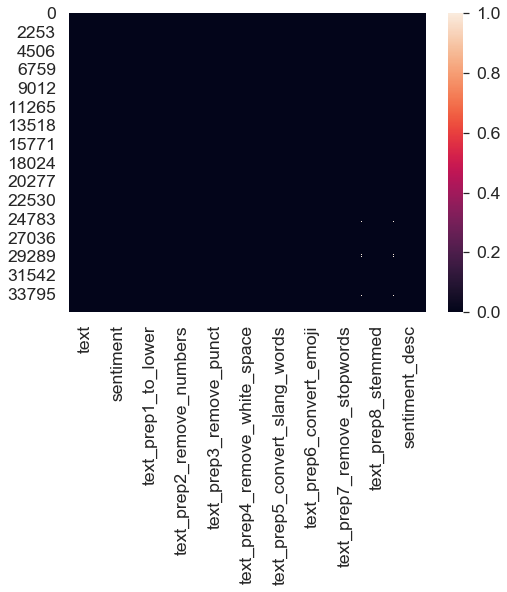

In [181]:
sns.heatmap(df_final.isna());

In [182]:
df_final.describe(include="object")

,text,text_prep1_to_lower,text_prep2_remove_numbers,text_prep3_remove_punct,text_prep4_remove_white_space,text_prep5_convert_slang_words,text_prep6_convert_emoji,text_prep7_remove_stopwords,text_prep8_stemmed,sentiment_desc
count,36032,36032,36032,36032,36032,36032,36032,35723,35723,36032
unique,27617,27594,27586,27552,27530,27475,27475,27050,24340,3
top,24/09/2013 21:42 Sosok Gubernur Jokowi dan Mantan Wakil Presiden Jusuf Kalla dinyatakan sebagai 2 tokoh terpopuler dalam perbincangan...,24/09/2013 21:42 sosok gubernur jokowi dan mantan wakil presiden jusuf kalla dinyatakan sebagai 2 tokoh terpopuler dalam perbincangan...,// : sosok gubernur jokowi dan mantan wakil presiden jusuf kalla dinyatakan sebagai tokoh terpopuler dalam perbincangan...,sosok gubernur jokowi dan mantan wakil presiden jusuf kalla dinyatakan sebagai tokoh terpopuler dalam perbincangan,sosok gubernur jokowi dan mantan wakil presiden jusuf kalla dinyatakan sebagai tokoh terpopuler dalam perbincangan,sosok gubernur jokowi dan mantan wakil presiden jusuf kalla dinyatakan sebagai tokoh terpopuler dalam perbincangan,sosok gubernur jokowi dan mantan wakil presiden jusuf kalla dinyatakan sebagai tokoh terpopuler dalam perbincangan,sosok gubernur jokowi mantan wakil presiden jusuf kalla dinyatakan tokoh terpopuler perbincangan,sosok gubernur jokowi mantan wakil presiden jusuf kalla nyata tokoh populer bincang,bad
freq,59,59,59,59,59,59,59,59,59,16638


#### Handle missing values

In [183]:
display(df_final.isna().sum())
len(df_final)
df_final.info()

text                                0
sentiment                           0
text_prep1_to_lower                 0
text_prep2_remove_numbers           0
text_prep3_remove_punct             0
text_prep4_remove_white_space       0
text_prep5_convert_slang_words      0
text_prep6_convert_emoji            0
text_prep7_remove_stopwords       309
text_prep8_stemmed                309
sentiment_desc                      0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36032 entries, 0 to 36031
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   text                            36032 non-null  object
 1   sentiment                       36032 non-null  int64 
 2   text_prep1_to_lower             36032 non-null  object
 3   text_prep2_remove_numbers       36032 non-null  object
 4   text_prep3_remove_punct         36032 non-null  object
 5   text_prep4_remove_white_space   36032 non-null  object
 6   text_prep5_convert_slang_words  36032 non-null  object
 7   text_prep6_convert_emoji        36032 non-null  object
 8   text_prep7_remove_stopwords     35723 non-null  object
 9   text_prep8_stemmed              35723 non-null  object
 10  sentiment_desc                  36032 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.0+ MB


In [184]:
df_final[df_final['text_prep7_remove_stopwords'].isna()]

,text,sentiment,text_prep1_to_lower,text_prep2_remove_numbers,text_prep3_remove_punct,text_prep4_remove_white_space,text_prep5_convert_slang_words,text_prep6_convert_emoji,text_prep7_remove_stopwords,text_prep8_stemmed,sentiment_desc
2263,masalah,-1,masalah,masalah,masalah,masalah,masalah,masalah,NaN,NaN,bad
3459,yakin,1,yakin,yakin,yakin,yakin,yakin,yakin,NaN,NaN,good
8419,baik,1,baik,baik,baik,baik,baik,baik,NaN,NaN,good
21142,hanya,-1,hanya,hanya,hanya,hanya,hanya,hanya,NaN,NaN,bad
21143,cuma,-1,cuma,cuma,cuma,cuma,cuma,cuma,NaN,NaN,bad
...,...,...,...,...,...,...,...,...,...,...,...
35220,yakin,1,yakin,yakin,yakin,yakin,yakin,yakin,NaN,NaN,good
35302,yakin,1,yakin,yakin,yakin,yakin,yakin,yakin,NaN,NaN,good
35309,benar,1,benar,benar,benar,benar,benar,benar,NaN,NaN,good
35352,tepat,1,tepat,tepat,tepat,tepat,tepat,tepat,NaN,NaN,good


In [185]:
nan_data = list(df_final[df_final['text_prep7_remove_stopwords'].isna()]['text_prep6_convert_emoji'])
nan_data
nan_data_df = df_final[df_final['text_prep7_remove_stopwords'].isna()][['text']]
nan_data_df

,text
2263,masalah
3459,yakin
8419,baik
21142,hanya
21143,cuma
...,...
35220,yakin
35302,yakin
35309,benar
35352,tepat


In [186]:
pd.options.display.max_colwidth = None

nan_data_df["0lower"] = nan_data_df["text"].apply(lambda x: to_lower(x))
nan_data_df["0remove_numbers"] = nan_data_df["0lower"].apply(lambda x: remove_numbers(x))
nan_data_df["0remove_punct"] = nan_data_df["0remove_numbers"].apply(lambda x: remove_punct(x))
nan_data_df["0remove_white_space"] = nan_data_df["0remove_punct"].apply(lambda x: remove_white_space(x))
nan_data_df["0slang_converter"] = nan_data_df["0remove_white_space"].apply(lambda x: slang_converter(x))
nan_data_df["0emoji_converter"] = nan_data_df["0slang_converter"].apply(lambda x: emoji_converter(x))
nan_data_df["0_cleaned"] = nan_data_df["0emoji_converter"].apply(lambda x: remove_stopwords(x))

nan_data_df

,text,0lower,0remove_numbers,0remove_punct,0remove_white_space,0slang_converter,0emoji_converter,0_cleaned
2263,masalah,masalah,masalah,masalah,masalah,masalah,masalah,
3459,yakin,yakin,yakin,yakin,yakin,yakin,yakin,
8419,baik,baik,baik,baik,baik,baik,baik,
21142,hanya,hanya,hanya,hanya,hanya,hanya,hanya,
21143,cuma,cuma,cuma,cuma,cuma,cuma,cuma,
...,...,...,...,...,...,...,...,...
35220,yakin,yakin,yakin,yakin,yakin,yakin,yakin,
35302,yakin,yakin,yakin,yakin,yakin,yakin,yakin,
35309,benar,benar,benar,benar,benar,benar,benar,
35352,tepat,tepat,tepat,tepat,tepat,tepat,tepat,


In [187]:
display(nan_data_df.isna().sum())

text                   0
0lower                 0
0remove_numbers        0
0remove_punct          0
0remove_white_space    0
0slang_converter       0
0emoji_converter       0
0_cleaned              0
dtype: int64

In [188]:
exist = []
not_exist = []
for i in nan_data:
    if i not in STOPWORDS:
        exist.append(i)
    else:
        not_exist.append(i)
        
print(f"Stopwords: {len(STOPWORDS)} \n exist: {len(exist)} \n not_exist: {len(not_exist)}")

Stopwords: 935 
 exist: 94 
 not_exist: 215


dropping missing values

In [189]:
df_final.dropna(inplace=True)
display(df_final.isna().sum())
len(df_final)

text                              0
sentiment                         0
text_prep1_to_lower               0
text_prep2_remove_numbers         0
text_prep3_remove_punct           0
text_prep4_remove_white_space     0
text_prep5_convert_slang_words    0
text_prep6_convert_emoji          0
text_prep7_remove_stopwords       0
text_prep8_stemmed                0
sentiment_desc                    0
dtype: int64

35723

#### Handle Duplicate Data

In [190]:
print('before drop duplicates')
print("total data:", len(df_final))
print("unique data:", df_final.text.nunique())

before drop duplicates
total data: 35723
unique data: 27455


In [191]:
df_final.drop_duplicates(['text'], inplace=True)
print('after drop duplicates')
print("total data:", len(df_final))
print("unique data:", df_final.text.nunique())

after drop duplicates
total data: 27455
unique data: 27455


## 2) Distribution of Sentiment
see the distribution of sentiment in the datasets

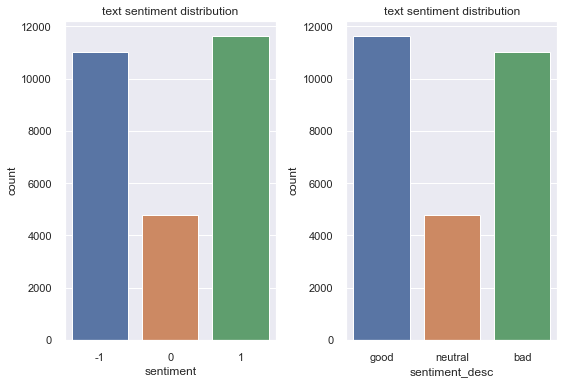

,sentiment_desc,text_prep7_remove_stopwords,percentage
1,good,11636,42.38
0,bad,11030,40.17
2,neutral,4789,17.44


In [192]:
# barchart
sns.set(style='darkgrid')

plt.subplot(1,2,1)
sns.countplot(x=df_final.sentiment)
plt.title('text sentiment distribution')

plt.subplot(1,2,2)
sns.countplot(x=df_final.sentiment_desc)
plt.title('text sentiment distribution')

plt.tight_layout()
plt.show()

# dataframe
temp = df_final.groupby('sentiment_desc').count()['text_prep7_remove_stopwords'].reset_index().sort_values(by='text_prep7_remove_stopwords', ascending=False)
temp['percentage'] = list(round(df_final.sentiment_desc.value_counts(normalize=True) * 100, 2))
temp

# sentiment_distribution = pd.DataFrame(df_stemmed_text.sentiment.value_counts())
# sentiment_distribution['percentage'] = list(round(df_stemmed_text.sentiment.value_counts(normalize=True) * 100, 2))
# sentiment_distribution

## 3) Word Frequency

In [193]:
df_final.sample(1)

,text,sentiment,text_prep1_to_lower,text_prep2_remove_numbers,text_prep3_remove_punct,text_prep4_remove_white_space,text_prep5_convert_slang_words,text_prep6_convert_emoji,text_prep7_remove_stopwords,text_prep8_stemmed,sentiment_desc
1360,"lokasi nya di jalan braga mudah dicari , resto nya cukup bersih , luas . menu bebek bervariasi dan saya mencoba bebek kremes nya , rasanya enak tetapi bebek nya terlalu berlemak . staff nya sangat ramah dan informatif , penyajian cepat . harga nya murah dan yang paling saya suka adalah sambal bawang nya yang pedas dan wangi . bakal balik lagi untuk dicoba yang lain .",1,"lokasi nya di jalan braga mudah dicari , resto nya cukup bersih , luas . menu bebek bervariasi dan saya mencoba bebek kremes nya , rasanya enak tetapi bebek nya terlalu berlemak . staff nya sangat ramah dan informatif , penyajian cepat . harga nya murah dan yang paling saya suka adalah sambal bawang nya yang pedas dan wangi . bakal balik lagi untuk dicoba yang lain .","lokasi nya di jalan braga mudah dicari , resto nya cukup bersih , luas . menu bebek bervariasi dan saya mencoba bebek kremes nya , rasanya enak tetapi bebek nya terlalu berlemak . staff nya sangat ramah dan informatif , penyajian cepat . harga nya murah dan yang paling saya suka adalah sambal bawang nya yang pedas dan wangi . bakal balik lagi untuk dicoba yang lain .",lokasi nya di jalan braga mudah dicari resto nya cukup bersih luas menu bebek bervariasi dan saya mencoba bebek kremes nya rasanya enak tetapi bebek nya terlalu berlemak staff nya sangat ramah dan informatif penyajian cepat harga nya murah dan yang paling saya suka adalah sambal bawang nya yang pedas dan wangi bakal balik lagi untuk dicoba yang lain,lokasi nya di jalan braga mudah dicari resto nya cukup bersih luas menu bebek bervariasi dan saya mencoba bebek kremes nya rasanya enak tetapi bebek nya terlalu berlemak staff nya sangat ramah dan informatif penyajian cepat harga nya murah dan yang paling saya suka adalah sambal bawang nya yang pedas dan wangi bakal balik lagi untuk dicoba yang lain,lokasi nya di jalan braga mudah dicari resto nya cukup bersih luas menu bebek bervariasi dan saya mencoba bebek kremes nya rasanya enak tetapi bebek nya terlalu berlemak staff nya sangat ramah dan informatif penyajian cepat harga nya murah dan yang paling saya suka adalah sambal bawang nya yang pedas dan wangi bakal balik lagi untuk dicoba yang lain,lokasi nya di jalan braga mudah dicari resto nya cukup bersih luas menu bebek bervariasi dan saya mencoba bebek kremes nya rasanya enak tetapi bebek nya terlalu berlemak staff nya sangat ramah dan informatif penyajian cepat harga nya murah dan yang paling saya suka adalah sambal bawang nya yang pedas dan wangi bakal balik lagi untuk dicoba yang lain,lokasi jalan braga mudah dicari resto bersih luas menu bebek bervariasi mencoba bebek kremes enak bebek berlemak staff ramah informatif penyajian cepat harga murah suka sambal bawang pedas wangi dicoba,lokasi jalan braga mudah cari resto bersih luas menu bebek variasi coba bebek kremes enak bebek lemak staff ramah informatif saji cepat harga murah suka sambal bawang pedas wangi coba,good


In [194]:
def vocab(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()
    
    vocabulary = {'word': check.index, 'freq': check.values}
    vocabulary = pd.DataFrame(vocabulary)
    vocabulary.index = vocabulary['word']
    vocabulary.drop('word', axis=1, inplace=True)
    vocabulary.sort_values('freq', ascending=False, inplace=True)
    
    return vocabulary

# check = pd.Series(df_final[df_final['sentiment_desc'] == 'bad']['text_prep6_stem_without_stop_words'][0:4])
# check = check.str.extractall('([a-zA_Z]+)')
# check.columns = ['check']
# b = check.reset_index(drop=True)
# check = b['check'].value_counts()

# vocabulary = {'word': check.index, 'freq': check.values}
# vocabulary = pd.DataFrame(vocabulary)
# vocabulary.index = vocabulary['word']
# vocabulary.drop('word', axis=1, inplace=True)

# display(check)
# display(b)
# display(vocabulary)

#### word frequency - bad

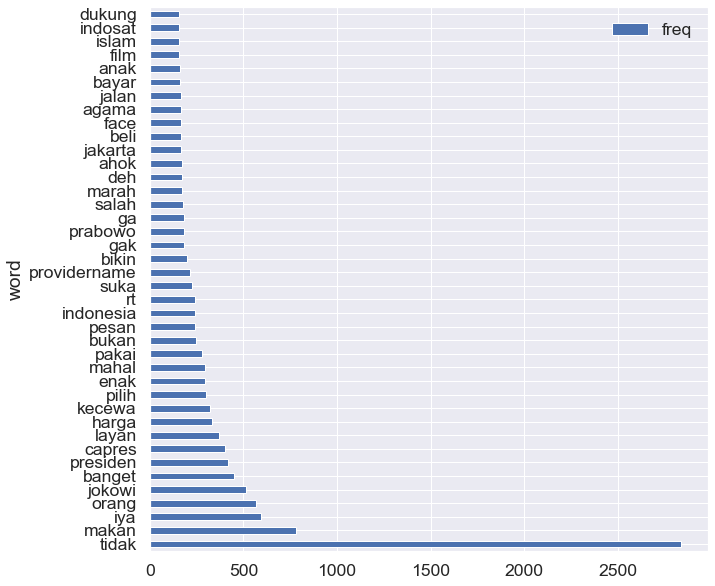

In [195]:
vocabulary_cleaned = vocab(df_final[df_final['sentiment_desc'] == 'bad']['text_prep8_stemmed'])

sns.set_context(context='notebook', font_scale=1.6)
vocabulary_cleaned[:40].plot(kind='barh', figsize=(10,10))

plt.show()

#### word frequency - good

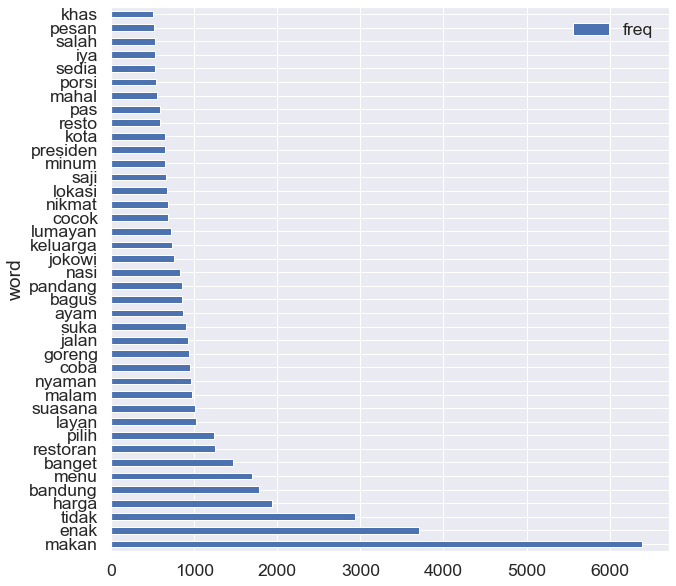

In [196]:
vocabulary_cleaned = vocab(df_final[df_final['sentiment_desc'] == 'good']['text_prep8_stemmed'])

sns.set_context(context='notebook', font_scale=1.6)
vocabulary_cleaned[:40].plot(kind='barh', figsize=(10,10))

plt.show()

#### word frequency - neutral

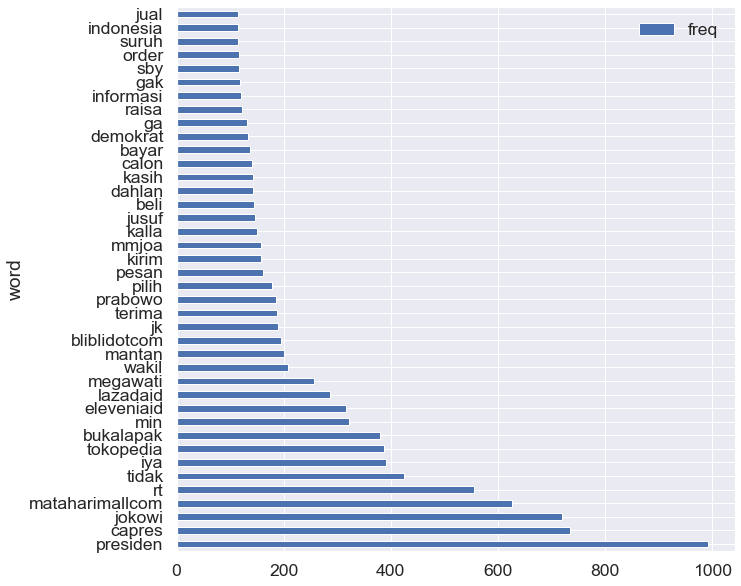

In [197]:
vocabulary_cleaned = vocab(df_final[df_final['sentiment_desc'] == 'neutral']['text_prep8_stemmed'])

sns.set_context(context='notebook', font_scale=1.6)
vocabulary_cleaned[:40].plot(kind='barh', figsize=(10,10))

plt.show()

## 4) Word Cloud

In [198]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud)
    plt.axis('off')

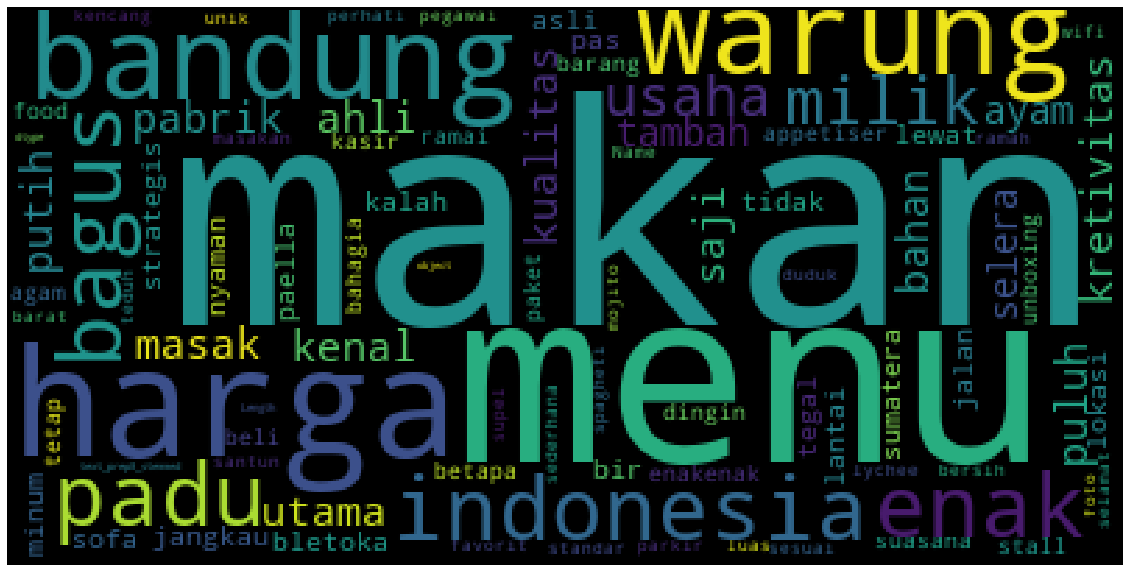

In [199]:
# wordcloud - good
word_cloud = WordCloud().generate(str(df_final[df_final['sentiment_desc'] == 'good']['text_prep8_stemmed']))
plot_cloud(word_cloud)

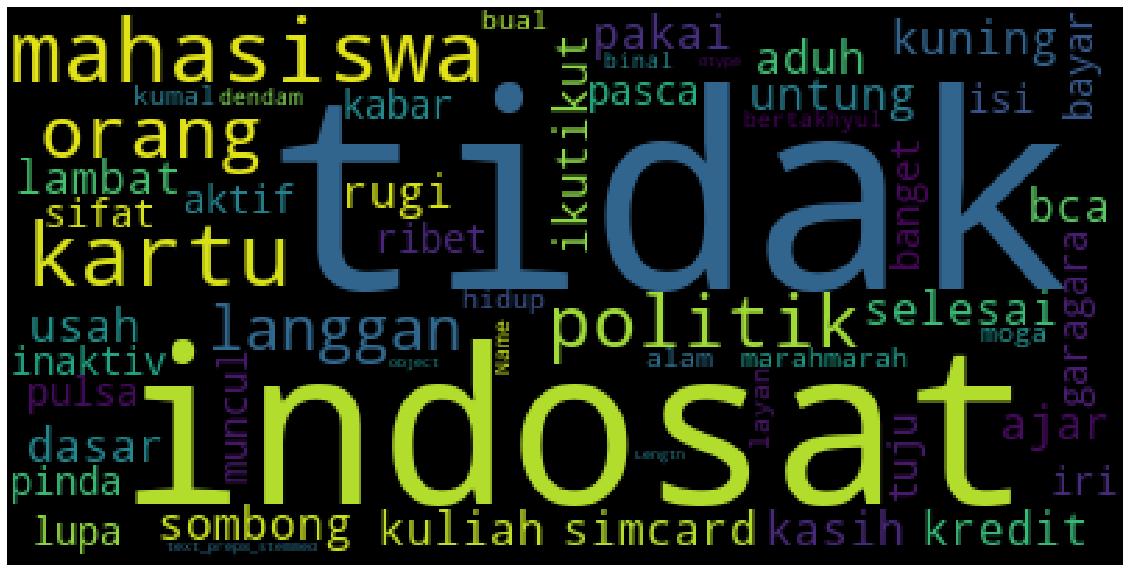

In [200]:
# wordcloud - bad
word_cloud = WordCloud().generate(str(df_final[df_final['sentiment_desc'] == 'bad']['text_prep8_stemmed']))
plot_cloud(word_cloud)

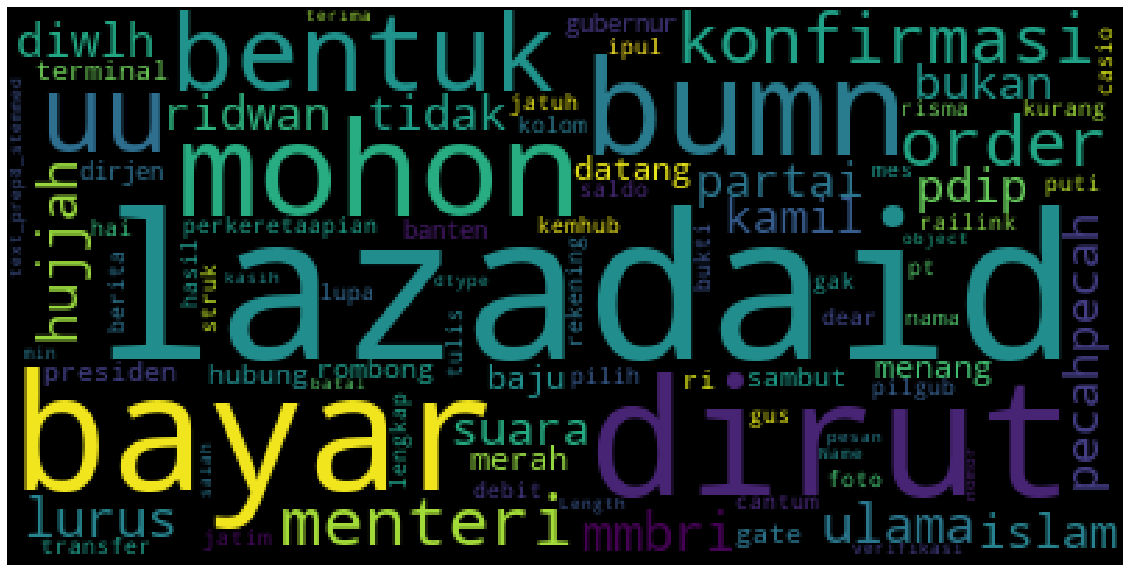

In [201]:
# wordcloud - neutral
word_cloud = WordCloud().generate(str(df_final[df_final['sentiment_desc'] == 'neutral']['text_prep8_stemmed']))
plot_cloud(word_cloud)

## 6) Length of Sentences/Words
- we have 2 version of preprocessed data:
    1. data with stopwords
    1. data without stopwords
- we will count data without stopwords

In [202]:
df_final['text_prep8_stemmed_num'] = df_final['text_prep8_stemmed'].apply(lambda x: len(str(x).split()))
df_final.sample(1)

,text,sentiment,text_prep1_to_lower,text_prep2_remove_numbers,text_prep3_remove_punct,text_prep4_remove_white_space,text_prep5_convert_slang_words,text_prep6_convert_emoji,text_prep7_remove_stopwords,text_prep8_stemmed,sentiment_desc,text_prep8_stemmed_num
46,tidak memuaskan,-1,tidak memuaskan,tidak memuaskan,tidak memuaskan,tidak memuaskan,tidak memuaskan,tidak memuaskan,tidak memuaskan,tidak muas,bad,2


In [203]:
# data = [df_final['text_prep8_stemmed_num']]
# group_labels = ['Cleaned Text Data']

# # distribution plot
# fig = ff.create_distplot(data, group_labels, show_curve=False)
# fig.update_layout(title_text='Distribution of Words')
# fig.update_layout(
#     autosize=False,
#     width=900,
#     height=700,
#     paper_bgcolor="LightSteelBlue",
# )

# fig.show()


# - most words are concentrated in the quantity of 1 to 3 since the dataset also include many single words/phrases
# - there is one data whose number of words are more than 100 words

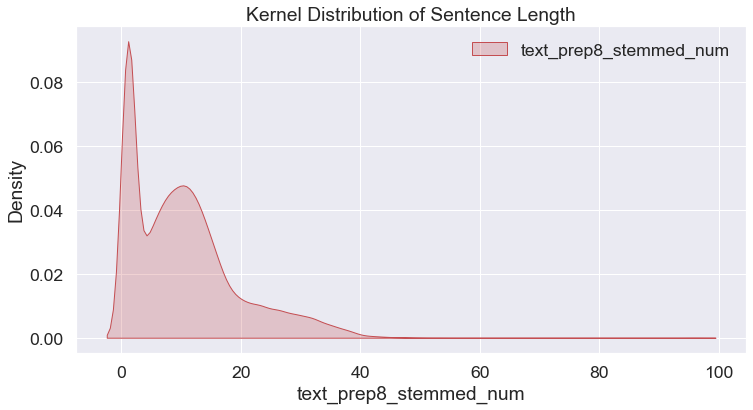

In [204]:
plt.figure(figsize=(12,6))
plt.title('Kernel Distribution of Sentence Length')
p1=sns.kdeplot(df_final['text_prep8_stemmed_num'], shade=True, color="r")
# p2=sns.kdeplot(df_final['text_prep6_stem_without_stop_words_num'], shade=True, color="b")
plt.legend(labels=['text_prep8_stemmed_num'])

plt.show()

#### Word/Sentence Length Distribution based on Sentiment

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimen

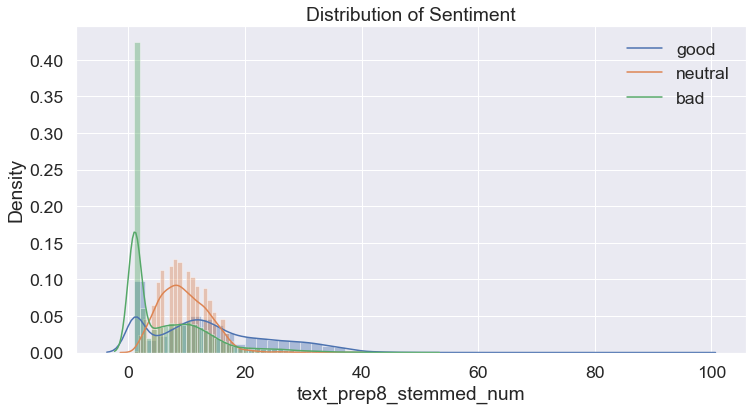

In [205]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Sentiment')

good = df_final[df_final['sentiment_desc'] == 'good']
neutral = df_final[df_final['sentiment_desc'] == 'neutral']
bad = df_final[df_final['sentiment_desc'] == 'bad']

sns.distplot(good['text_prep8_stemmed_num'])
sns.distplot(neutral['text_prep8_stemmed_num'])
sns.distplot(bad['text_prep8_stemmed_num'])

plt.legend(['good', 'neutral', 'bad'])

plt.show()

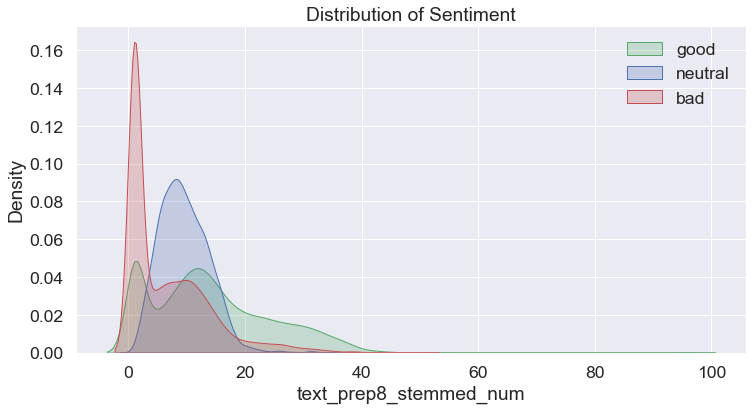

In [206]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Sentiment')

p1=sns.kdeplot(df_final[df_final['sentiment_desc']=='good']['text_prep8_stemmed_num'], shade=True, color="g")
p1=sns.kdeplot(df_final[df_final['sentiment_desc']=='neutral']['text_prep8_stemmed_num'], shade=True, color="b")
p1=sns.kdeplot(df_final[df_final['sentiment_desc']=='bad']['text_prep8_stemmed_num'], shade=True, color="r")


plt.legend(labels=['good','neutral', 'bad'])

plt.show()

- data with neutral sentiment are mostly concentrated on the length of 5 - 20. It means they are mostly in the form of sentences.
- data with bad sentiment have high number in the length of 1 - 5 since there many single words and phrases are included in the data. 
- there are also data in the form of sentences for good and bad sentiment.
- it can be assumed that the prediction can learn better in predicting the good and bad sentiment regardless the quantity of words in a context. This is still considered normal since our focus is to anticipated the potential cause of reputational risks which is related to learning the pattern of context which contains bad sentiment.

# Part 4: Encoding

In [207]:
words_sample = list(df_final['text_prep8_stemmed'][1:4]) + list(df_final['text_prep8_stemmed'][25000:25010])
print(f"length: {len(words_sample)}"), words_sample

length: 13


(None,
 ['mohon ulama lurus mmbri hujjah partai diwlh suara islam tidak pecahpecah',
  'lokasi strategis jalan sumatera bandung nyaman sofa lantai paella enak pas makan minum bir dingin appetiser enakenak',
  'betapa bahagia unboxing paket barang bagus tetap beli',
  'laku',
  'pelanpelan',
  'langgar hukum',
  'langgar hukum',
  'lawak',
  'lemah',
  'lepas nafsu berahi',
  'balas',
  'baur',
  'beku'])

#### Document Term Matrix

In [72]:
vect = CountVectorizer()
vect.fit(words_sample)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [73]:
print('Vocab Size: {}'.format(len(vect.vocabulary_)))
print('Vocab Content: {}'.format((vect.vocabulary_)))

Vocab Size: 48
Vocab Content: {'mohon': 31, 'ulama': 46, 'lurus': 27, 'mmbri': 30, 'hujjah': 16, 'partai': 36, 'diwlh': 13, 'suara': 42, 'islam': 18, 'tidak': 45, 'pecahpecah': 38, 'lokasi': 26, 'strategis': 41, 'jalan': 19, 'sumatera': 43, 'bandung': 4, 'nyaman': 33, 'sofa': 40, 'lantai': 22, 'paella': 34, 'enak': 14, 'pas': 37, 'makan': 28, 'minum': 29, 'bir': 11, 'dingin': 12, 'appetiser': 0, 'enakenak': 15, 'betapa': 10, 'bahagia': 2, 'unboxing': 47, 'paket': 35, 'barang': 5, 'bagus': 1, 'tetap': 44, 'beli': 8, 'laku': 20, 'pelanpelan': 39, 'langgar': 21, 'hukum': 17, 'lawak': 23, 'lemah': 24, 'lepas': 25, 'nafsu': 32, 'berahi': 9, 'balas': 3, 'baur': 6, 'beku': 7}


In [74]:
dtm = vect.transform(words_sample)

##### list of converted sentences

In [75]:
print('length of array', len(dtm.toarray()))
dtm.toarray()

length of array 13


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       

##### list of vocabularies

In [76]:
print(vect.get_feature_names())

['appetiser', 'bagus', 'bahagia', 'balas', 'bandung', 'barang', 'baur', 'beku', 'beli', 'berahi', 'betapa', 'bir', 'dingin', 'diwlh', 'enak', 'enakenak', 'hujjah', 'hukum', 'islam', 'jalan', 'laku', 'langgar', 'lantai', 'lawak', 'lemah', 'lepas', 'lokasi', 'lurus', 'makan', 'minum', 'mmbri', 'mohon', 'nafsu', 'nyaman', 'paella', 'paket', 'partai', 'pas', 'pecahpecah', 'pelanpelan', 'sofa', 'strategis', 'suara', 'sumatera', 'tetap', 'tidak', 'ulama', 'unboxing']


In [77]:
pd.set_option('display.max_colwidth', 1000)

dtm_df = pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())
dtm_df['text'] = words_sample
dtm_df

,appetiser,bagus,bahagia,balas,bandung,barang,baur,beku,beli,berahi,...,pelanpelan,sofa,strategis,suara,sumatera,tetap,tidak,ulama,unboxing,text
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,mohon ulama lurus mmbri hujjah partai diwlh suara islam tidak pecahpecah
1,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,lokasi strategis jalan sumatera bandung nyaman sofa lantai paella enak pas makan minum bir dingin appetiser enakenak
2,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,betapa bahagia unboxing paket barang bagus tetap beli
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,laku
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,pelanpelan
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,langgar hukum
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,langgar hukum
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,lawak
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,lemah
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,lepas nafsu berahi


In [78]:
# print(dtm_df.iloc[1])

#### Document Term Matrix with N-Grams

In [79]:
words_sample

['mohon ulama lurus mmbri hujjah partai diwlh suara islam tidak pecahpecah',
 'lokasi strategis jalan sumatera bandung nyaman sofa lantai paella enak pas makan minum bir dingin appetiser enakenak',
 'betapa bahagia unboxing paket barang bagus tetap beli',
 'laku',
 'pelanpelan',
 'langgar hukum',
 'langgar hukum',
 'lawak',
 'lemah',
 'lepas nafsu berahi',
 'balas',
 'baur',
 'beku']

In [80]:
vect_2gram = CountVectorizer(ngram_range=(1,2))
vect_2gram.fit(words_sample)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [81]:
print('Vocab Size: {}'.format(len(vect_2gram.vocabulary_)))
print('Vocab Content: {}'.format(vect_2gram.vocabulary_))

Vocab Size: 84
Vocab Content: {'mohon': 52, 'ulama': 80, 'lurus': 44, 'mmbri': 50, 'hujjah': 26, 'partai': 62, 'diwlh': 21, 'suara': 72, 'islam': 29, 'tidak': 78, 'pecahpecah': 66, 'mohon ulama': 53, 'ulama lurus': 81, 'lurus mmbri': 45, 'mmbri hujjah': 51, 'hujjah partai': 27, 'partai diwlh': 63, 'diwlh suara': 22, 'suara islam': 73, 'islam tidak': 30, 'tidak pecahpecah': 79, 'lokasi': 42, 'strategis': 70, 'jalan': 31, 'sumatera': 74, 'bandung': 7, 'nyaman': 56, 'sofa': 68, 'lantai': 36, 'paella': 58, 'enak': 23, 'pas': 64, 'makan': 46, 'minum': 48, 'bir': 17, 'dingin': 19, 'appetiser': 0, 'enakenak': 25, 'lokasi strategis': 43, 'strategis jalan': 71, 'jalan sumatera': 32, 'sumatera bandung': 75, 'bandung nyaman': 8, 'nyaman sofa': 57, 'sofa lantai': 69, 'lantai paella': 37, 'paella enak': 59, 'enak pas': 24, 'pas makan': 65, 'makan minum': 47, 'minum bir': 49, 'bir dingin': 18, 'dingin appetiser': 20, 'appetiser enakenak': 1, 'betapa': 15, 'bahagia': 4, 'unboxing': 82, 'paket': 60, '

In [82]:
dtm_2gram = pd.DataFrame(vect_2gram.transform(words_sample).toarray(), columns=vect_2gram.get_feature_names())
dtm_2gram['text'] = words_sample
dtm_2gram

,appetiser,appetiser enakenak,bagus,bagus tetap,bahagia,bahagia unboxing,balas,bandung,bandung nyaman,barang,...,sumatera bandung,tetap,tetap beli,tidak,tidak pecahpecah,ulama,ulama lurus,unboxing,unboxing paket,text
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,0,mohon ulama lurus mmbri hujjah partai diwlh suara islam tidak pecahpecah
1,1,1,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,lokasi strategis jalan sumatera bandung nyaman sofa lantai paella enak pas makan minum bir dingin appetiser enakenak
2,0,0,1,1,1,1,0,0,0,1,...,0,1,1,0,0,0,0,1,1,betapa bahagia unboxing paket barang bagus tetap beli
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,laku
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pelanpelan
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,langgar hukum
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,langgar hukum
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,lawak
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,lemah
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,lepas nafsu berahi


In [83]:
print(dtm_2gram.iloc[1])

appetiser                                                                                                                                1
appetiser enakenak                                                                                                                       1
bagus                                                                                                                                    0
bagus tetap                                                                                                                              0
bahagia                                                                                                                                  0
                                                                              ...                                                         
ulama                                                                                                                                    0
ulama lurus                

#### TF-IDF

In [84]:
vect = TfidfVectorizer(ngram_range=(1,2))
vect.fit(words_sample)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [85]:
print('Vocab Size: {}'.format(len(vect.vocabulary_)))
print('Vocab Content: {}'.format(vect.vocabulary_))

Vocab Size: 84
Vocab Content: {'mohon': 52, 'ulama': 80, 'lurus': 44, 'mmbri': 50, 'hujjah': 26, 'partai': 62, 'diwlh': 21, 'suara': 72, 'islam': 29, 'tidak': 78, 'pecahpecah': 66, 'mohon ulama': 53, 'ulama lurus': 81, 'lurus mmbri': 45, 'mmbri hujjah': 51, 'hujjah partai': 27, 'partai diwlh': 63, 'diwlh suara': 22, 'suara islam': 73, 'islam tidak': 30, 'tidak pecahpecah': 79, 'lokasi': 42, 'strategis': 70, 'jalan': 31, 'sumatera': 74, 'bandung': 7, 'nyaman': 56, 'sofa': 68, 'lantai': 36, 'paella': 58, 'enak': 23, 'pas': 64, 'makan': 46, 'minum': 48, 'bir': 17, 'dingin': 19, 'appetiser': 0, 'enakenak': 25, 'lokasi strategis': 43, 'strategis jalan': 71, 'jalan sumatera': 32, 'sumatera bandung': 75, 'bandung nyaman': 8, 'nyaman sofa': 57, 'sofa lantai': 69, 'lantai paella': 37, 'paella enak': 59, 'enak pas': 24, 'pas makan': 65, 'makan minum': 47, 'minum bir': 49, 'bir dingin': 18, 'dingin appetiser': 20, 'appetiser enakenak': 1, 'betapa': 15, 'bahagia': 4, 'unboxing': 82, 'paket': 60, '

In [86]:
dtm_tf_idf = vect.transform(words_sample)

In [87]:
dtm_tf_idf_df = pd.DataFrame(dtm_tf_idf.toarray(), columns=vect.get_feature_names())
dtm_tf_idf_df['text'] = words_sample
dtm_tf_idf_df

,appetiser,appetiser enakenak,bagus,bagus tetap,bahagia,bahagia unboxing,balas,bandung,bandung nyaman,barang,...,sumatera bandung,tetap,tetap beli,tidak,tidak pecahpecah,ulama,ulama lurus,unboxing,unboxing paket,text
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.218218,0.218218,0.218218,0.218218,0.000000,0.000000,mohon ulama lurus mmbri hujjah partai diwlh suara islam tidak pecahpecah
1,0.174078,0.174078,0.000000,0.000000,0.000000,0.000000,0.0,0.174078,0.174078,0.000000,...,0.174078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,lokasi strategis jalan sumatera bandung nyaman sofa lantai paella enak pas makan minum bir dingin appetiser enakenak
2,0.000000,0.000000,0.258199,0.258199,0.258199,0.258199,0.0,0.000000,0.000000,0.258199,...,0.000000,0.258199,0.258199,0.000000,0.000000,0.000000,0.000000,0.258199,0.258199,betapa bahagia unboxing paket barang bagus tetap beli
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,laku
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,pelanpelan
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,langgar hukum
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,langgar hukum
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,lawak
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,lemah
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,lepas nafsu berahi


# Part C: Modelling - Simple

In [209]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, plot_confusion_matrix

## C.1) Train Test Split

In [208]:
text = df_final['text_prep8_stemmed']
y = df_final['sentiment']

text_train, text_test, y_train, y_test = train_test_split(text, y, test_size=.3, stratify=y, random_state=2020)
text_train.shape, text_test.shape, y_train.shape, y_test.shape

((19218,), (8237,), (19218,), (8237,))

##### simulation of fit & transform data

In [90]:
text_train, text_test

(13438                                    yes mustofanahra capres baik temponewsroom nasional presiden dahlan jemput takdir
 31149                                                                                                            fenomenal
 13059                coba despar edi pramono rival berat capres dahlan anis basw ajaazwar himnk bertusaryadavi dedenbasuki
 7612                                                                                            makan susu indomilk kulkas
 11551                                              bahan baku mie olah profesional enak varian kreatif pokok keep upnormal
                                                                ...                                                        
 7837     saudarasaudara cari makan khas sunda warung ampera cabang makan siapsiap antre ria deh gemar makan oke banget deh
 23039                                                                                                                lirih
 16752  

#### fit and transform method

In [91]:
# vect = CountVectorizer().fit(text_train)
# X_train = vect.transform(text_train)
# X_test = vect.transform(text_test)
# X_train.toarray(), X_test.toarray()

## C.2) Modelling with CountVectorizer

### Multinomial Bias - CountVectorizer

In [92]:
sentiment_analyzer_nb = Pipeline([
    ('cvt', CountVectorizer(ngram_range = (1,2))),
    ('nb', MultinomialNB())
])

In [93]:
sentiment_analyzer_nb.fit(text_train, y_train)

Pipeline(memory=None,
         steps=[('cvt',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [94]:
y_predNB = sentiment_analyzer_nb.predict(text_test)

In [95]:
print(classification_report(y_test, y_predNB))

              precision    recall  f1-score   support

          -1       0.78      0.70      0.74      3309
           0       0.70      0.76      0.73      1437
           1       0.74      0.79      0.77      3491

    accuracy                           0.75      8237
   macro avg       0.74      0.75      0.75      8237
weighted avg       0.75      0.75      0.75      8237



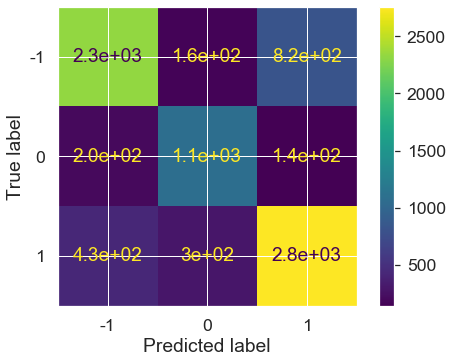

In [96]:
plot_confusion_matrix(sentiment_analyzer_nb, text_test, y_test);

### Logistic Regression - CountVectorizer

In [97]:
sentiment_analyzer_logit = Pipeline([
    ('cvt', CountVectorizer(ngram_range = (1,2))),
    ('logit', LogisticRegression(solver='liblinear'))
])

In [98]:
sentiment_analyzer_logit.fit(text_train, y_train)

Pipeline(memory=None,
         steps=[('cvt',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('logit',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                         

In [99]:
y_predLogit = sentiment_analyzer_logit.predict(text_test)

In [100]:
print(classification_report(y_test, y_predLogit))

              precision    recall  f1-score   support

          -1       0.76      0.89      0.82      3309
           0       0.80      0.73      0.76      1437
           1       0.87      0.77      0.82      3491

    accuracy                           0.81      8237
   macro avg       0.81      0.79      0.80      8237
weighted avg       0.81      0.81      0.81      8237



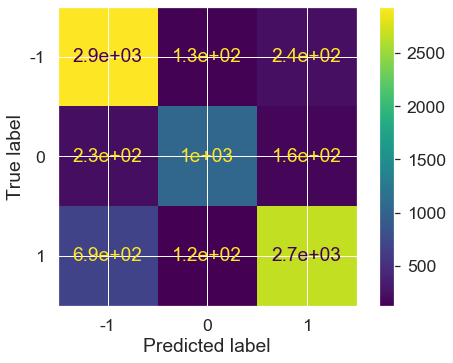

In [101]:
plot_confusion_matrix(sentiment_analyzer_logit, text_test, y_test);

## C.3) TF-IDF Vectorizer 

### Multinomial Bias - TF-IDF Vectorizer

In [102]:
sentiment_analyzer_nb_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2))),
    ('nb', MultinomialNB())
])

In [103]:
sentiment_analyzer_nb_tfidf.fit(text_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [104]:
y_predNB_tfidf = sentiment_analyzer_nb_tfidf.predict(text_test)

In [105]:
print(classification_report(y_test, y_predNB_tfidf))

              precision    recall  f1-score   support

          -1       0.80      0.70      0.75      3309
           0       0.85      0.51      0.63      1437
           1       0.70      0.90      0.79      3491

    accuracy                           0.75      8237
   macro avg       0.78      0.70      0.72      8237
weighted avg       0.77      0.75      0.74      8237



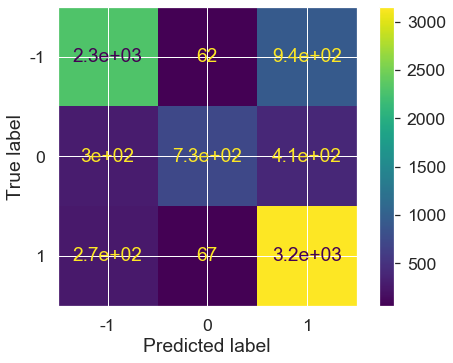

In [106]:
plot_confusion_matrix(sentiment_analyzer_nb_tfidf, text_test, y_test);

### Logistic Regression - TF-IDF Vectorizer

In [107]:
sentiment_analyzer_logit_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2))),
    ('logit', LogisticRegression(solver='liblinear'))
])

In [108]:
sentiment_analyzer_logit_tfidf.fit(text_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logit',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scali

In [109]:
y_predLogit_tfidf = sentiment_analyzer_logit_tfidf.predict(text_test)

In [110]:
print(classification_report(y_test, y_predLogit_tfidf))

              precision    recall  f1-score   support

          -1       0.79      0.84      0.81      3309
           0       0.74      0.73      0.73      1437
           1       0.84      0.80      0.82      3491

    accuracy                           0.80      8237
   macro avg       0.79      0.79      0.79      8237
weighted avg       0.80      0.80      0.80      8237



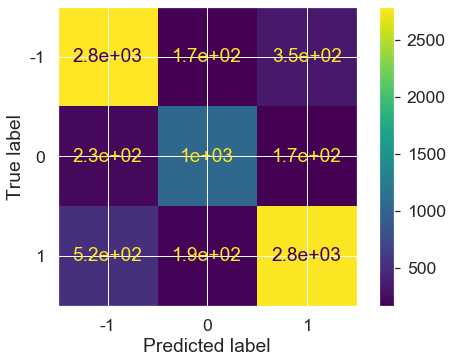

In [111]:
plot_confusion_matrix(sentiment_analyzer_logit_tfidf, text_test, y_test);

# Part C: Modelling - Combination of Pipeline & Crossvalidation

#### Text Preprocessing Function

In [210]:
# semua isinya sudah dikurasi
# - stopwords dikurangi negasinya
# - slang words sudah ditambahkan

STOPWORDS = ['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan', 'berkenaan', 'berlainan', 'berlalu', 'berlangsung', 'berlebihan', 'bermacam', 'bermacam-macam', 'bermaksud', 'bermula', 'bersama', 'bersama-sama', 'bersiap', 'bersiap-siap', 'bertanya', 'bertanya-tanya', 'berturut', 'berturut-turut', 'bertutur', 'berujar', 'berupa', 'besar', 'betul', 'betulkah', 'biasa', 'biasanya', 'bila', 'bilakah', 'bisa', 'bisakah', 'boleh', 'bolehkah', 'bolehlah', 'buat', 'bulan', 'bung', 'cara', 'caranya', 'cukup', 'cukupkah', 'cukuplah', 'cuma', 'dahulu', 'dalam', 'dan', 'dapat', 'dari', 'daripada', 'datang', 'dekat', 'demi', 'demikian', 'demikianlah', 'dengan', 'depan', 'di', 'dia', 'diakhiri', 'diakhirinya', 'dialah', 'diantara', 'diantaranya', 'diberi', 'diberikan', 'diberikannya', 'dibuat', 'dibuatnya', 'didapat', 'didatangkan', 'digunakan', 'diibaratkan', 'diibaratkannya', 'diingat', 'diingatkan', 'diinginkan', 'dijawab', 'dijelaskan', 'dijelaskannya', 'dikarenakan', 'dikatakan', 'dikatakannya', 'dikerjakan', 'diketahui', 'diketahuinya', 'dikira', 'dilakukan', 'dilalui', 'dilihat', 'dimaksud', 'dimaksudkan', 'dimaksudkannya', 'dimaksudnya', 'diminta', 'dimintai', 'dimisalkan', 'dimulai', 'dimulailah', 'dimulainya', 'dimungkinkan', 'dini', 'dipastikan', 'diperbuat', 'diperbuatnya', 'dipergunakan', 'diperkirakan', 'diperlihatkan', 'diperlukan', 'diperlukannya', 'dipersoalkan', 'dipertanyakan', 'dipunyai', 'diri', 'dirinya', 'disampaikan', 'disebut', 'disebutkan', 'disebutkannya', 'disini', 'disinilah', 'ditambahkan', 'ditandaskan', 'ditanya', 'ditanyai', 'ditanyakan', 'ditegaskan', 'ditujukan', 'ditunjuk', 'ditunjuki', 'ditunjukkan', 'ditunjukkannya', 'ditunjuknya', 'dituturkan', 'dituturkannya', 'diucapkan', 'diucapkannya', 'diungkapkan', 'dong', 'dua', 'dulu', 'empat', 'enggak', 'enggaknya', 'entah', 'entahlah', 'guna', 'gunakan', 'hal', 'hampir', 'hanya', 'hanyalah', 'hari', 'harus', 'haruslah', 'harusnya', 'hendak', 'hendaklah', 'hendaknya', 'hingga', 'ia', 'ialah', 'ibarat', 'ibaratkan', 'ibaratnya', 'ibu', 'ikut', 'ingat', 'ingat-ingat', 'ingin', 'inginkah', 'inginkan', 'ini', 'inikah', 'inilah', 'itu', 'itukah', 'itulah', 'jadi', 'jadilah', 'jadinya', 'jangan', 'jangankan', 'janganlah', 'jauh', 'jawab', 'jawaban', 'jawabnya', 'jelas', 'jelaskan', 'jelaslah', 'jelasnya', 'jika', 'jikalau', 'juga', 'jumlah', 'jumlahnya', 'justru', 'kala', 'kalau', 'kalaulah', 'kalaupun', 'kalian', 'kami', 'kamilah', 'kamu', 'kamulah', 'kan', 'kapan', 'kapankah', 'kapanpun', 'karena', 'karenanya', 'kasus', 'kata', 'katakan', 'katakanlah', 'katanya', 'ke', 'keadaan', 'kebetulan', 'kecil', 'kedua', 'keduanya', 'keinginan', 'kelamaan', 'kelihatan', 'kelihatannya', 'kelima', 'keluar', 'kembali', 'kemudian', 'kemungkinan', 'kemungkinannya', 'kenapa', 'kepada', 'kepadanya', 'kesampaian', 'keseluruhan', 'keseluruhannya', 'keterlaluan', 'ketika', 'khususnya', 'kini', 'kinilah', 'kira', 'kira-kira', 'kiranya', 'kita', 'kitalah', 'kok', 'kurang', 'lagi', 'lagian', 'lah', 'lain', 'lainnya', 'lalu', 'lama', 'lamanya', 'lanjut', 'lanjutnya', 'lebih', 'lewat', 'lima', 'luar', 'macam', 'maka', 'makanya', 'makin', 'malah', 'malahan', 'mampu', 'mampukah', 'mana', 'manakala', 'manalagi', 'masa', 'masalah', 'masalahnya', 'masih', 'masihkah', 'masing', 'masing-masing', 'mau', 'maupun', 'melainkan', 'melakukan', 'melalui', 'melihat', 'melihatnya', 'memang', 'memastikan', 'memberi', 'memberikan', 'membuat', 'memerlukan', 'memihak', 'meminta', 'memintakan', 'memisalkan', 'memperbuat', 'mempergunakan', 'memperkirakan', 'memperlihatkan', 'mempersiapkan', 'mempersoalkan', 'mempertanyakan', 'mempunyai', 'memulai', 'memungkinkan', 'menaiki', 'menambahkan', 'menandaskan', 'menanti', 'menanti-nanti', 'menantikan', 'menanya', 'menanyai', 'menanyakan', 'mendapat', 'mendapatkan', 'mendatang', 'mendatangi', 'mendatangkan', 'menegaskan', 'mengakhiri', 'mengapa', 'mengatakan', 'mengatakannya', 'mengenai', 'mengerjakan', 'mengetahui', 'menggunakan', 'menghendaki', 'mengibaratkan', 'mengibaratkannya', 'mengingat', 'mengingatkan', 'menginginkan', 'mengira', 'mengucapkan', 'mengucapkannya', 'mengungkapkan', 'menjadi', 'menjawab', 'menjelaskan', 'menuju', 'menunjuk', 'menunjuki', 'menunjukkan', 'menunjuknya', 'menurut', 'menuturkan', 'menyampaikan', 'menyangkut', 'menyatakan', 'menyebutkan', 'menyeluruh', 'menyiapkan', 'merasa', 'mereka', 'merekalah', 'merupakan', 'meski', 'meskipun', 'meyakini', 'meyakinkan', 'minta', 'mirip', 'misal', 'misalkan', 'misalnya', 'mula', 'mulai', 'mulailah', 'mulanya', 'mungkin', 'mungkinkah', 'nah', 'naik', 'namun', 'nanti', 'nantinya', 'nyaris', 'nyatanya', 'oleh', 'olehnya', 'pada', 'padahal', 'padanya', 'pak', 'paling', 'panjang', 'pantas', 'para', 'pasti', 'pastilah', 'penting', 'pentingnya', 'per', 'percuma', 'perlu', 'perlukah', 'perlunya', 'pernah', 'persoalan', 'pertama', 'pertama-tama', 'pertanyaan', 'pertanyakan', 'pihak', 'pihaknya', 'pukul', 'pula', 'pun', 'punya', 'rasa', 'rasanya', 'rata', 'rupanya', 'saat', 'saatnya', 'saja', 'sajalah', 'saling', 'sama', 'sama-sama', 'sambil', 'sampai', 'sampai-sampai', 'sampaikan', 'sana', 'sangat', 'sangatlah', 'satu', 'saya', 'sayalah', 'se', 'sebab', 'sebabnya', 'sebagai', 'sebagaimana', 'sebagainya', 'sebagian', 'sebaik', 'sebaik-baiknya', 'sebaiknya', 'sebaliknya', 'sebanyak', 'sebegini', 'sebegitu', 'sebelum', 'sebelumnya', 'sebenarnya', 'seberapa', 'sebesar', 'sebetulnya', 'sebisanya', 'sebuah', 'sebut', 'sebutlah', 'sebutnya', 'secara', 'secukupnya', 'sedang', 'sedangkan', 'sedemikian', 'sedikit', 'sedikitnya', 'seenaknya', 'segala', 'segalanya', 'segera', 'seharusnya', 'sehingga', 'seingat', 'sejak', 'sejauh', 'sejenak', 'sejumlah', 'sekadar', 'sekadarnya', 'sekali', 'sekali-kali', 'sekalian', 'sekaligus', 'sekalipun', 'sekarang', 'sekarang', 'sekecil', 'seketika', 'sekiranya', 'sekitar', 'sekitarnya', 'sekurang-kurangnya', 'sekurangnya', 'sela', 'selain', 'selaku', 'selalu', 'selama', 'selama-lamanya', 'selamanya', 'selanjutnya', 'seluruh', 'seluruhnya', 'semacam', 'semakin', 'semampu', 'semampunya', 'semasa', 'semasih', 'semata', 'semata-mata', 'semaunya', 'sementara', 'semisal', 'semisalnya', 'sempat', 'semua', 'semuanya', 'semula', 'sendiri', 'sendirian', 'sendirinya', 'seolah', 'seolah-olah', 'seorang', 'sepanjang', 'sepantasnya', 'sepantasnyalah', 'seperlunya', 'seperti', 'sepertinya', 'sepihak', 'sering', 'seringnya', 'serta', 'serupa', 'sesaat', 'sesama', 'sesampai', 'sesegera', 'sesekali', 'seseorang', 'sesuatu', 'sesuatunya', 'sesudah', 'sesudahnya', 'setelah', 'setempat', 'setengah', 'seterusnya', 'setiap', 'setiba', 'setibanya', 'setidak-tidaknya', 'setidaknya', 'setinggi', 'seusai', 'sewaktu', 'siap', 'siapa', 'siapakah', 'siapapun', 'sini', 'sinilah', 'soal', 'soalnya', 'suatu', 'sudah', 'sudahkah', 'sudahlah', 'supaya', 'tadi', 'tadinya', 'tahu', 'tahun', 'tak', 'tambah', 'tambahnya', 'tampak', 'tampaknya', 'tandas', 'tandasnya', 'tanpa', 'tanya', 'tanyakan', 'tanyanya', 'tapi', 'tegas', 'tegasnya', 'telah', 'tempat', 'tengah', 'tentang', 'tentu', 'tentulah', 'tentunya', 'tepat', 'terakhir', 'terasa', 'terbanyak', 'terdahulu', 'terdapat', 'terdiri', 'terhadap', 'terhadapnya', 'teringat', 'teringat-ingat', 'terjadi', 'terjadilah', 'terjadinya', 'terkira', 'terlalu', 'terlebih', 'terlihat', 'termasuk', 'ternyata', 'tersampaikan', 'tersebut', 'tersebutlah', 'tertentu', 'tertuju', 'terus', 'terutama', 'tetap', 'tetapi', 'tiap', 'tiba', 'tiba-tiba', 'tiga', 'tinggi', 'toh', 'tunjuk', 'turut', 'tutur', 'tuturnya', 'ucap', 'ucapnya', 'ujar', 'ujarnya', 'umum', 'umumnya', 'ungkap', 'ungkapnya', 'untuk', 'usah', 'usai', 'waduh', 'wah', 'wahai', 'waktu', 'waktunya', 'walau', 'walaupun', 'wong', 'yaitu', 'yakin', 'yakni', 'yang', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'yg', 'jd', 'nya', 'sih', 'url']
emoji_data = {'😛': 'Face With Stuck-Out Tongue', '😠': 'Angry Face', '💣': 'Bomb', '💔': 'Broken Heart', '😕': 'Confused Face', '😞': 'Disappointed Face', '😑': 'Expressionless Face', '😋': 'Face Savouring Delicious Food', '😱': 'Face Screaming in Fear', '😓': 'Face With Cold Sweat', '😮': 'Face With Open Mouth', '😤': 'Face With Steam From Nose', '😝': 'Face With Stuck-Out Tongue & Closed Eyes', '😶': 'Face Without Mouth', '🔥': 'Fire', '☹': 'Frowning Face', '😬': 'Grimacing Face', '⚡': 'High Voltage', '🤥': 'Lying Face', '😣': 'Persevering Face', '🙇': 'Person Bowing', '🏃': 'Person Running', '🐽': 'Pig Nose', '😡': 'Pouting Face', '🙈': 'See-No-Evil Monkey', '🙁': 'Slightly Frowning Face', '🙊': 'Speak-No-Evil Monkey', '🤔': 'Thinking Face', '👎': 'Thumbs Down', '👅': 'Tongue', '😩': 'Weary Face', '🤐': 'Zipper-Mouth Face', '😐': 'Neutral Face', '🙄': 'Face With Rolling Eyes', '😏': 'Smirking Face', '😥': 'Disappointed but Relieved Face', '😯': 'Hushed Face', '😪': 'Sleepy Face', '😫': 'Tired Face', '😴': 'Sleeping Face', '😌': 'Relieved Face', '😜': 'Face With Stuck-Out Tongue & Winking EyeNegatif', '🤤': 'Drooling Face', '😒': 'Unamused Face', '😔': 'Pensive Face', '🙃': 'Upside-Down Face', '🤑': 'Money-Mouth Face', '😲': 'Astonished Face', '😖': 'Confounded Face', '😟': 'Worried Face', '😢': 'Crying Face', '😭': 'Loudly Crying Face', '😦': 'Frowning Face With Open Mouth', '😧': 'Anguished Face', '😨': 'Fearful Face', '😰': 'Face With Open Mouth & Cold Sweat', '😳': 'Flushed Face', '😵': 'Dizzy Face', '😷': 'Face With Medical Mask', '🤒': 'Face With Thermometer', '🤕': 'Face With Head-Bandage', '🤢': 'Nauseated Face', '🤧': 'Sneezing Face', '🤓': 'Nerd Face', '😈': 'Smiling Face With Horns', '👿': 'Angry Face With Horns', '👹': 'Ogre', '👺': 'Goblin', '💀': 'Skull', '☠': 'Skull and Crossbones', '👻': 'Ghost', '💩': 'Pile of Poo', '🙀': 'Weary Cat Face', '😿': 'Crying Cat Face', '😾': 'Pouting Cat Face', '🙉': 'Hear-No-Evil Monkey', '🙎': 'Person Pouting', '🙅': 'Person Gesturing No', '💁': 'Person Tipping Hand', '🤦': 'Person Facepalming', '🤷': 'Person Shrugging', '🤞': 'Crossed Fingers', '📉': 'Chart Decreasing', '⛔': 'No Entry', '✖': 'Heavy Multiplication X', '❌': 'Cross Mark', '❎': 'Cross Mark Button', '👌': 'OK Hand', '👊': 'Oncoming Fist', '🤘': 'Sign of the Horns', '😍': 'Smiling Face With Heart-Eyes', '😊': 'Smiling Face With Smiling Eyes', '👍': 'Thumbs Up', '😹': 'Cat Face With Tears of Joy', '👏': 'Clapping Hands', '😘': 'Face Blowing a Kiss', '😂': 'face with tears of joy', '🙏': 'Folded Hands', '✊': 'Glory', '🌟': 'Glowing Star', '😁': 'grining face with smile eye', '😀': 'grining face', '💘': 'Heart With Arrow', '✔': 'Heavy Check Mark', '🤗': 'Hugging Face', '😚': 'Kissing Face With Closed Eyes', '❤': 'lovered', '🙋': 'Person Raising Hand', '🙌': 'Raising Hands', '🤣': 'Rolling on the Floor Laughing', '😆': 'Smiling Face With Open Mouth & Closed Eyes', '😅': 'Smiling Face With Open Mouth & Cold Sweat', '😄': 'Smiling Face With Open Mouth & Smiling Eyes', '😎': 'Smiling Face With Sunglasses', '🏆': 'Trophy', '✌': 'Victory Hand', '😃': 'Smiling Face With Open Mouth', '😉': 'Wingking Face', '😗': 'Kissing Face', '😙': 'Kissing Face With Smiling Eyes', '☺': 'Smiling Face', '🙂': 'Slightly Smiling Face', '😇': 'Smiling Face With Halo', '🤠': 'Cowboy Hat Face', '🤡': 'Clown Face', '😺': 'Smiling Cat Face With Open Mouth', '😸': 'Grinning Cat Face With Smiling Eyes', '😻': 'Smiling Cat Face With Heart-Eyes', '😼': 'Cat Face With Wry Smile', '😽': 'Kissing Cat Face With Closed Eyes', '👨\u200d🎓': 'Man Student', '👩\u200d🎓': 'Woman Student', '✈': 'Plane', '👼': 'Baby Angel', '👯🏻': 'Woman With Bunny Ears Type-1-2', '🙆🏻': 'Person Gesturing OK Light Skin Tone', '💆': 'Person Getting Massage', '🚶': 'Person Walking', '💃': 'Woman Dancing', '👭': 'Two Women Holding Hands', '💏': 'Kiss', '💑': 'Couple With Heart', '💪': 'Flexed Biceps', '🖐': 'Raised Hand With Fingers Splayed', '🤝': 'Handshake', '💋': 'Kiss Mark', '💞': 'Revolving Hearts', '💝': 'Heart With Ribbon', '💎': 'Gem Stone', '🐥': 'Front-Facing Baby Chick', '💐': 'Bouquet', '🌹': 'Rose', '🌛': 'First Quarter Moon With Face', '🌜': 'Last Quarter Moon With Face', '🌝': 'Full Moon With Face', '🌞': 'Sun With Face', '⭐': 'White Medium Star', '🌈': 'Rainbow', '🎀': 'Ribbon', '🎁': 'Wrapped Gift', '💡': 'Light Bulb', '📈': 'Chart Increasing', '💯': 'Hundred Points', '🆗': 'OK Button', '👨🏽\u200d❤️\u200d💋\u200d👩🏼': 'Kiss - Man Medium Skin Tone Woman MediumLight Skin Tone'}
slang_data = {'@': 'di', 'abis': 'habis', 'ad': 'ada', 'adlh': 'adalah', 'afaik': 'as far as i know', 'ahaha': 'haha', 'aj': 'saja', 'ajep-ajep': 'dunia gemerlap', 'ak': 'saya', 'akika': 'aku', 'akkoh': 'aku', 'akuwh': 'aku', 'alay': 'norak', 'alow': 'halo', 'ambilin': 'ambilkan', 'ancur': 'hancur', 'anjrit': 'anjing', 'anter': 'antar', 'ap2': 'apa-apa', 'apasih': 'apa sih', 'apes': 'sial', 'aps': 'apa', 'aq': 'saya', 'aquwh': 'aku', 'asbun': 'asal bunyi', 'aseekk': 'asyik', 'asekk': 'asyik', 'asem': 'asam', 'aspal': 'asli tetapi palsu', 'astul': 'asal tulis', 'ato': 'atau', 'au ah': 'tidak mau tahu', 'awak': 'saya', 'ay': 'sayang', 'ayank': 'sayang', 'b4': 'sebelum', 'bakalan': 'akan', 'bandes': 'bantuan desa', 'bangedh': 'banget', 'banpol': 'bantuan polisi', 'banpur': 'bantuan tempur', 'basbang': 'basi', 'bcanda': 'bercanda', 'bdg': 'bandung', 'begajulan': 'nakal', 'beliin': 'belikan', 'bencong': 'banci', 'bentar': 'sebentar', 'ber3': 'bertiga', 'beresin': 'membereskan', 'bete': 'bosan', 'beud': 'banget', 'bg': 'abang', 'bgmn': 'bagaimana', 'bgt': 'banget', 'bijimane': 'bagaimana', 'bintal': 'bimbingan mental', 'bkl': 'akan', 'bkn': 'bukan','bknnya': 'bukannya', 'blegug': 'bodoh', 'blh': 'boleh', 'bln': 'bulan', 'blm': 'belum','blum': 'belum', 'bnci': 'benci', 'bnran': 'yang benar', 'bodor': 'lucu', 'bokap': 'ayah', 'boker': 'buang air besar', 'bokis': 'bohong', 'boljug': 'boleh juga', 'bonek': 'bocah nekat', 'boyeh': 'boleh', 'br': 'baru', 'brg': 'bareng', 'bro': 'saudara laki-laki', 'bru': 'baru', 'bs': 'bisa', 'bsen': 'bosan', 'bt': 'buat', 'btw': 'ngomong-ngomong', 'buaya': 'tidak setia', 'bubbu': 'tidur', 'bubu': 'tidur', 'bumil': 'ibu hamil', 'bw': 'bawa', 'bwt': 'buat', 'byk': 'banyak', 'byrin': 'bayarkan', 'cabal': 'sabar', 'cadas': 'keren', 'calo': 'makelar', 'can': 'belum', 'capcus': 'pergi', 'caper': 'cari perhatian', 'ce': 'cewek', 'cekal': 'cegah tangkal', 'cemen': 'penakut', 'cengengesan': 'tertawa', 'cepet': 'cepat', 'cew': 'cewek', 'chuyunk': 'sayang', 'cimeng': 'ganja', 'cipika cipiki': 'cium pipi kanan cium pipi kiri', 'ciyh': 'sih', 'ckepp': 'cakep', 'ckp': 'cakep', 'cm': 'cuma', 'cuman': 'cuma', 'cmiiw': "correct me if i'm wrong", 'cmpur': 'campur', 'cong': 'banci', 'conlok': 'cinta lokasi', 'cowwyy': 'maaf', 'cp': 'siapa', 'cpe': 'capek', 'cppe': 'capek', 'cucok': 'cocok', 'cuex': 'cuek', 'cumi': 'Cuma miscall', 'cups': 'culun', 'curanmor': 'pencurian kendaraan bermotor', 'curcol': 'curahan hati colongan', 'cwek': 'cewek', 'cyin': 'cinta', 'd': 'di', 'dah': 'deh', 'dapet': 'dapat', 'de': 'adik', 'dek': 'adik', 'demen': 'suka', 'deyh': 'deh', 'dgn': 'dengan', 'diancurin': 'dihancurkan', 'dimaafin': 'dimaafkan', 'dimintak': 'diminta', 'disono': 'di sana', 'dkt': 'dekat', 'dket': 'dekat', 'dkk': 'dan kawan-kawan', 'dll': 'dan lain-lain', 'dlu': 'dulu', 'dngn': 'dengan', 'dodol': 'bodoh', 'doku': 'uang', 'dongs': 'dong', 'dpt': 'dapat', 'dri': 'dari', 'drmn': 'darimana', 'drtd': 'dari tadi', 'dst': 'dan seterusnya', 'dtg': 'datang', 'duh': 'aduh', 'duren': 'durian', 'ed': 'edisi', 'egp': 'emang gue pikirin', 'eke': 'aku', 'elu': 'kamu', 'emangnya': 'memangnya', 'emng': 'memang', 'endak': 'tidak', 'enggak': 'tidak', 'envy': 'iri', 'ex': 'mantan', 'fax': 'facsimile', 'fifo': 'first in first out', 'folbek': 'follow back', 'fyi': 'sebagai informasi', 'ga':'tidak', 'gaada': 'tidak ada uang', 'gag': 'tidak', 'gaje': 'tidak jelas', 'gak': 'tidak', 'gak papa': 'tidak apa-apa', 'gan': 'juragan', 'gaptek': 'gagap teknologi', 'gatek': 'gagap teknologi', 'gawe': 'kerja', 'gbs': 'tidak bisa', 'gebetan': 'orang yang disuka', 'gaje': 'tidak jelas', 'geje': 'tidak jelas', 'gepeng': 'gelandangan dan pengemis', 'ghiy': 'lagi', 'gile': 'gila', 'gimana': 'bagaimana', 'gino': 'gigi nongol', 'githu': 'gitu', 'gj': 'tidak jelas', 'gmana': 'bagaimana', 'gmn': 'bagaimana', 'gn': 'begini', 'goblok': 'bodoh', 'golput': 'golongan putih', 'gowes': 'mengayuh sepeda', 'gpp': 'tidak apa-apa', 'gpny': 'tidak punya', 'gr': 'gede rasa', 'gretongan': 'gratisan', 'gtau': 'tidak tahu', 'gt': 'begitu', 'gua': 'saya', 'guoblok': 'goblok', 'gw': 'saya', 'ha': 'tertawa', 'haha': 'tertawa', 'hallow': 'halo', 'hankam': 'pertahanan dan keamanan', 'hehe': 'he', 'helo': 'halo', 'hey': 'hai', 'hlm': 'halaman', 'hny': 'hanya', 'hoax': 'isu bohong', 'hr': 'hari', 'hrus': 'harus', 'hubdar': 'perhubungan darat', 'huff': 'mengeluh', 'hum': 'rumah', 'humz': 'rumah', 'ilang': 'hilang', 'ilfil': 'tidak suka', 'imho': 'in my humble opinion', 'imoetz': 'imut', 'item': 'hitam', 'itungan': 'hitungan', 'iye': 'iya', 'ja': 'saja', 'jadiin': 'jadi', 'jaim': 'jaga image', 'jayus': 'tidak lucu', 'jdi': 'jadi', 'jem': 'jam', 'jga': 'juga', 'jgnkan': 'jangankan', 'jir': 'anjing', 'jln': 'jalan', 'jomblo': 'tidak punya pacar', 'jubir': 'juru bicara', 'jutek': 'galak', 'k': 'ke', 'kab': 'kabupaten', 'kabor': 'kabur', 'kacrut': 'kacau', 'kadiv': 'kepala divisi', 'kagak': 'tidak', 'kalo': 'kalau', 'kampret': 'sialan', 'kamtibmas': 'keamanan dan ketertiban masyarakat', 'kamuwh': 'kamu', 'kanwil': 'kantor wilayah', 'karna': 'karena', 'kasubbag': 'kepala subbagian', 'katrok': 'kampungan', 'kayanya': 'kayaknya', 'kbr': 'kabar', 'kdu': 'harus', 'kec': 'kecamatan', 'kejurnas': 'kejuaraan nasional', 'kekeuh': 'keras kepala', 'kel': 'kelurahan', 'kemaren': 'kemarin', 'kepengen': 'mau', 'kepingin': 'mau', 'kepsek': 'kepala sekolah', 'kesbang': 'kesatuan bangsa', 'kesra': 'kesejahteraan rakyat', 'ketrima': 'diterima', 'kgiatan': 'kegiatan', 'kibul': 'bohong', 'kimpoi': 'kawin', 'kl': 'kalau', 'klianz': 'kalian', 'kloter': 'kelompok terbang', 'klw': 'kalau', 'km': 'kamu', 'kmps': 'kampus', 'kmrn': 'kemarin', 'knal': 'kenal', 'knp': 'kenapa', 'kodya': 'kota madya', 'komdis': 'komisi disiplin', 'komsov': 'komunis sovyet', 'kongkow': 'kumpul bareng teman-teman', 'kopdar': 'kopi darat', 'korup': 'korupsi', 'kpn': 'kapan', 'krenz': 'keren', 'krm': 'kirim', 'kt': 'kita', 'ktmu': 'ketemu', 'ktr': 'kantor', 'kuper': 'kurang pergaulan', 'kw': 'imitasi', 'kyk': 'seperti', 'la': 'lah', 'lam': 'salam', 'lamp': 'lampiran', 'lanud': 'landasan udara', 'latgab': 'latihan gabungan', 'lebay': 'berlebihan', 'leh': 'boleh', 'lelet': 'lambat', 'lemot': 'lambat', 'lgi': 'lagi', 'lgsg': 'langsung', 'liat': 'lihat', 'litbang': 'penelitian dan pengembangan', 'lmyn': 'lumayan', 'lo': 'kamu', 'loe': 'kamu', 'lola': 'lambat berfikir', 'louph': 'cinta', 'low': 'kalau', 'lp': 'lupa', 'luber': 'langsung, umum, bebas, dan rahasia', 'luchuw': 'lucu', 'lum': 'belum', 'luthu': 'lucu', 'lwn': 'lawan', 'maacih': 'terima kasih', 'mabal': 'bolos', 'macem': 'macam', 'macih': 'masih', 'maem': 'makan', 'magabut': 'makan gaji buta', 'maho': 'homo', 'mak jang': 'kaget', 'maksain': 'memaksa', 'malem': 'malam', 'mam': 'makan', 'maneh': 'kamu', 'maniez': 'manis', 'mao': 'mau', 'masukin': 'masukkan', 'melu': 'ikut', 'mepet': 'dekat sekali', 'mgu': 'minggu', 'migas': 'minyak dan gas bumi', 'mikol': 'minuman beralkohol', 'miras': 'minuman keras', 'mlah': 'malah', 'mngkn': 'mungkin', 'mo': 'mau', 'mokad': 'mati', 'moso': 'masa', 'mpe': 'sampai', 'msk': 'masuk', 'mslh': 'masalah', 'mt': 'makan teman', 'mubes': 'musyawarah besar', 'mulu': 'melulu', 'mumpung': 'selagi', 'munas': 'musyawarah nasional', 'muntaber': 'muntah dan berak', 'musti': 'mesti', 'muupz': 'maaf', 'mw': 'now watching', 'n': 'dan', 'nanam': 'menanam', 'nanya': 'bertanya', 'napa': 'kenapa', 'napi': 'narapidana', 'napza': 'narkotika, alkohol, psikotropika, dan zat adiktif ', 'narkoba': 'narkotika, psikotropika, dan obat terlarang', 'nasgor': 'nasi goreng', 'nda': 'tidak', 'ndiri': 'sendiri', 'ne': 'ini', 'nekolin': 'neokolonialisme', 'nembak': 'menyatakan cinta', 'ngabuburit': 'menunggu berbuka puasa', 'ngaku': 'mengaku', 'ngambil': 'mengambil', 'nganggur': 'tidak punya pekerjaan', 'ngapah': 'kenapa', 'ngaret': 'terlambat', 'ngasih': 'memberikan', 'ngebandel': 'berbuat bandel', 'ngegosip': 'bergosip', 'ngeklaim': 'mengklaim', 'ngeksis': 'menjadi eksis', 'ngeles': 'berkilah', 'ngelidur': 'menggigau', 'ngerampok': 'merampok', 'ngga': 'tidak', 'ngibul': 'berbohong', 'ngiler': 'mau', 'ngiri': 'iri', 'ngisiin': 'mengisikan', 'ngmng': 'bicara', 'ngomong': 'bicara', 'ngubek2': 'mencari-cari', 'ngurus': 'mengurus', 'nie': 'ini', 'nih': 'ini', 'niyh': 'nih', 'nmr': 'nomor', 'nntn': 'nonton', 'nobar': 'nonton bareng', 'np': 'now playing', 'ntar': 'nanti', 'ntn': 'nonton', 'numpuk': 'bertumpuk', 'nutupin': 'menutupi', 'nyari': 'mencari', 'nyekar': 'menyekar', 'nyicil': 'mencicil', 'nyoblos': 'mencoblos', 'nyokap': 'ibu', 'ogah': 'tidak mau', 'ol': 'online', 'ongkir': 'ongkos kirim', 'oot': 'out of topic', 'org2': 'orang-orang', 'ortu': 'orang tua', 'otda': 'otonomi daerah', 'otw': 'on the way, sedang di jalan', 'pacal': 'pacar', 'pake': 'pakai', 'pala': 'kepala', 'pansus': 'panitia khusus', 'parpol': 'partai politik', 'pasutri': 'pasangan suami istri', 'pd': 'pada', 'pede': 'percaya diri', 'pelatnas': 'pemusatan latihan nasional', 'pemda': 'pemerintah daerah', 'pemkot': 'pemerintah kota', 'pemred': 'pemimpin redaksi', 'penjas': 'pendidikan jasmani', 'perda': 'peraturan daerah', 'perhatiin': 'perhatikan', 'pesenan': 'pesanan', 'pgang': 'pegang', 'pi': 'tapi', 'pilkada': 'pemilihan kepala daerah', 'pisan': 'sangat', 'pk': 'penjahat kelamin', 'plg': 'paling', 'pmrnth': 'pemerintah', 'polantas': 'polisi lalu lintas', 'ponpes': 'pondok pesantren', 'pp': 'pulang pergi', 'prg': 'pergi', 'prnh': 'pernah', 'psen': 'pesan', 'pst': 'pasti', 'pswt': 'pesawat', 'pw': 'posisi nyaman', 'qmu': 'kamu', 'rakor': 'rapat koordinasi', 'ranmor': 'kendaraan bermotor', 're': 'reply', 'ref': 'referensi', 'rehab': 'rehabilitasi', 'rempong': 'sulit', 'repp': 'balas', 'restik': 'reserse narkotika', 'rhs': 'rahasia', 'rmh': 'rumah', 'ru': 'baru', 'ruko': 'rumah toko', 'rusunawa': 'rumah susun sewa', 'ruz': 'terus', 'saia': 'saya', 'salting': 'salah tingkah', 'sampe': 'sampai', 'samsek': 'sama sekali', 'sapose': 'siapa', 'satpam': 'satuan pengamanan', 'sbb': 'sebagai berikut', 'sbg': 'sebagai', 'sbh': 'sebuah', 'sbnrny': 'sebenarnya', 'scr': 'secara', 'sdgkn': 'sedangkan', 'sdkt': 'sedikit', 'se7': 'setuju', 'sebelas dua belas': 'mirip', 'sembako': 'sembilan bahan pokok', 'sempet': 'sempat', 'sendratari': 'seni drama tari', 'sgt': 'sangat', 'shg': 'sehingga', 'siech': 'sih', 'sikon': 'situasi dan kondisi', 'sinetron': 'sinema elektronik', 'siramin': 'siramkan', 'sj': 'saja', 'skalian': 'sekalian', 'sklh': 'sekolah', 'skt': 'sakit', 'slesai': 'selesai', 'sll': 'selalu', 'slma': 'selama', 'slsai': 'selesai', 'smpt': 'sempat', 'smw': 'semua', 'sndiri': 'sendiri', 'soljum': 'sholat jumat', 'songong': 'sombong', 'sory': 'maaf', 'sosek': 'sosial-ekonomi', 'sotoy': 'sok tahu', 'spa': 'siapa', 'sppa': 'siapa', 'spt': 'seperti', 'srtfkt': 'sertifikat', 'stiap': 'setiap', 'stlh': 'setelah', 'suk': 'masuk', 'sumpek': 'sempit', 'syg': 'sayang', 't4': 'tempat', 'tajir': 'kaya', 'tau': 'tahu', 'taw': 'tahu', 'td': 'tadi', 'tdk': 'tidak', 'teh': 'kakak perempuan', 'telat': 'terlambat', 'telmi': 'telat berpikir', 'temen': 'teman', 'tengil': 'menyebalkan', 'tepar': 'terkapar', 'tggu': 'tunggu', 'tgu': 'tunggu', 'thankz': 'terima kasih', 'thn': 'tahun', 'tilang': 'bukti pelanggaran', 'tipiwan': 'TvOne', 'tks': 'terima kasih', 'tlp': 'telepon', 'tls': 'tulis', 'tmbah': 'tambah', 'tmen2': 'teman-teman', 'tmpah': 'tumpah', 'tmpt': 'tempat', 'tngu': 'tunggu', 'tnyta': 'ternyata', 'tokai': 'tai', 'toserba': 'toko serba ada', 'tpi': 'tapi', 'trdhulu': 'terdahulu', 'trima': 'terima kasih', 'trm': 'terima', 'trs': 'terus', 'trutama': 'terutama', 'ts': 'penulis', 'tst': 'tahu sama tahu', 'ttg': 'tentang', 'tuch': 'tuh', 'tuir': 'tua', 'tw': 'tahu', 'u': 'kamu', 'ud': 'sudah', 'udah': 'sudah', 'ujg': 'ujung', 'ul': 'ulangan', 'unyu': 'lucu', 'uplot': 'unggah', 'urang': 'saya', 'usah': 'perlu', 'utk': 'untuk', 'valas': 'valuta asing', 'w/': 'dengan', 'wadir': 'wakil direktur', 'wamil': 'wajib militer', 'warkop': 'warung kopi', 'warteg': 'warung tegal', 'wat': 'buat', 'wkt': 'waktu', 'wtf': 'what the fuck', 'xixixi': 'tertawa', 'ya': 'iya', 'yap': 'iya', 'yaudah': 'ya sudah', 'yawdah': 'ya sudah', 'yg': 'yang', 'yl': 'yang lain', 'yo': 'iya', 'yowes': 'ya sudah', 'yup': 'iya', '7an': 'tujuan', 'ababil': 'abg labil', 'acc': 'accord', 'adlah': 'adalah', 'adoh': 'aduh', 'aha': 'tertawa', 'aing': 'saya', 'aja': 'saja', 'ajj': 'saja', 'aka': 'dikenal juga sebagai', 'akko': 'aku', 'akku': 'aku', 'akyu': 'aku', 'aljasa': 'asal jadi saja', 'ama': 'sama', 'ambl': 'ambil', 'anjir': 'anjing', 'ank': 'anak', 'ap': 'apa', 'apaan': 'apa', 'ape': 'apa', 'aplot': 'unggah', 'apva': 'apa', 'aqu': 'aku', 'asap': 'sesegera mungkin', 'aseek': 'asyik', 'asek': 'asyik', 'aseknya': 'asyiknya', 'asoy': 'asyik', 'astrojim': 'astagfirullahaladzim', 'ath': 'kalau begitu', 'atuh': 'kalau begitu', 'ava': 'avatar', 'aws': 'awas', 'ayang': 'sayang', 'ayok': 'ayo', 'bacot': 'banyak bicara', 'bales': 'balas', 'bangdes': 'pembangunan desa', 'bangkotan': 'tua', 'banpres': 'bantuan presiden', 'bansarkas': 'bantuan sarana kesehatan', 'bazis': 'badan amal, zakat, infak, dan sedekah', 'bcoz': 'karena', 'beb': 'sayang', 'bejibun': 'banyak', 'belom': 'belum', 'bener': 'benar', 'ber2': 'berdua', 'berdikari': 'berdiri di atas kaki sendiri', 'bet': 'banget', 'beti': 'beda tipis', 'beut': 'banget', 'bgd': 'banget', 'bgs': 'bagus', 'bhubu': 'tidur', 'bimbuluh': 'bimbingan dan penyuluhan', 'bisi': 'kalau-kalau', 'bkn': 'bukan', 'bl': 'beli', 'blg': 'bilang', 'blm': 'belum', 'bls': 'balas', 'bnchi': 'benci', 'bngung': 'bingung', 'bnyk': 'banyak', 'bohay': 'badan aduhai', 'bokep': 'porno', 'bokin': 'pacar', 'bole': 'boleh', 'bolot': 'bodoh', 'bonyok': 'ayah ibu', 'bpk': 'bapak', 'brb': 'segera kembali', 'brngkt': 'berangkat', 'brp': 'berapa', 'brur': 'saudara laki-laki', 'bsa': 'bisa', 'bsk': 'besok', 'bu_bu': 'tidur', 'bubarin': 'bubarkan', 'buber': 'buka bersama', 'bujubune': 'luar biasa', 'buser': 'buru sergap', 'bwhn': 'bawahan', 'byar': 'bayar', 'byr': 'bayar', 'c8': 'chat', 'cabut': 'pergi', 'caem': 'cakep', 'cama-cama': 'sama-sama', 'cangcut': 'celana dalam', 'cape': 'capek', 'caur': 'jelek', 'cekak': 'tidak ada uang', 'cekidot': 'coba lihat', 'cemplungin': 'cemplungkan', 'ceper': 'pendek', 'ceu': 'kakak perempuan', 'cewe': 'cewek', 'cibuk': 'sibuk', 'cin': 'cinta', 'ciye': 'cie', 'ckck': 'ck', 'clbk': 'cinta lama bersemi kembali', 'cmpr': 'campur', 'cnenk': 'senang', 'congor': 'mulut', 'cow': 'cowok', 'coz': 'karena', 'cpa': 'siapa', 'gokil': 'gila', 'gombal': 'suka merayu', 'gpl': 'tidak pakai lama', 'gpp': 'tidak apa-apa', 'gretong': 'gratis', 'gt': 'begitu', 'gtw': 'tidak tahu', 'gue': 'saya', 'guys': 'teman-teman', 'gws': 'cepat sembuh', 'haghaghag': 'tertawa', 'hakhak': 'tertawa', 'handak': 'bahan peledak', 'hansip': 'pertahanan sipil', 'hellow': 'halo', 'helow': 'halo', 'hi': 'hai', 'hlng': 'hilang', 'hnya': 'hanya', 'houm': 'rumah', 'hrs': 'harus', 'hubad': 'hubungan angkatan darat', 'hubla': 'perhubungan laut', 'huft': 'mengeluh', 'humas': 'hubungan masyarakat', 'idk': 'saya tidak tahu', 'ilfeel': 'tidak suka', 'imba': 'jago sekali', 'imoet': 'imut', 'info': 'informasi', 'itung': 'hitung', 'isengin': 'bercanda', 'iyala': 'iya lah', 'iyo': 'iya', 'jablay': 'jarang dibelai', 'jadul': 'jaman dulu', 'jancuk': 'anjing', 'jd': 'jadi', 'jdikan': 'jadikan', 'jg': 'juga', 'jgn': 'jangan', 'jijay': 'jijik', 'jkt': 'jakarta', 'jnj': 'janji', 'jth': 'jatuh', 'jurdil': 'jujur adil', 'jwb': 'jawab', 'ka': 'kakak', 'kabag': 'kepala bagian', 'kacian': 'kasihan', 'kadit': 'kepala direktorat', 'kaga': 'tidak', 'kaka': 'kakak', 'kamtib': 'keamanan dan ketertiban', 'kamuh': 'kamu', 'kamyu': 'kamu', 'kapt': 'kapten', 'kasat': 'kepala satuan', 'kasubbid': 'kepala subbidang', 'kau': 'kamu', 'kbar': 'kabar', 'kcian': 'kasihan', 'keburu': 'terlanjur', 'kedubes': 'kedutaan besar', 'kek': 'seperti', 'keknya': 'kayaknya', 'keliatan': 'kelihatan', 'keneh': 'masih', 'kepikiran': 'terpikirkan', 'kepo': 'mau tahu urusan orang', 'kere': 'tidak punya uang', 'kesian': 'kasihan', 'ketauan': 'ketahuan', 'keukeuh': 'keras kepala', 'khan': 'kan', 'kibus': 'kaki busuk', 'kk': 'kakak', 'klian': 'kalian', 'klo': 'kalau', 'kluarga': 'keluarga', 'klwrga': 'keluarga', 'kmari': 'kemari', 'kmpus': 'kampus', 'kn': 'kan', 'knl': 'kenal', 'knpa': 'kenapa', 'kog': 'kok', 'kompi': 'komputer', 'komtiong': 'komunis Tiongkok', 'konjen': 'konsulat jenderal', 'koq': 'kok', 'kpd': 'kepada', 'kptsan': 'keputusan', 'krik': 'garing', 'krn': 'karena', 'ktauan': 'ketahuan', 'ktny': 'katanya', 'kudu': 'harus', 'kuq': 'kok', 'ky': 'seperti', 'kykny': 'kayanya', 'laka': 'kecelakaan', 'lambreta': 'lambat', 'lansia': 'lanjut usia', 'lapas': 'lembaga pemasyarakatan', 'lbur': 'libur', 'lekong': 'laki-laki', 'lg': 'lagi', 'lgkp': 'lengkap', 'lht': 'lihat', 'linmas': 'perlindungan masyarakat', 'lmyan': 'lumayan', 'lngkp': 'lengkap', 'loch': 'loh', 'lol': 'tertawa', 'lom': 'belum', 'loupz': 'cinta', 'lowh': 'kamu', 'lu': 'kamu', 'luchu': 'lucu', 'luff': 'cinta', 'luph': 'cinta', 'lw': 'kamu', 'lwt': 'lewat', 'maaciw': 'terima kasih', 'mabes': 'markas besar', 'macem-macem': 'macam-macam', 'madesu': 'masa depan suram', 'maen': 'main', 'mahatma': 'maju sehat bersama', 'mak': 'ibu', 'makasih': 'terima kasih', 'malah': 'bahkan', 'malu2in': 'memalukan', 'mamz': 'makan', 'manies': 'manis', 'mantep': 'mantap', 'markus': 'makelar kasus', 'mba': 'mbak', 'mending': 'lebih baik', 'mgkn': 'mungkin', 'mhn': 'mohon', 'miker': 'minuman keras', 'milis': 'mailing list', 'mksd': 'maksud', 'mls': 'malas', 'mnt': 'minta', 'moge': 'motor gede', 'mokat': 'mati', 'mosok': 'masa', 'msh': 'masih', 'mskpn': 'meskipun', 'msng2': 'masing-masing', 'muahal': 'mahal', 'muker': 'musyawarah kerja', 'mumet': 'pusing', 'muna': 'munafik', 'munaslub': 'musyawarah nasional luar biasa', 'musda': 'musyawarah daerah', 'muup': 'maaf', 'muuv': 'maaf', 'nal': 'kenal', 'nangis': 'menangis', 'naon': 'apa', 'napol': 'narapidana politik', 'naq': 'anak', 'narsis': 'bangga pada diri sendiri', 'nax': 'anak', 'ndak': 'tidak', 'ndut': 'gendut', 'nekolim': 'neokolonialisme', 'nelfon': 'menelepon', 'ngabis2in': 'menghabiskan', 'ngakak': 'tertawa', 'ngambek': 'marah', 'ngampus': 'pergi ke kampus', 'ngantri': 'mengantri', 'ngapain': 'sedang apa', 'ngaruh': 'berpengaruh', 'ngawur': 'berbicara sembarangan', 'ngeceng': 'kumpul bareng-bareng', 'ngeh': 'sadar', 'ngekos': 'tinggal di kos', 'ngelamar': 'melamar', 'ngeliat': 'melihat', 'ngemeng': 'bicara terus-terusan', 'ngerti': 'mengerti', 'nggak': 'tidak', 'ngikut': 'ikut', 'nginep': 'menginap', 'ngisi': 'mengisi', 'ngmg': 'bicara', 'ngocol': 'lucu', 'ngomongin': 'membicarakan', 'ngumpul': 'berkumpul', 'ni': 'ini', 'nyasar': 'tersesat', 'nyariin': 'mencari', 'nyiapin': 'mempersiapkan', 'nyiram': 'menyiram', 'nyok': 'ayo', 'o/': 'oleh', 'ok': 'ok', 'priksa': 'periksa', 'pro': 'profesional', 'psn': 'pesan', 'psti': 'pasti', 'puanas': 'panas', 'qmo': 'kamu', 'qt': 'kita', 'rame': 'ramai', 'raskin': 'rakyat miskin', 'red': 'redaksi', 'reg': 'register', 'rejeki': 'rezeki', 'renstra': 'rencana strategis', 'reskrim': 'reserse kriminal', 'sni': 'sini', 'somse': 'sombong sekali', 'sorry': 'maaf', 'sosbud': 'sosial-budaya', 'sospol': 'sosial-politik', 'sowry': 'maaf', 'spd': 'sepeda', 'sprti': 'seperti', 'spy': 'supaya', 'stelah': 'setelah', 'subbag': 'subbagian', 'sumbangin': 'sumbangkan', 'sy': 'saya', 'syp': 'siapa', 'tabanas': 'tabungan pembangunan nasional', 'tar': 'nanti', 'taun': 'tahun', 'tawh': 'tahu', 'tdi': 'tadi', 'te2p': 'tetap', 'tekor': 'rugi', 'telkom': 'telekomunikasi', 'telp': 'telepon', 'temen2': 'teman-teman', 'tengok': 'menjenguk', 'terbitin': 'terbitkan', 'tgl': 'tanggal', 'thanks': 'terima kasih', 'thd': 'terhadap', 'thx': 'terima kasih', 'tipi': 'TV', 'tkg': 'tukang', 'tll': 'terlalu', 'tlpn': 'telepon', 'tman': 'teman', 'tmbh': 'tambah', 'tmn2': 'teman-teman', 'tmph': 'tumpah', 'tnda': 'tanda', 'tnh': 'tanah', 'togel': 'toto gelap', 'tp': 'tapi', 'tq': 'terima kasih', 'trgntg': 'tergantung', 'trims': 'terima kasih', 'cb': 'coba', 'y': 'ya', 'munfik': 'munafik', 'reklamuk': 'reklamasi', 'sma': 'sama', 'tren': 'trend', 'ngehe': 'kesal', 'mz': 'mas', 'analisise': 'analisis', 'sadaar': 'sadar', 'sept': 'september', 'nmenarik': 'menarik', 'zonk': 'bodoh', 'rights': 'benar', 'simiskin': 'miskin', 'ngumpet': 'sembunyi', 'hardcore': 'keras', 'akhirx': 'akhirnya', 'solve': 'solusi', 'watuk': 'batuk', 'ngebully': 'intimidasi', 'masy': 'masyarakat', 'still': 'masih', 'tauk': 'tahu', 'mbual': 'bual', 'tioghoa': 'tionghoa', 'ngentotin': 'senggama', 'kentot': 'senggama', 'faktakta': 'fakta', 'sohib': 'teman', 'rubahnn': 'rubah', 'trlalu': 'terlalu', 'nyela': 'cela', 'heters': 'pembenci', 'nyembah': 'sembah', 'most': 'paling', 'ikon': 'lambang', 'light': 'terang', 'pndukung': 'pendukung', 'setting': 'atur', 'seting': 'akting', 'next': 'lanjut', 'waspadalah': 'waspada', 'gantengsaya': 'ganteng', 'parte': 'partai', 'nyerang': 'serang', 'nipu': 'tipu', 'ktipu': 'tipu', 'jentelmen': 'berani', 'buangbuang': 'buang', 'tsangka': 'tersangka', 'kurng': 'kurang', 'ista': 'nista', 'less': 'kurang', 'koar': 'teriak', 'paranoid': 'takut', 'problem': 'masalah', 'tahi': 'kotoran', 'tirani': 'tiran', 'tilep': 'tilap', 'happy': 'bahagia', 'tak': 'tidak', 'penertiban': 'tertib', 'uasai': 'kuasa', 'mnolak': 'tolak', 'trending': 'trend', 'taik': 'tahi', 'wkwkkw': 'tertawa', 'ahokncc': 'ahok', 'istaa': 'nista', 'benarjujur': 'jujur', 'mgkin': 'mungkin'}

In [213]:
# 1) Converting to Lower Case
def to_lower(text):
    return text.lower()

# 2) remove or convert number into text
def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

# 3) remove punctuation
def remove_punct(text):
    return ''.join(c for c in text if c not in punctuation)

# 4) remove white spaces
def remove_white_space(text):
    return " ".join(text.split())

# 5) converting slang words to standard words
def slang_converter(text):
    text_split = text.split(" ")
    for i in text_split:
        if i in list(slang_data.keys()):
            text_split[text_split.index(i)] = slang_data[i]
        else:
            pass
    text_split_converted = " ".join(text_split)
    return text_split_converted

# 6) converting emoji to description
def emoji_converter(text):
    text_split = text.split(" ")
    for i in text_split:
        if i in list(emoji_dictionary.keys()):
            text_split[text_split.index(i)] = emoji_dictionary[i]
        else:
            pass
    text_split_converted = " ".join(text_split)
    return text_split_converted

# 7) remove stopwords and particular words 
def remove_stopwords(sentence):
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in STOPWORDS])

# 8) stemming with Sastrawi
def stem(text):
    stemmed_text = stemmer.stem(text)
    return stemmed_text

In [214]:
# text preprocessing function without stemming
def text_preprocessing(text):
    step1 = to_lower(text)
    step2 = remove_numbers(text)
    step3 = remove_punct(text)
    step4 = remove_white_space(text)
    step5 = slang_converter(text)
    step6 = emoji_converter(text)
    step7 = remove_stopwords(text)
    
    return step7


# text preprocessing function with stemming
def text_preprocessing_with_stem(text):
    step1 = to_lower(text)
    step2 = remove_numbers(text)
    step3 = remove_punct(text)
    step4 = remove_white_space(text)
    step5 = slang_converter(text)
    step6 = emoji_converter(text)
    step7 = remove_stopwords(text)
    step8 = stem(text)
    
    return step8

In [115]:
error to stop

SyntaxError: invalid syntax (<ipython-input-115-3c90e4944a30>, line 1)

### Cross Validation Score

In [ ]:
# LOGISTIC REGRESSION - tfidf
# text preprocessor
tf_idf_prep = TfidfVectorizer(preprocessor=text_preprocessing)

# model
model = LogisticRegression(solver='lbfgs')

# pipeline
sentiment_analyser_pipe_tfidf = Pipeline([
    ('preprocess', tf_idf_prep),
    ('model', model)
])

# cross validation score
skfold = StratifiedKFold(n_splits=5)

logreg_pipeline_cv_tfidf = cross_val_score(sentiment_analyser_pipe_tfidf, 
                                     text_train,
                                     y_train,
                                     cv=skfold,
                                     scoring='f1_micro')

In [ ]:
print('CV Logreg TFIDF:', logreg_pipeline_cv_tfidf)

In [ ]:
# LOGISTIC REGRESSION - countvectorizer
# text preprocessor
countvectorizer_prep = CountVectorizer(preprocessor=text_preprocessing)

# model
model = LogisticRegression(solver='lbfgs')

# pipeline
sentiment_analyser_pipe = Pipeline([
    ('preprocess', countvectorizer_prep),
    ('model', model)
])

# cross validation score
skfold = StratifiedKFold(n_splits=5)

logreg_pipeline_cv = cross_val_score(sentiment_analyser_pipe, 
                                     text_train,
                                     y_train,
                                     cv=skfold,
                                     scoring='f1_micro')

In [ ]:
countvectorizer_prep = CountVectorizer(preprocessor=text_preprocessing)

In [ ]:
print('CV Logreg:', logreg_pipeline_cv)

In [ ]:
# MULTINOMIAL BIAS
# text preprocessor
tf_idf_prep = TfidfVectorizer(preprocessor=text_preprocessing)

# model
model = MultinomialNB()

# pipeline
sentiment_analyser_pipe_tfidf = Pipeline([
    ('preprocess', tf_idf_prep),
    ('model', model)
])

# cross validation score
skfold = StratifiedKFold(n_splits=5)

nb_pipeline_cv_tfidf = cross_val_score(sentiment_analyser_pipe_tfidf, 
                                     text_train,
                                     y_train,
                                     cv=skfold,
                                     scoring='f1_micro')

In [ ]:
print('CV MultinomialNB TFIDF:', nb_pipeline_cv_tfidf)

In [ ]:
# MULTINOMIAL BIAS - countvectorizer
# text preprocessor
countvectorizer_prep = CountVectorizer(preprocessor=text_preprocessing)

# model
model = MultinomialNB()

# pipeline
sentiment_analyser_pipe = Pipeline([
    ('preprocess', countvectorizer_prep),
    ('model', model)
])

CountVectorizer()
# cross validation score
skfold = StratifiedKFold(n_splits=5)

nb_pipeline_cv = cross_val_score(sentiment_analyser_pipe, 
                                     text_train,
                                     y_train,
                                     cv=skfold,
                                     scoring='f1_micro')

In [ ]:
print('CV MultinomialNB:', nb_pipeline_cv)

#### Plot Cross-Validation Score

In [ ]:
plt.style.use('default')
plt.figure(figsize=(5,3))

plt.plot(range(len(logreg_pipeline_cv)), logreg_pipeline_cv, label='Logreg CountVectorizer')
plt.plot(range(len(logreg_pipeline_cv)), logreg_pipeline_cv_tfidf, label='Logreg TFIDF')
plt.plot(range(len(nb_pipeline_cv)), nb_pipeline_cv, label='Multinomial CountVectorizer')
plt.plot(range(len(nb_pipeline_cv)), nb_pipeline_cv_tfidf, label='Multinomial TFIDF')

plt.ylim(0,1)
plt.grid()
plt.legend()
plt.show()

# Part C: Modelling - Hyperparameter Tuning

## Sample with Dummy Data

In [ ]:
import tqdm

In [ ]:
dummy_data = df_final.sample(20)
dummy_text = dummy_data['text_prep8_stemmed']
dummy_y = dummy_data['sentiment']

text_train_dummy, text_test_dummy, y_train_dummy, y_test_dummy = train_test_split(dummy_text, dummy_y, test_size=.3, stratify=dummy_y, random_state=42)
text_train_dummy.shape, text_test_dummy.shape, y_train_dummy.shape, y_test_dummy.shape

In [ ]:
dummy_data.head()

In [ ]:
# LOGISTIC REGRESSION - tfidf with dummy data
# text preprocessor
tf_idf_prep = TfidfVectorizer(preprocessor=text_preprocessing_with_stem, tokenizer=word_tokenize, ngram_range=(1, 3))

# model
logreg = LogisticRegression(solver='lbfgs')

# pipeline
sentiment_analyser_pipe_tfidf = Pipeline([
    ('preprocess', tf_idf_prep),
    ('logreg', logreg)
])

# crossvalidation
skfold = StratifiedKFold(n_splits=3)

# hyperparameter tuning
hyperparam_space_logreg = {
    'logreg__C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], # benck mark 1 C = 1 bench mark 2 C = 0.05
    'logreg__max_iter':[50, 100, 200, 300, 400, 500, 1000], # bench mark max_iter = 100
}

grid_search_logreg_hyper = GridSearchCV(
    sentiment_analyser_pipe_tfidf,
    param_grid = hyperparam_space_logreg,
    cv = skfold,
    scoring = 'recall_micro',
    verbose = 1,
    n_jobs = -1
)

rand_search_logreg_hyper = RandomizedSearchCV(
    sentiment_analyser_pipe_tfidf,
    hyperparam_space_logreg,
    cv = skfold,
    scoring = 'recall_micro',
    verbose = 1,
    n_jobs = -1
)

##### Grid Search CV

In [ ]:
grid_search_logreg_hyper.fit(text_train_dummy, y_train_dummy)

In [ ]:
print('estimator logreg tuned score:', grid_search_logreg_hyper.best_score_)
print('estimator logreg best params:', grid_search_logreg_hyper.best_params_)

In [ ]:
y_pred_logreg_hyper = grid_search_logreg_hyper.predict(text_test_dummy)
print(classification_report(y_test_dummy, y_pred_logreg_hyper))
plot_confusion_matrix(grid_search_logreg_hyper, text_test_dummy, y_test_dummy);

##### Randomized Search CV

In [ ]:
rand_search_logreg_hyper.fit(text_train_dummy, y_train_dummy)

In [ ]:
print('estimator logreg tuned score:', rand_search_logreg_hyper.best_score_)
print('estimator logreg best params:', rand_search_logreg_hyper.best_params_)

In [ ]:
y_pred_logreg_hyper = rand_search_logreg_hyper.predict(text_test_dummy)
print(classification_report(y_test_dummy, y_pred_logreg_hyper))
plot_confusion_matrix(rand_search_logreg_hyper, text_test_dummy, y_test_dummy);

In [ ]:
# # LOGISTIC REGRESSION - tfidf
# # text preprocessor
# tf_idf_prep = TfidfVectorizer(preprocessor=text_preprocessing)

# # model
# model = LogisticRegression(solver='lbfgs')

# # pipeline
# sentiment_analyser_pipe_tfidf = Pipeline([
#     ('preprocess', tf_idf_prep),
#     ('model', model)
# ])

# # hyperparameter tuning
# hyperparam_space_logreg = {
#     'model__C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], # benck mark 1 C = 1 bench mark 2 C = 0.05
#     'model__max_iter':[100, 200, 300, 400, 500, 1000], # bench mark max_iter = 100
# }

# grid_search_logreg_hyper = GridSearchCV(
#     sentiment_analyser_pipe_tfidf,
#     param_grid = hyperparam_space_logreg,
#     cv = skfold,
#     scoring = 'f1_micro',
#     verbose = 1,
#     n_jobs = -1
# )

In [ ]:
df_final[-2:-1]

In [ ]:
error to stop

## Sample Real Dataset (1000 data)

In [ ]:
# TRAIN TEST SPLIT
df_final_sample = df_final.sample(1000)
text = df_final_sample['text']
y = df_final_sample['sentiment']

text_train, text_test, y_train, y_test = train_test_split(text, y, test_size=.3, stratify=y, random_state=2020)
text_train.shape, text_test.shape, y_train.shape, y_test.shape

In [ ]:
# df_final_sample

In [ ]:
# LOGISTIC REGRESSION - tfidf with real data
# text preprocessor
tf_idf_prep = TfidfVectorizer(preprocessor=text_preprocessing_with_stem, tokenizer=word_tokenize, ngram_range=(1, 2))

# model
logreg = LogisticRegression(solver='lbfgs')

# pipeline
sentiment_analyser_pipe_tfidf = Pipeline([
    ('preprocess', tf_idf_prep),
    ('logreg', logreg)
])

# crossvalidation
skfold = StratifiedKFold(n_splits=5)

# hyperparameter tuning
hyperparam_space_logreg = {
    'logreg__C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], # benck mark 1 C = 1 bench mark 2 C = 0.05
    'logreg__max_iter':[100, 200, 300, 400, 500, 1000], # bench mark max_iter = 100
}

grid_search_logreg_hyper = GridSearchCV(
    sentiment_analyser_pipe_tfidf,
    param_grid = hyperparam_space_logreg,
    cv = skfold,
    scoring = 'recall_micro',
    verbose = 1,
    n_jobs = -1
)

rand_search_logreg_hyper = RandomizedSearchCV(
    sentiment_analyser_pipe_tfidf,
    hyperparam_space_logreg,
    cv = skfold,
    scoring = 'recall_micro',
    verbose = 1,
    n_jobs = -1
)

In [ ]:
# grid_search_logreg_hyper.fit(text_train, y_train)
rand_search_logreg_hyper.fit(text_train, y_train)

# Training with 1000 data
# Fitting 5 folds for each of 10 candidates, totalling 50 fits
# [Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
# [Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 93.8min
# [Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 108.2min finished
# RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
#                    error_score=nan,
#                    estimator=Pipeline(memory=None,
#                                       steps=[('preprocess',
#                                               TfidfVectorizer(analyzer='word',
#                                                               binary=False,
#                                                               decode_error='strict',
#                                                               dtype=<class 'numpy.float64'>,
#                                                               encoding='utf-8',
#                                                               input='content',
#                                                               lowercase=True,
#                                                               max_df=1.0,
#                                                               max_features=None,
#                                                               min_df=1,
#                                                               ngram_range=(1,
#                                                                            2),...
#                                                                  tol=0.0001,
#                                                                  verbose=0,
#                                                                  warm_start=False))],
#                                       verbose=False),
#                    iid='deprecated', n_iter=10, n_jobs=-1,
#                    param_distributions={'logreg__C': [1000, 500, 100, 50, 10, 5,
#                                                       1, 0.5, 0.1, 0.05, 0.01,
#                                                       0.005, 0.001, 0.0005,
#                                                       0.0001],
#                                         'logreg__max_iter': [100, 200, 300, 400,
#                                                              500, 1000]},
#                    pre_dispatch='2*n_jobs', random_state=None, refit=True,
#                    return_train_score=False, scoring='recall_micro', verbose=1)

In [ ]:
print('estimator logreg tuned score:', rand_search_logreg_hyper.best_score_)
print('estimator logreg best params:', rand_search_logreg_hyper.best_params_)

In [ ]:
y_pred_logreg_hyper = rand_search_logreg_hyper.predict(text_test)
print(classification_report(y_test, y_pred_logreg_hyper))
plot_confusion_matrix(rand_search_logreg_hyper, text_test, y_test);

20210406 --> training started at 9.15, not done at 17.23

20210407 --> training started at 10.10 (200 data), completed at 10.40

20210407 --> training started at 11.17 (1000 data), completed at 13.17

In [ ]:
# save
joblib.dump(rand_search_logreg_hyper, 'Model/logit_hyper_rand_1000')

## Sample Real Dataset (5000 data)

In [ ]:
# TRAIN TEST SPLIT
df_final_sample = df_final.sample(5000)
text = df_final_sample['text']
y = df_final_sample['sentiment']

text_train, text_test, y_train, y_test = train_test_split(text, y, test_size=.3, stratify=y, random_state=2020)
text_train.shape, text_test.shape, y_train.shape, y_test.shape

In [ ]:
# df_final_sample

In [ ]:
# LOGISTIC REGRESSION - tfidf with real data
# text preprocessor
tf_idf_prep = TfidfVectorizer(preprocessor=text_preprocessing_with_stem, tokenizer=word_tokenize, ngram_range=(1, 2))

# model
logreg = LogisticRegression(solver='lbfgs')

# pipeline
sentiment_analyser_pipe_tfidf = Pipeline([
    ('preprocess', tf_idf_prep),
    ('logreg', logreg)
])

# crossvalidation
skfold = StratifiedKFold(n_splits=5)

# hyperparameter tuning
hyperparam_space_logreg = {
    'logreg__C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], # benck mark 1 C = 1 bench mark 2 C = 0.05
    'logreg__max_iter':[200, 300, 400], # bench mark max_iter = 100
}

grid_search_logreg_hyper = GridSearchCV(
    sentiment_analyser_pipe_tfidf,
    param_grid = hyperparam_space_logreg,
    cv = skfold,
    scoring = 'recall_micro',
    verbose = 1,
    n_jobs = -1
)

rand_search_logreg_hyper = RandomizedSearchCV(
    sentiment_analyser_pipe_tfidf,
    hyperparam_space_logreg,
    cv = skfold,
    scoring = 'recall_micro',
    verbose = 1,
    n_jobs = -1
)

In [ ]:
# grid_search_logreg_hyper.fit(text_train, y_train)
rand_search_logreg_hyper.fit(text_train, y_train)

In [ ]:
print('estimator logreg tuned score:', rand_search_logreg_hyper.best_score_)
print('estimator logreg best params:', rand_search_logreg_hyper.best_params_)

In [ ]:
y_pred_logreg_hyper = rand_search_logreg_hyper.predict(text_test)
print(classification_report(y_test, y_pred_logreg_hyper))
plot_confusion_matrix(rand_search_logreg_hyper, text_test, y_test);

20210406 --> training started at 9.15, not done at 17.23

20210407 --> training started at 10.10 (200 data), completed at 10.40

20210407 --> training started at 11.17 (1000 data), completed at 13.17

20210407 --> training started at 13.44 (5000 data), completed at 20:55
- [Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
- [Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 353.0min
- [Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 408.2min finished

In [ ]:
# save
joblib.dump(rand_search_logreg_hyper, 'Model/logit_hyper_rand_5000')

## Real Dataset.

In [215]:
# TRAIN TEST SPLIT
text = df_final['text']
y = df_final['sentiment']

text_train, text_test, y_train, y_test = train_test_split(text, y, test_size=.3, stratify=y, random_state=2020)
text_train.shape, text_test.shape, y_train.shape, y_test.shape

((19218,), (8237,), (19218,), (8237,))

In [ ]:
# df_final_sample

In [220]:
# LOGISTIC REGRESSION - tfidf with real data
# text preprocessor
tf_idf_prep = TfidfVectorizer(preprocessor=text_preprocessing_with_stem, tokenizer=word_tokenize, ngram_range=(1, 2))

# model
logreg = LogisticRegression(solver='lbfgs')

# pipeline
sentiment_analyser_pipe_tfidf = Pipeline([
    ('preprocess', tf_idf_prep),
    ('logreg', logreg)
])

# crossvalidation
skfold = StratifiedKFold(n_splits=5)

# hyperparameter tuning
hyperparam_space_logreg = {
    'logreg__C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005], # benck mark 1 C = 1 bench mark 2 C = 0.05
    'logreg__max_iter':[100, 200, 300, 400, 500, 1000], # bench mark max_iter = 100
}

grid_search_logreg_hyper = GridSearchCV(
    sentiment_analyser_pipe_tfidf,
    param_grid = hyperparam_space_logreg,
    cv = skfold,
    scoring = 'recall_micro',
    verbose = 1,
    n_jobs = -1
)

rand_search_logreg_hyper = RandomizedSearchCV(
    sentiment_analyser_pipe_tfidf,
    hyperparam_space_logreg,
    cv = skfold,
    scoring = 'recall_micro',
    verbose = 1,
    n_jobs = -1
)

In [221]:
# grid_search_logreg_hyper.fit(text_train, y_train)
rand_search_logreg_hyper.fit(text_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 1133.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 1349.1min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocess',
                                              TfidfVectorizer(analyzer='word',
                                                              binary=False,
                                                              decode_error='strict',
                                                              dtype=<class 'numpy.float64'>,
                                                              encoding='utf-8',
                                                              input='content',
                                                              lowercase=True,
                                                              max_df=1.0,
                                                              max_features=None,
                                           

In [222]:
print('estimator logreg tuned score:', rand_search_logreg_hyper.best_score_)
print('estimator logreg best params:', rand_search_logreg_hyper.best_params_)

estimator logreg tuned score: 0.8293780764951506
estimator logreg best params: {'logreg__max_iter': 300, 'logreg__C': 10}


              precision    recall  f1-score   support

          -1       0.84      0.85      0.84      3309
           0       0.79      0.80      0.80      1437
           1       0.85      0.84      0.85      3491

    accuracy                           0.84      8237
   macro avg       0.83      0.83      0.83      8237
weighted avg       0.84      0.84      0.84      8237



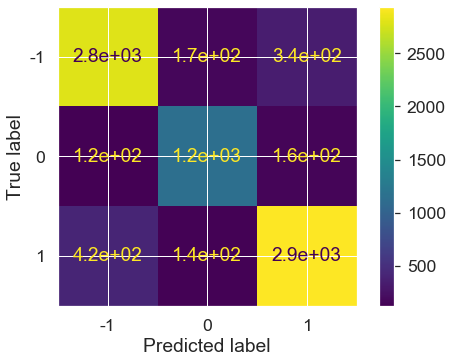

In [223]:
y_pred_logreg_hyper = rand_search_logreg_hyper.predict(text_test)
print(classification_report(y_test, y_pred_logreg_hyper))
plot_confusion_matrix(rand_search_logreg_hyper, text_test, y_test);

20210407 --> training started at 23.35, completed at

In [224]:
# save
joblib.dump(rand_search_logreg_hyper, 'Model/logit_hyper_rand.joblib')

['Model/logit_hyper_rand.joblib']

In [225]:
joblib.dump(rand_search_logreg_hyper, 'Model/logit_hyper_rand_1')

['Model/logit_hyper_rand_1']

In [ ]:
estimated_completion = (len(df_final) / 200) * 30
estimated_completion_minutes = str(estimated_completion) + " minutes"
estimated_completion_minutes

In [ ]:
estimated_completion_hour = (estimated_completion) / 60
estimated_completion_hour = str(estimated_completion_hour) + " hours"
estimated_completion_hour

In [ ]:
68.6375/24

# Tweet Search by Keyword

In [ ]:
# !pip install tweepy
# !pip install dateparser

In [ ]:
import pandas as pd
import tweepy
import time
pd.set_option('display.max_colwidth', 1000)
import dateparser
from datetime import datetime 

# api key
api_key = "VF9Xv4WxUBUBMrH2yntvW2DD0"
# api secret key
api_secret_key = "mzZU8SQUXHwYThBO0mtk3hkQG9JYhZ6byJoIjlwcBTagSG4Nkn"
# access token
access_token = "473787030-HUT2iebZltM6XjswhV7fnGpQerksZ5a7qaoyEJjp"
# access token secret
access_token_secret = "LkvliySmLd57Wt8LVVpy1nJ5jlRwaQo1wzfyh0epYzJ8d"

authentication = tweepy.OAuthHandler(api_key, api_secret_key)
authentication.set_access_token(access_token, access_token_secret)
# api = tweepy.API(authentication, wait_on_rate_limit=True)

In [ ]:
thailand = "18.78457,98.99983,100mi"

def get_profile_banner_url(i):
    if 'profile_banner_url' in i.user._json:
        return i.user.profile_banner_url
    else:
        return 'None' 
    
def get_news_url_2(i):
    if i.entities['urls'] == []:
        return 'None'
    else:
        return i.entities['urls'][0]['url']

def get_tweets(keyword='indonesia', location="-0.789275,113.921326,5000km", language='id'):
    # list to store tweets
    tweets_list = []
    # no of tweets
    count = 100
    # location
    location=location
    # lang
    language=language
    try:
        # Pulling individual tweets from query
        for tweet in api.search(q=keyword, geocode=location, count=count, lang=language):
            # print(tweet.text)
            # Adding to list that contains all tweets
            tweets_list.append({'tweet_id': tweet.id,
                                'user_name': tweet.user.name,
                                'screen_name': tweet.user.screen_name,
                                'profile_url': f"https://twitter.com/{tweet.user.screen_name}",
                                'created_at': tweet.created_at,
                                'tweet_text': tweet.text,
                                'location': tweet.user.location,
                                'followers': tweet.user.followers_count,
                                'following': tweet.user.friends_count,
                                'listed_count': tweet.user.listed_count,
                                'profile_image': tweet.user.profile_image_url,
                                'profile_banner_image': get_profile_banner_url(tweet),
                                'news_url_1': tweet.user.url,
                                'news_url_2': get_news_url_2(tweet)})
        # return tweets_list
        return pd.DataFrame.from_dict(tweets_list)

    except BaseException as e:
        print('failed on_status,', str(e))
        time.sleep(3)
        
        
# def get_tweets(text_query):
#     # list to store tweets
#     tweets_list = []
#     # no of tweets
#     count = 50
#     try:
#         # Pulling individual tweets from query
#         for tweet in api.search(q=text_query, count=count):
#             # print(tweet.text)
#             # Adding to list that contains all tweets
#             tweets_list.append({'tweet_id': tweet.id,
#                                 'created_at': tweet.created_at,
#                                 'tweet_text': tweet.text,
#                                 'location': tweet.user.location})
#         # return tweets_list
#         return pd.DataFrame.from_dict(tweets_list)

#     except BaseException as e:
#         print('failed on_status,', str(e))
#         time.sleep(3)

In [ ]:
output = get_tweets('sadfasf')

def text_counter(text):
    if text != "":
        return 1
    else:
        return 0
    
# output['text_counter'] = output.tweet_text.apply(lambda x: text_counter(x))
output['date'] = output.created_at.apply(lambda x: x.date())
output['day'] = output.created_at.apply(lambda x: x.day_name())
output['month'] = output.created_at.apply(lambda x: x.month_name())
output['year'] = output.created_at.apply(lambda x: x.year)
output['time1'] = output.created_at.apply(lambda x: x.to_period('H').strftime('%d-%b-%y'))
output['time2'] = output.created_at.apply(lambda x: x.to_period('H').strftime('%d-%b-%y %H:%M'))
# output['created_at_hour1'] = output.created_at.apply(lambda x: x.to_period('H').strftime('%c'))


output.head(5)

In [ ]:
# output.info()

In [ ]:
# output.time1

In [ ]:
# converting to detailed time
# x = output.created_at[0]
# y = x.to_period('H')
# z = x.to_period('H').strftime('%H:%M:%S')
# y, z

# creation_date = output.created_at.dt

# # convert to other types
# creation_date.day_name()
# creation_date.day_name()
# creation_date.time

# # convert to date
# creation_date.to_period('D')

# # convert to hour with date
# creation_date.to_period('H')

In [ ]:
len(temp_time1.time1)

In [ ]:
temp_time1 = output[['time1', 'tweet_text']].groupby(['time1'], as_index=False).count()
display(temp_time1)

temp_time2 = output[['time2', 'tweet_text']].groupby(['time2'], as_index=False).count()
display(temp_time2)

if len(temp_time1.time1) > 1:
    time = temp_time1
else:
    time = temp_time2
    
time

In [ ]:
x = list(temp_time1.time1)
x, type(x)


In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(20,8))
ax = plt.axes()

plt.subplot(121)
ax = sns.lineplot(data=temp_time1, x='time1', y='tweet_text')
plt.title('time1')

plt.subplot(122)
ax = sns.lineplot(data=temp_time2, x='time2', y='tweet_text')
plt.title('time2')

plt.show()

In [ ]:
# note
# # query
text_query = 'allianz'

# # geocode
# jakarta = " -6.20906,106.83539,6mi" 
# yogyakarta = "-7.795580,110.369492,6mi"
# indonesia = "0.7893,113.9213,100mi"
# thailand = "18.78457,98.99983,100mi"

# # list to store tweets
# tweets_list = []

# no of tweets
# count = 50

# try:
#     result = api.search(q=text_query, count=count)


# except BaseException as e:
#     print('failed on_status,', str(e))
#     time.sleep(3)
    
# result

# for i in result:
#     if 'profile_banner_url' in i.user._json:
#         print(i.user.name, '==', i.user.screen_name, '==',i.user.profile_image_url, '==',i.user.profile_banner_url, '==', i.entities['urls'], '\n')
#     else:
#         print('None\n')

# [i for i in result if 'profile_banner_url' in i.user._json]
# 'profile_banner_url' in result[5].user._json
# [i for i in result[5].user.profile_banner_url if 'profile_banner_url' in result[1].user._json]

# Special Function
def get_profile_banner_url(i):
    if 'profile_banner_url' in i.user._json:
        return i.user.profile_banner_url
    else:
        return 'None'   

# Special Function
def get_profile_url(i):
    if 'profile_banner_url' in i.user._json:
        return i.user.profile_banner_url
    else:
        return 'None'


In [ ]:
get_profile_banner_url(result[7])

In [ ]:
# len(result)
# type(result[0].user.profile_banner_url)
# for i,j in enumerate(result):
#     print(i, j.user, '\n')
#     if j.user.profile_banner_url in j.user:
#         print(i, j.user.profile_banner_url, '\n')
#     else:
#         pass

# result[10].user.profile_banner_url

In [ ]:
# Special Function
def get_profile_url(i):
    if i.entities['urls'] == []:
        return 'None'
    else:
        return i.entities['urls'][0]['url']

In [ ]:
result[1].entities['urls'][0]['url']

In [ ]:
get_profile_url(result[2])

In [ ]:
Date	Headline	URL	Opening Text	Hit Sentence	Source	Influencer	Country	Subregion	Language	Reach	Desktop Reach	Mobile Reach	Twitter Social Echo	Facebook Social Echo	Reddit Social Echo	National Viewership	Engagement	AVE	Sentiment	Key Phrases	Input Name	Keywords	Twitter Authority	Tweet Id	Twitter Id	Twitter Client	Twitter Screen Name	User Profile Url	Twitter Bio	Twitter Followers	Twitter Following	Alternate Date Format	Time	State	City	Document Tags


In [ ]:
# count_words = df.text.apply(lambda x: len(x.split(' '))).sum()
# count_mentions = df.text.apply(lambda x: x.count('@')).sum()
# count_hashtags = df.text.apply(lambda x: x.count('#')).sum()
# count_urls = df.text.apply(lambda x: x.count('http') + x.count('bit.ly')).sum()
# count_excl_quest = df.text.apply(lambda x: x.count('!') + x.count('?')).sum()
# count_emojis = df.text.apply(lambda x: len(emojis(x))).sum()

In [ ]:
# print(f"""total words: {count_words}
#       mentions: {count_mentions}
#       hashtags: {count_hashtags}
#       urls: {count_urls}
#       exlamation & question marks: {count_excl_quest}
#       emojis""")

In [ ]:
# all_text = '||'.join(df.text)
# chars = list(all_text)

In [ ]:
# emojis = []
# for n, i in enumerate(chars):
#   if i in emoji.UNICODE_EMOJI:
#     emojis.append([n,i])

# emojis

In [ ]:
# def emojis(text):
#   emoji_list = []
#   for i in text:
#     if i in emoji.UNICODE_EMOJI:
#       emojis.append(i)
#   return emoji_list

# x = count_emojis(df.text[670400])
# len(x)

In [ ]:
# df.text[670400]

- https://www.kaggle.com/damianusdeni/shopee-product-review-sentiment-analysis/edit/run/39225023
- https://colab.research.google.com/drive/1BPfcNsnKytJ9nzeNGDLOkN49qTWnjeg-#scrollTo=T3Lg1lS0URfy
- https://colab.research.google.com/drive/12bOKpAIHEOi1X7kIgApJZkPEMRw48U_e#scrollTo=7B95PTd9UqJI
- https://www.analyticsvidhya.com/blog/2020/11/create-a-pipeline-to-perform-sentiment-analysis-using-nlp/
- https://github.com/devildances/TwitterSentimentAnalysis_Final_Project/blob/master/ETL_DC_EDA.ipynb